In [16]:
import sys
sys.path.insert(0, r"C:\Users\pedro\edge-rppg-health")  # ensure project root is first on sys.path
import importlib
importlib.invalidate_caches()  
import pandas as pd

In [17]:
from IppgSignalObtainer import IppgSignalObtainer
import matplotlib.pyplot as plt
#from Tools.ParametersCalculator import ParametersCalculator

In [4]:
path = "videos_iPPG_paula/2024-11-28 at 10.06.20.mp4"   
rois = IppgSignalObtainer.extractSeriesRoiRGBFromVideo(path, 30, 30, 0, True, True, False, False)

forehead ========================================================================
left_cheek ========================================================================
right_cheek ========================================================================


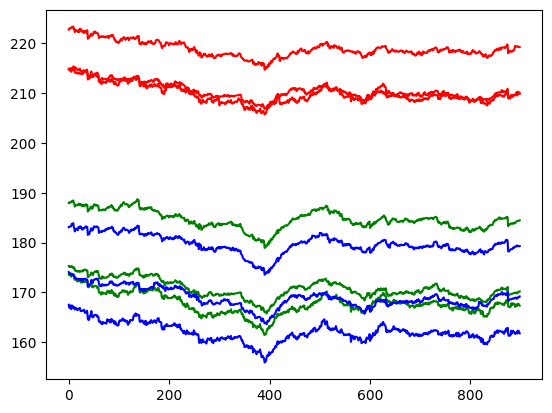

In [16]:
for roi in rois:
    print(f"{roi} ========================================================================")
    for channel in rois[roi]:
        plt.plot(rois[roi][channel], color = channel)
    #plt.show()

In [ ]:
pd.read_csv("results_roi_hr.csv", header=None)

0            1          2      3  \
0                         file     best_roi         hr  gt_hr   
1          20241203_152904.mp4  right_cheek    98.4375   95.0   
2          20241203_111907.mp4   left_cheek   91.40625   52.0   
3   2024-11-28 at 10.06.20.mp4     forehead     84.375   85.0   
4   2024-11-28 at 10.10.37.mp4   left_cheek   77.34375   95.0   
5   2024-11-28 at 10.16.37.mp4  right_cheek  119.53125   68.0   
6   2024-11-28 at 10.32.50.mp4  right_cheek    70.3125   75.0   
7   2024-11-28 at 10.34.52.mp4   left_cheek    70.3125   69.0   
8   2024-11-28 at 11.54.15.mp4   left_cheek    70.3125   90.0   
9   2024-11-28 at 16.13.38.mp4   left_cheek   91.40625   68.0   
10  2024-11-28 at 16.19.35.mp4  right_cheek     84.375   56.0   
11  2024-11-28 at 16.20.48.mp4  right_cheek    70.3125   60.0   
12  2024-11-28 at 16.26.58.mp4   left_cheek    70.3125   65.0   
13  2024-12-03 at 13.08.04.mp4  right_cheek    70.3125   61.0   
14  2024-12-03 at 14.23.29.mp4  right_cheek    70.3125   67.0   
15  2024-12-03 at 15.32.07.mp4   left_cheek    70.3125   96.0   
16                IMG_9575.mp4   left_cheek     84.375   66.0   
17                IMG_6020.mp4   left_cheek   63.28125   71.0   
18                   Video.mov   left_cheek      56.25   60.0   
19         20241206_104904.mp4  right_cheek  119.53125   62.0   

                         4                         5  \
0   error_for_roi_forehead  error_for_roi_left_cheek   
1                  24.6875                   3.59375   
2                 25.34375                  39.40625   
3                    0.625                     0.625   
4                   3.4375                  17.65625   
5                   2.3125                   30.4375   
6                   4.6875                    4.6875   
7                   1.3125                    1.3125   
8                  19.6875                   19.6875   
9                  4.71875                  23.40625   
10                35.40625                  21.34375   
11                 38.4375                    24.375   
12                12.34375                    5.3125   
13                  9.3125                    9.3125   
14                10.34375                     10.75   
15                  11.625                   25.6875   
16                 2.71875                    18.375   
17                  0.6875                   7.71875   
18                 3.28125                      3.75   
19                57.53125                  57.53125   

                            6  
0   error_for_roi_right_cheek  
1                      3.4375  
2                     2.78125  
3                     14.6875  
4                      10.625  
5                    51.53125  
6                      4.6875  
7                     8.34375  
8                     1.40625  
9                      2.3125  
10                     28.375  
11                    10.3125  
12                     5.3125  
13                     9.3125  
14                     3.3125  
15                    4.59375  
16                    2.71875  
17                     0.6875  
18                   17.34375  
19                   57.53125

## Analisis de los graficos de los periodogramas: 

En los videos del motorola G72, NO se ve el pico cercano a 1Hz que se ve por ej en el S24

## Analisis seleccion automatica de ROI

En muchos casos puede verse que se consiguieron bajos errores para alguna de las ROIs en especifico, mostrando la importancia de la seleccion dinamica de las mismas. Sin embargo, en la mayor parte de los casos el metodo de seleccion basado unicamente en la energia no dio resultados satisfactorios, dligiendo ROIs con errores muy altos por sobre ROIs con errores bajos.

En base a esto se procedera a hacer dos cosas:
1- Probar distintos metodos y ver la diferencia
2- Probar distintos criterios para la seleccion de ROIs, como por ejemplo el SNR, indices de calidad, o la combinacion de este con el.
3- Testear en videos obtenidos con webcam (sin post procesamiento) y ver si el problema radica en el postprocesamientod e los celulares


## Probamos distintos metodos y rois para señales obtenidas con smarphone (dataset paula) y con webcam (UBFC y dataset google drive)

### Dataset Paula

In [ ]:
# Load results_all_methods_paula.csv and separate by method
df_all_methods = pd.read_csv("results_all_methods_paula.csv")

# Function to find the ROI with minimum error
def find_min_error_roi(row):
    error_cols = {
        'forehead': row['error_for_roi_forehead'],
        'left_cheek': row['error_for_roi_left_cheek'],
        'right_cheek': row['error_for_roi_right_cheek']
    }
    min_roi = min(error_cols, key=error_cols.get)
    return min_roi

# Add column to check if best_roi matches the ROI with lowest error
df_all_methods['min_error_roi'] = df_all_methods.apply(find_min_error_roi, axis=1)
df_all_methods['best_roi_is_correct'] = df_all_methods['best_roi'] == df_all_methods['min_error_roi']
df_all_methods['✓'] = df_all_methods['best_roi_is_correct'].map({True: '✓', False: ''})

# Separate dataframe by method
methods = df_all_methods['method'].unique()
dfs_by_method = {}

for method in methods:
    dfs_by_method[method] = df_all_methods[df_all_methods['method'] == method].copy()
    print(f"\n=== {method.upper()} Method ({len(dfs_by_method[method])} rows) ===")
    display(dfs_by_method[method])
    
# The separate dataframes are stored in dfs_by_method dictionary
# Access them like: dfs_by_method['pos'], dfs_by_method['chrom'], etc.


=== POS Method (19 rows) ===


method                        file     best_roi         hr  gt_hr  \
0     pos         20241203_152904.mp4  right_cheek   98.43750   95.0   
4     pos         20241203_111907.mp4  right_cheek   91.40625   52.0   
8     pos  2024-11-28 at 10.06.20.mp4     forehead   84.37500   85.0   
12    pos  2024-11-28 at 10.10.37.mp4   left_cheek   84.37500   95.0   
16    pos  2024-11-28 at 10.16.37.mp4  right_cheek   77.34375   68.0   
20    pos  2024-11-28 at 10.32.50.mp4   left_cheek   70.31250   75.0   
24    pos  2024-11-28 at 10.34.52.mp4   left_cheek   70.31250   69.0   
28    pos  2024-11-28 at 11.54.15.mp4   left_cheek   70.31250   90.0   
32    pos  2024-11-28 at 16.13.38.mp4   left_cheek   91.40625   68.0   
36    pos  2024-11-28 at 16.19.35.mp4   left_cheek   84.37500   56.0   
40    pos  2024-11-28 at 16.20.48.mp4  right_cheek   84.37500   60.0   
44    pos  2024-11-28 at 16.26.58.mp4   left_cheek   77.34375   65.0   
48    pos  2024-12-03 at 13.08.04.mp4  right_cheek   84.37500   61.0   
52    pos  2024-12-03 at 14.23.29.mp4  right_cheek   77.34375   67.0   
56    pos  2024-12-03 at 15.32.07.mp4   left_cheek   70.31250   96.0   
60    pos                IMG_9575.mp4  right_cheek   63.28125   66.0   
64    pos                IMG_6020.mp4   left_cheek   70.31250   71.0   
68    pos                   Video.mov   left_cheek   84.37500   60.0   
72    pos         20241206_104904.mp4  right_cheek  119.53125   62.0   

    error_for_roi_forehead  error_for_roi_left_cheek  \
0                  3.43750                  24.68750   
4                 25.34375                  39.40625   
8                  0.62500                   0.62500   
12                 3.43750                  10.62500   
16                 2.31250                   2.31250   
20                 2.34375                   4.68750   
24                 1.31250                   1.31250   
28                 1.40625                  19.68750   
32                 2.31250                  23.40625   
36                28.37500                  28.37500   
40                 3.75000                  10.31250   
44                12.34375                  12.34375   
48                 9.31250                   9.31250   
52                10.34375                  17.37500   
56                11.62500                  25.68750   
60                 2.71875                  18.37500   
64                 0.68750                   0.68750   
68                 3.28125                  24.37500   
72                57.53125                  57.53125   

    error_for_roi_right_cheek min_error_roi  best_roi_is_correct  ✓  
0                     3.43750      forehead                False     
4                    39.40625      forehead                False     
8                    14.68750      forehead                 True  ✓  
12                    3.43750      forehead                False     
16                    9.34375      forehead                False     
20                    4.68750      forehead                False     
24                    1.31250      forehead                False     
28                    1.40625      forehead                False     
32                    2.31250      forehead                False     
36                   14.31250   right_cheek                False     
40                   24.37500      forehead                False     
44                   12.34375      forehead                False     
48                   23.37500      forehead                False     
52                   10.34375      forehead                False     
56                    4.59375   right_cheek                False     
60                    2.71875      forehead                False     
64                    0.68750      forehead                False     
68                   10.31250      forehead                False     
72                   57.53125      forehead                False


=== CHROM Method (19 rows) ===


method                        file     best_roi        hr  gt_hr  \
1   chrom         20241203_152904.mp4  right_cheek  63.28125   95.0   
5   chrom         20241203_111907.mp4   left_cheek  49.21875   52.0   
9   chrom  2024-11-28 at 10.06.20.mp4   left_cheek  56.25000   85.0   
13  chrom  2024-11-28 at 10.10.37.mp4   left_cheek  84.37500   95.0   
17  chrom  2024-11-28 at 10.16.37.mp4  right_cheek  77.34375   68.0   
21  chrom  2024-11-28 at 10.32.50.mp4  right_cheek  70.31250   75.0   
25  chrom  2024-11-28 at 10.34.52.mp4   left_cheek  70.31250   69.0   
29  chrom  2024-11-28 at 11.54.15.mp4  right_cheek  42.18750   90.0   
33  chrom  2024-11-28 at 16.13.38.mp4   left_cheek  63.28125   68.0   
37  chrom  2024-11-28 at 16.19.35.mp4  right_cheek  70.31250   56.0   
41  chrom  2024-11-28 at 16.20.48.mp4  right_cheek  49.21875   60.0   
45  chrom  2024-11-28 at 16.26.58.mp4   left_cheek  42.18750   65.0   
49  chrom  2024-12-03 at 13.08.04.mp4  right_cheek  42.18750   61.0   
53  chrom  2024-12-03 at 14.23.29.mp4  right_cheek  77.34375   67.0   
57  chrom  2024-12-03 at 15.32.07.mp4   left_cheek  42.18750   96.0   
61  chrom                IMG_9575.mp4  right_cheek  63.28125   66.0   
65  chrom                IMG_6020.mp4   left_cheek  63.28125   71.0   
69  chrom                   Video.mov   left_cheek  56.25000   60.0   
73  chrom         20241206_104904.mp4  right_cheek  56.25000   62.0   

    error_for_roi_forehead  error_for_roi_left_cheek  \
1                 52.81250                  52.81250   
5                  9.81250                   2.78125   
9                  0.62500                  28.75000   
13                45.78125                  10.62500   
17                 4.71875                   9.34375   
21                 2.34375                   2.34375   
25                 1.31250                   1.31250   
29                26.71875                  19.68750   
33                 2.31250                   4.71875   
37                28.37500                  21.34375   
41                 3.75000                   3.75000   
45                12.34375                  22.81250   
49                18.81250                  18.81250   
53                17.78125                  10.75000   
57                32.71875                  53.81250   
61                 2.71875                   2.71875   
65                 7.71875                   7.71875   
69                 3.75000                   3.75000   
73                 5.75000                   5.75000   

    error_for_roi_right_cheek min_error_roi  best_roi_is_correct  ✓  
1                    31.71875   right_cheek                 True  ✓  
5                     2.78125    left_cheek                 True  ✓  
9                    42.81250      forehead                False     
13                    3.43750   right_cheek                False     
17                    9.34375      forehead                False     
21                    4.68750      forehead                False     
25                   12.75000      forehead                False     
29                   47.81250    left_cheek                False     
33                    2.31250      forehead                False     
37                   14.31250   right_cheek                 True  ✓  
41                   10.78125      forehead                False     
45                   12.34375      forehead                False     
49                   18.81250      forehead                False     
53                   10.34375   right_cheek                 True  ✓  
57                   32.71875      forehead                False     
61                    2.71875      forehead                False     
65                    0.68750   right_cheek                False     
69                   10.31250      forehead                False     
73                    5.75000      forehead                False


=== ICA Method (19 rows) ===


method                        file     best_roi        hr  gt_hr  \
2     ica         20241203_152904.mp4     forehead  77.34375   95.0   
6     ica         20241203_111907.mp4     forehead  42.18750   52.0   
10    ica  2024-11-28 at 10.06.20.mp4   left_cheek  77.34375   85.0   
14    ica  2024-11-28 at 10.10.37.mp4     forehead  63.28125   95.0   
18    ica  2024-11-28 at 10.16.37.mp4     forehead  70.31250   68.0   
22    ica  2024-11-28 at 10.32.50.mp4   left_cheek  70.31250   75.0   
26    ica  2024-11-28 at 10.34.52.mp4  right_cheek  77.34375   69.0   
30    ica  2024-11-28 at 11.54.15.mp4     forehead  56.25000   90.0   
34    ica  2024-11-28 at 16.13.38.mp4   left_cheek  49.21875   68.0   
38    ica  2024-11-28 at 16.19.35.mp4     forehead  56.25000   56.0   
42    ica  2024-11-28 at 16.20.48.mp4   left_cheek  84.37500   60.0   
46    ica  2024-11-28 at 16.26.58.mp4   left_cheek  70.31250   65.0   
50    ica  2024-12-03 at 13.08.04.mp4  right_cheek  77.34375   61.0   
54    ica  2024-12-03 at 14.23.29.mp4     forehead  49.21875   67.0   
58    ica  2024-12-03 at 15.32.07.mp4  right_cheek  84.37500   96.0   
62    ica                IMG_9575.mp4   left_cheek  70.31250   66.0   
66    ica                IMG_6020.mp4   left_cheek  63.28125   71.0   
70    ica                   Video.mov  right_cheek  63.28125   60.0   
74    ica         20241206_104904.mp4  right_cheek  56.25000   62.0   

    error_for_roi_forehead  error_for_roi_left_cheek  \
2                 17.65625                  24.68750   
6                  9.81250                  11.28125   
10                 7.65625                   7.65625   
14                31.71875                  52.81250   
18                 2.31250                   9.34375   
22                32.81250                   4.68750   
26                 8.34375                   5.71875   
30                33.75000                  33.75000   
34                18.78125                  18.78125   
38                 0.25000                   7.28125   
42                24.37500                  24.37500   
46                12.34375                   5.31250   
50                 4.75000                   4.75000   
54                17.78125                  10.75000   
58                25.68750                  25.68750   
62                 2.71875                   4.31250   
66                 0.68750                   7.71875   
70                 3.28125                   3.75000   
74                 1.28125                   5.75000   

    error_for_roi_right_cheek min_error_roi  best_roi_is_correct  ✓  
2                    17.65625      forehead                 True  ✓  
6                     2.78125   right_cheek                False     
10                    7.65625      forehead                False     
14                   31.71875      forehead                 True  ✓  
18                    2.31250      forehead                 True  ✓  
22                    2.34375   right_cheek                False     
26                    8.34375    left_cheek                False     
30                   40.78125      forehead                 True  ✓  
34                   25.81250      forehead                False     
38                   21.34375      forehead                 True  ✓  
42                   17.81250   right_cheek                False     
46                   12.34375    left_cheek                 True  ✓  
50                   16.34375      forehead                False     
54                    3.71875   right_cheek                False     
58                   11.62500   right_cheek                 True  ✓  
62                    2.71875      forehead                False     
66                    0.68750      forehead                False     
70                    3.28125      forehead                False     
74                    5.75000      forehead                False


=== GREEN Method (19 rows) ===


method                        file     best_roi         hr  gt_hr  \
3   green         20241203_152904.mp4     forehead   77.34375   95.0   
7   green         20241203_111907.mp4   left_cheek   70.31250   52.0   
11  green  2024-11-28 at 10.06.20.mp4   left_cheek   84.37500   85.0   
15  green  2024-11-28 at 10.10.37.mp4   left_cheek  105.46875   95.0   
19  green  2024-11-28 at 10.16.37.mp4   left_cheek   70.31250   68.0   
23  green  2024-11-28 at 10.32.50.mp4   left_cheek   77.34375   75.0   
27  green  2024-11-28 at 10.34.52.mp4     forehead   70.31250   69.0   
31  green  2024-11-28 at 11.54.15.mp4     forehead  119.53125   90.0   
35  green  2024-11-28 at 16.13.38.mp4  right_cheek  133.59375   68.0   
39  green  2024-11-28 at 16.19.35.mp4     forehead   84.37500   56.0   
43  green  2024-11-28 at 16.20.48.mp4  right_cheek   77.34375   60.0   
47  green  2024-11-28 at 16.26.58.mp4     forehead   70.31250   65.0   
51  green  2024-12-03 at 13.08.04.mp4  right_cheek   70.31250   61.0   
55  green  2024-12-03 at 14.23.29.mp4   left_cheek   91.40625   67.0   
59  green  2024-12-03 at 15.32.07.mp4  right_cheek   84.37500   96.0   
63  green                IMG_9575.mp4  right_cheek  119.53125   66.0   
67  green                IMG_6020.mp4   left_cheek   70.31250   71.0   
71  green                   Video.mov   left_cheek   56.25000   60.0   
75  green         20241206_104904.mp4  right_cheek   56.25000   62.0   

    error_for_roi_forehead  error_for_roi_left_cheek  \
3                 17.65625                   3.59375   
7                 18.31250                  18.31250   
11                 0.62500                   0.62500   
15                 3.43750                  10.46875   
19                 2.31250                   2.31250   
23                 4.68750                   2.34375   
27                 1.31250                   1.31250   
31                29.53125                  15.46875   
35                 2.31250                  51.53125   
39                28.37500                  35.40625   
43                 3.28125                  38.43750   
47                 5.31250                   8.75000   
51                 9.31250                   9.31250   
55                45.50000                  24.40625   
59                 4.59375                  51.65625   
63                 2.71875                   2.71875   
67                 0.68750                   0.68750   
71                 3.28125                   3.75000   
75                 8.31250                   5.75000   

    error_for_roi_right_cheek min_error_roi  best_roi_is_correct  ✓  
3                     3.43750   right_cheek                False     
7                    11.28125   right_cheek                False     
11                    0.62500      forehead                False     
15                    3.59375      forehead                False     
19                    2.31250      forehead                False     
23                    2.34375    left_cheek                 True  ✓  
27                   15.37500      forehead                 True  ✓  
31                    5.62500   right_cheek                False     
35                   65.59375      forehead                False     
39                   28.37500      forehead                 True  ✓  
43                   17.34375      forehead                False     
47                   12.34375      forehead                 True  ✓  
51                    9.31250      forehead                False     
55                   10.34375   right_cheek                False     
59                   11.62500      forehead                False     
63                   53.53125      forehead                False     
67                    0.68750      forehead                False     
71                   59.53125      forehead                False     
75                    5.75000    left_cheek                False

### Dataset google drive

In [6]:
# Load results_processed_data_analysis.csv and separate by method
df_processed = pd.read_csv("results_processed_data_analysis.csv")

# Function to find the ROI with minimum error
def find_min_error_roi(row):
    error_cols = {
        'forehead': row['error_for_roi_forehead'],
        'left_cheek': row['error_for_roi_left_cheek'],
        'right_cheek': row['error_for_roi_right_cheek']
    }
    min_roi = min(error_cols, key=error_cols.get)
    return min_roi

# Add column to check if best_roi matches the ROI with lowest error
df_processed['min_error_roi'] = df_processed.apply(find_min_error_roi, axis=1)
df_processed['best_roi_is_correct'] = df_processed['best_roi'] == df_processed['min_error_roi']
df_processed['✓'] = df_processed['best_roi_is_correct'].map({True: '✓', False: ''})

# Separate dataframe by method
methods = df_processed['method'].unique()
dfs_by_method = {}

for method in methods:
    dfs_by_method[method] = df_processed[df_processed['method'] == method].copy()
    print(f"\n=== {method.upper()} Method ({len(dfs_by_method[method])} rows) ===")
    display(dfs_by_method[method])
    
# The separate dataframes are stored in dfs_by_method dictionary
# Access them like: dfs_by_method['pos'], dfs_by_method['chrom'], etc.




=== POS Method (16 rows) ===


method   file     best_roi         hr       gt_hr  error_for_roi_forehead  \
0     pos   P1H1   left_cheek  126.56250  110.273847               16.288653   
4     pos  P1LC1  right_cheek  105.46875   66.545171               10.798579   
8     pos  P1LC2  right_cheek   63.28125   64.933048                1.651798   
12    pos  P1LC3   left_cheek   56.25000   63.978432                7.728432   
16    pos  P1LC4   left_cheek   63.28125   63.888044                0.606794   
20    pos  P1LC5   left_cheek   56.25000   62.059267                5.809267   
24    pos  P1LC6   left_cheek   63.28125   62.613119                6.363119   
28    pos  P1LC7  right_cheek   63.28125   58.036621                5.244629   
32    pos   P1M1  right_cheek   63.28125   65.572676                2.291426   
36    pos   P1M2   left_cheek   63.28125   63.692389               55.838861   
40    pos   P1M3  right_cheek   91.40625   63.297268                0.016018   
44    pos  P2LC1  right_cheek   84.37500  104.416552               13.010302   
48    pos  P2LC2   left_cheek  119.53125  101.725763               24.382013   
52    pos  P2LC3   left_cheek   91.40625   97.976898                0.460602   
56    pos  P2LC4   left_cheek   84.37500  102.533006                4.095506   
60    pos  P2LC5   left_cheek   84.37500  102.335389               17.960389   

    error_for_roi_left_cheek  error_for_roi_right_cheek min_error_roi  \
0                  16.288653                  16.288653      forehead   
4                   3.263921                  38.923579    left_cheek   
8                   1.651798                   1.651798      forehead   
12                  7.728432                   7.728432      forehead   
16                  0.606794                   0.606794      forehead   
20                  5.809267                   5.809267      forehead   
24                  0.668131                   6.363119    left_cheek   
28                  5.244629                   5.244629      forehead   
32                  9.322676                   2.291426      forehead   
36                  0.411139                   0.411139    left_cheek   
40                 28.108982                  28.108982      forehead   
44                 27.072802                  20.041552      forehead   
48                 17.805487                  24.382013    left_cheek   
52                  6.570648                  27.664398      forehead   
56                 18.158006                   4.095506      forehead   
60                 17.960389                  10.929139   right_cheek   

    best_roi_is_correct  ✓  
0                 False     
4                 False     
8                 False     
12                False     
16                False     
20                False     
24                 True  ✓  
28                False     
32                False     
36                 True  ✓  
40                False     
44                False     
48                 True  ✓  
52                False     
56                False     
60                False


=== CHROM Method (16 rows) ===


method   file     best_roi         hr       gt_hr  error_for_roi_forehead  \
1   chrom   P1H1   left_cheek  126.56250  110.273847               16.288653   
5   chrom  P1LC1  right_cheek   63.28125   66.545171                3.263921   
9   chrom  P1LC2  right_cheek   56.25000   64.933048               82.723202   
13  chrom  P1LC3   left_cheek   56.25000   63.978432                7.728432   
17  chrom  P1LC4  right_cheek   63.28125   63.888044                0.606794   
21  chrom  P1LC5   left_cheek   56.25000   62.059267                5.809267   
25  chrom  P1LC6   left_cheek   56.25000   62.613119                0.668131   
29  chrom  P1LC7  right_cheek  147.65625   58.036621               89.619629   
33  chrom   P1M1  right_cheek   63.28125   65.572676                2.291426   
37  chrom   P1M2   left_cheek   63.28125   63.692389               55.838861   
41  chrom   P1M3     forehead   91.40625   63.297268               28.108982   
45  chrom  P2LC1  right_cheek   49.21875  104.416552               22.145948   
49  chrom  P2LC2   left_cheek  126.56250  101.725763               24.382013   
53  chrom  P2LC3  right_cheek   70.31250   97.976898               27.664398   
57  chrom  P2LC4  right_cheek   91.40625  102.533006                4.095506   
61  chrom  P2LC5  right_cheek  126.56250  102.335389                3.897889   

    error_for_roi_left_cheek  error_for_roi_right_cheek min_error_roi  \
1                  16.288653                  16.288653      forehead   
5                  10.295171                   3.263921      forehead   
9                   8.683048                   8.683048    left_cheek   
13                  7.728432                   7.728432      forehead   
17                  0.606794                   0.606794      forehead   
21                  5.809267                   5.809267      forehead   
25                  6.363119                   6.363119      forehead   
29                  5.244629                  89.619629    left_cheek   
33                 23.385176                   2.291426      forehead   
37                  0.411139                   0.411139    left_cheek   
41                 28.108982                  28.108982      forehead   
45                 27.072802                  55.197802      forehead   
49                 24.836737                  31.413263      forehead   
53                 20.633148                  27.664398    left_cheek   
57                 18.158006                  11.126756      forehead   
61                 24.227111                  24.227111      forehead   

    best_roi_is_correct  ✓  
1                 False     
5                 False     
9                 False     
13                False     
17                False     
21                False     
25                False     
29                False     
33                False     
37                 True  ✓  
41                 True  ✓  
45                False     
49                False     
53                False     
57                False     
61                False


=== ICA Method (16 rows) ===


method   file     best_roi         hr       gt_hr  error_for_roi_forehead  \
2     ica   P1H1   left_cheek  126.56250  110.273847               16.288653   
6     ica  P1LC1     forehead   63.28125   66.545171                3.263921   
10    ica  P1LC2  right_cheek   63.28125   64.933048                1.651798   
14    ica  P1LC3   left_cheek   56.25000   63.978432                7.728432   
18    ica  P1LC4  right_cheek   63.28125   63.888044                0.606794   
22    ica  P1LC5  right_cheek   56.25000   62.059267                5.809267   
26    ica  P1LC6   left_cheek   56.25000   62.613119                0.668131   
30    ica  P1LC7   left_cheek   91.40625   58.036621                5.244629   
34    ica   P1M1     forehead   56.25000   65.572676                9.322676   
38    ica   P1M2     forehead   63.28125   63.692389                0.411139   
42    ica   P1M3   left_cheek   91.40625   63.297268               28.108982   
46    ica  P2LC1   left_cheek   77.34375  104.416552               27.072802   
50    ica  P2LC2     forehead   84.37500  101.725763               17.350763   
54    ica  P2LC3     forehead   70.31250   97.976898               27.664398   
58    ica  P2LC4  right_cheek   91.40625  102.533006               11.126756   
62    ica  P2LC5   left_cheek   91.40625  102.335389               17.195861   

    error_for_roi_left_cheek  error_for_roi_right_cheek min_error_roi  \
2                  16.288653                  16.288653      forehead   
6                  24.861079                   3.263921      forehead   
10                  1.651798                   1.651798      forehead   
14                  7.728432                  20.396568      forehead   
18                 55.643206                   0.606794      forehead   
22                  5.809267                   5.809267      forehead   
26                  6.363119                  14.730631      forehead   
30                 33.369629                   5.244629      forehead   
34                 23.385176                  23.385176      forehead   
38                  0.411139                   0.411139      forehead   
42                 28.108982                  28.108982      forehead   
46                 27.072802                  20.041552   right_cheek   
50                 31.413263                   3.288263   right_cheek   
54                 20.633148                  27.664398    left_cheek   
58                  4.095506                  11.126756    left_cheek   
62                 10.929139                  24.227111    left_cheek   

    best_roi_is_correct  ✓  
2                 False     
6                  True  ✓  
10                False     
14                False     
18                False     
22                False     
26                False     
30                False     
34                 True  ✓  
38                 True  ✓  
42                False     
46                False     
50                False     
54                False     
58                False     
62                 True  ✓


=== GREEN Method (16 rows) ===


method   file     best_roi         hr       gt_hr  error_for_roi_forehead  \
3   green   P1H1  right_cheek  126.56250  110.273847               16.288653   
7   green  P1LC1   left_cheek   63.28125   66.545171                3.263921   
11  green  P1LC2  right_cheek   63.28125   64.933048                1.651798   
15  green  P1LC3   left_cheek   56.25000   63.978432                7.728432   
19  green  P1LC4  right_cheek   63.28125   63.888044                0.606794   
23  green  P1LC5   left_cheek   56.25000   62.059267                5.809267   
27  green  P1LC6  right_cheek   56.25000   62.613119                6.363119   
31  green  P1LC7   left_cheek   63.28125   58.036621                5.244629   
35  green   P1M1   left_cheek   49.21875   65.572676                2.291426   
39  green   P1M2     forehead   63.28125   63.692389                0.411139   
43  green   P1M3  right_cheek   91.40625   63.297268               28.108982   
47  green  P2LC1  right_cheek  126.56250  104.416552               22.145948   
51  green  P2LC2   left_cheek   98.43750  101.725763                3.288263   
55  green  P2LC3  right_cheek   98.43750   97.976898                0.460602   
59  green  P2LC4     forehead   98.43750  102.533006                4.095506   
63  green  P2LC5  right_cheek   98.43750  102.335389                3.897889   

    error_for_roi_left_cheek  error_for_roi_right_cheek min_error_roi  \
3                  16.288653                  16.288653      forehead   
7                   3.263921                  60.017329      forehead   
11                  1.651798                   1.651798      forehead   
15                  7.728432                   7.728432      forehead   
19                  0.606794                   0.606794      forehead   
23                  5.809267                   5.809267      forehead   
27                  6.363119                   6.363119      forehead   
31                  5.244629                   5.244629      forehead   
35                 16.353926                  18.802324      forehead   
39                  0.411139                   0.411139      forehead   
43                 28.108982                  28.108982      forehead   
47                  1.052198                  22.145948    left_cheek   
51                  3.288263                   3.288263      forehead   
55                  0.460602                   0.460602      forehead   
59                  4.095506                   4.095506      forehead   
63                  3.897889                   3.897889      forehead   

    best_roi_is_correct  ✓  
3                 False     
7                 False     
11                False     
15                False     
19                False     
23                False     
27                False     
31                False     
35                False     
39                 True  ✓  
43                False     
47                False     
51                False     
55                False     
59                 True  ✓  
63                False

### Dataset UBFC

In [9]:
# Load results_ubfc_comparison.csv and separate by method
df_ubfc = pd.read_csv("results_ubfc_comparison.csv")

# Function to find the ROI with minimum error
def find_min_error_roi_ubfc(row):
    error_cols = {}
    # Get all error columns dynamically (they might be forehead, left_cheek, right_cheek, etc.)
    for col in row.index:
        if col.startswith('error_for_roi_'):
            roi_name = col.replace('error_for_roi_', '')
            if pd.notna(row[col]):
                error_cols[roi_name] = row[col]
    if len(error_cols) == 0:
        return None
    min_roi = min(error_cols, key=error_cols.get)
    return min_roi

# Add column to check if best_roi matches the ROI with lowest error
df_ubfc['min_error_roi'] = df_ubfc.apply(find_min_error_roi_ubfc, axis=1)
df_ubfc['best_roi_is_correct'] = df_ubfc['best_roi'] == df_ubfc['min_error_roi']
df_ubfc['✓'] = df_ubfc['best_roi_is_correct'].map({True: '✓', False: ''})

# Separate dataframe by method
methods = df_ubfc['method'].unique()
dfs_by_method_ubfc = {}

for method in methods:
    dfs_by_method_ubfc[method] = df_ubfc[df_ubfc['method'] == method].copy()
    print(f"\n=== {method.upper()} Method ({len(dfs_by_method_ubfc[method])} rows) ===")
    display(dfs_by_method_ubfc[method])
    
# The separate dataframes are stored in dfs_by_method_ubfc dictionary
# Access them like: dfs_by_method_ubfc['pos'], dfs_by_method_ubfc['chrom'], etc.




=== POS Method (50 rows) ===


method            file    dataset     best_roi         hr       gt_hr  \
0      pos           10-gt  DATASET_1  right_cheek   77.34375   72.408340   
4      pos           11-gt  DATASET_1   left_cheek   84.37500   77.704668   
8      pos           12-gt  DATASET_1  right_cheek   98.43750   94.571153   
12     pos            5-gt  DATASET_1  right_cheek   77.34375   77.317059   
16     pos            6-gt  DATASET_1     forehead   91.40625   82.573382   
20     pos            7-gt  DATASET_1  right_cheek   98.43750   94.683307   
24     pos            8-gt  DATASET_1  right_cheek   63.28125   68.125983   
28     pos  after-exercise  DATASET_1  right_cheek  112.50000  113.856654   
32     pos        subject1  DATASET_2   left_cheek  112.50000  106.704568   
36     pos       subject10  DATASET_2  right_cheek  119.53125  109.808874   
40     pos       subject11  DATASET_2     forehead  126.56250   96.210504   
44     pos       subject12  DATASET_2  right_cheek   70.31250   65.965962   
48     pos       subject13  DATASET_2  right_cheek  112.50000  107.101371   
52     pos       subject14  DATASET_2     forehead   70.31250   80.412426   
56     pos       subject15  DATASET_2  right_cheek  112.50000  115.786683   
60     pos       subject16  DATASET_2   left_cheek   91.40625   91.798463   
64     pos       subject17  DATASET_2   left_cheek   84.37500   85.403103   
68     pos       subject18  DATASET_2   left_cheek  126.56250  103.762247   
72     pos       subject20  DATASET_2  right_cheek  133.59375   60.225089   
76     pos       subject22  DATASET_2  right_cheek  105.46875  101.793056   
80     pos       subject23  DATASET_2   left_cheek   63.28125   63.288568   
84     pos       subject24  DATASET_2   left_cheek   98.43750   84.591673   
88     pos       subject25  DATASET_2   left_cheek  112.50000   91.532873   
92     pos       subject26  DATASET_2   left_cheek   98.43750   73.534714   
96     pos       subject27  DATASET_2   left_cheek  112.50000   89.366702   
100    pos        subject3  DATASET_2   left_cheek   91.40625  101.170444   
104    pos       subject30  DATASET_2   left_cheek   98.43750   92.711011   
108    pos       subject31  DATASET_2     forehead   77.34375   78.237516   
112    pos       subject32  DATASET_2     forehead   98.43750  107.328759   
116    pos       subject33  DATASET_2     forehead  119.53125  117.176138   
120    pos       subject34  DATASET_2  right_cheek  112.50000  116.546644   
124    pos       subject35  DATASET_2   left_cheek  112.50000  102.357953   
128    pos       subject36  DATASET_2  right_cheek  119.53125  119.024625   
132    pos       subject37  DATASET_2  right_cheek   56.25000   62.972104   
136    pos       subject38  DATASET_2   left_cheek  112.50000  109.996790   
140    pos       subject39  DATASET_2  right_cheek   84.37500   85.022525   
144    pos        subject4  DATASET_2   left_cheek  112.50000  112.273904   
148    pos       subject40  DATASET_2  right_cheek   84.37500   86.969575   
152    pos       subject41  DATASET_2  right_cheek  105.46875  100.779380   
156    pos       subject42  DATASET_2     forehead   98.43750   93.867985   
160    pos       subject43  DATASET_2   left_cheek   98.43750   97.041977   
164    pos       subject44  DATASET_2  right_cheek   77.34375   82.213155   
168    pos       subject45  DATASET_2   left_cheek  112.50000  110.820090   
172    pos       subject46  DATASET_2   left_cheek   91.40625   96.681960   
176    pos       subject47  DATASET_2  right_cheek  112.50000  111.377608   
180    pos       subject48  DATASET_2  right_cheek   91.40625   87.418550   
184    pos       subject49  DATASET_2  right_cheek   84.37500   87.568205   
188    pos        subject5  DATASET_2   left_cheek   98.43750   98.276914   
192    pos        subject8  DATASET_2     forehead  112.50000  111.243833   
196    pos        subject9  DATASET_2  right_cheek  105.46875  108.186409   

     error_for_roi_forehead  error_for_roi_left_cheek  \
0                  


=== CHROM Method (50 rows) ===


method            file    dataset     best_roi         hr       gt_hr  \
1    chrom           10-gt  DATASET_1  right_cheek   77.34375   72.408340   
5    chrom           11-gt  DATASET_1   left_cheek   84.37500   77.704668   
9    chrom           12-gt  DATASET_1  right_cheek   98.43750   94.571153   
13   chrom            5-gt  DATASET_1  right_cheek   77.34375   77.317059   
17   chrom            6-gt  DATASET_1     forehead   91.40625   82.573382   
21   chrom            7-gt  DATASET_1  right_cheek   98.43750   94.683307   
25   chrom            8-gt  DATASET_1  right_cheek   63.28125   68.125983   
29   chrom  after-exercise  DATASET_1  right_cheek  119.53125  113.856654   
33   chrom        subject1  DATASET_2   left_cheek  112.50000  106.704568   
37   chrom       subject10  DATASET_2   left_cheek  119.53125  109.808874   
41   chrom       subject11  DATASET_2     forehead  126.56250   96.210504   
45   chrom       subject12  DATASET_2     forehead   70.31250   65.965962   
49   chrom       subject13  DATASET_2  right_cheek  112.50000  107.101371   
53   chrom       subject14  DATASET_2     forehead   70.31250   80.412426   
57   chrom       subject15  DATASET_2  right_cheek  119.53125  115.786683   
61   chrom       subject16  DATASET_2   left_cheek   91.40625   91.798463   
65   chrom       subject17  DATASET_2   left_cheek   84.37500   85.403103   
69   chrom       subject18  DATASET_2   left_cheek  126.56250  103.762247   
73   chrom       subject20  DATASET_2   left_cheek  133.59375   60.225089   
77   chrom       subject22  DATASET_2   left_cheek  105.46875  101.793056   
81   chrom       subject23  DATASET_2   left_cheek   63.28125   63.288568   
85   chrom       subject24  DATASET_2  right_cheek   98.43750   84.591673   
89   chrom       subject25  DATASET_2   left_cheek  112.50000   91.532873   
93   chrom       subject26  DATASET_2   left_cheek   98.43750   73.534714   
97   chrom       subject27  DATASET_2   left_cheek  112.50000   89.366702   
101  chrom        subject3  DATASET_2   left_cheek   91.40625  101.170444   
105  chrom       subject30  DATASET_2   left_cheek   98.43750   92.711011   
109  chrom       subject31  DATASET_2     forehead   77.34375   78.237516   
113  chrom       subject32  DATASET_2  right_cheek  105.46875  107.328759   
117  chrom       subject33  DATASET_2     forehead  119.53125  117.176138   
121  chrom       subject34  DATASET_2  right_cheek  119.53125  116.546644   
125  chrom       subject35  DATASET_2   left_cheek  112.50000  102.357953   
129  chrom       subject36  DATASET_2  right_cheek  119.53125  119.024625   
133  chrom       subject37  DATASET_2  right_cheek   56.25000   62.972104   
137  chrom       subject38  DATASET_2   left_cheek  112.50000  109.996790   
141  chrom       subject39  DATASET_2  right_cheek   84.37500   85.022525   
145  chrom        subject4  DATASET_2  right_cheek  105.46875  112.273904   
149  chrom       subject40  DATASET_2  right_cheek   84.37500   86.969575   
153  chrom       subject41  DATASET_2  right_cheek   98.43750  100.779380   
157  chrom       subject42  DATASET_2     forehead   98.43750   93.867985   
161  chrom       subject43  DATASET_2   left_cheek   98.43750   97.041977   
165  chrom       subject44  DATASET_2  right_cheek   77.34375   82.213155   
169  chrom       subject45  DATASET_2   left_cheek  112.50000  110.820090   
173  chrom       subject46  DATASET_2  right_cheek   91.40625   96.681960   
177  chrom       subject47  DATASET_2  right_cheek  112.50000  111.377608   
181  chrom       subject48  DATASET_2  right_cheek   91.40625   87.418550   
185  chrom       subject49  DATASET_2  right_cheek   42.18750   87.568205   
189  chrom        subject5  DATASET_2   left_cheek   98.43750   98.276914   
193  chrom        subject8  DATASET_2     forehead  112.50000  111.243833   
197  chrom        subject9  DATASET_2  right_cheek  105.46875  108.186409   

     error_for_roi_forehead  error_for_roi_left_cheek  \
1                  


=== ICA Method (50 rows) ===


method            file    dataset     best_roi         hr       gt_hr  \
2      ica           10-gt  DATASET_1  right_cheek   77.34375   72.408340   
6      ica           11-gt  DATASET_1  right_cheek   84.37500   77.704668   
10     ica           12-gt  DATASET_1  right_cheek   98.43750   94.571153   
14     ica            5-gt  DATASET_1   left_cheek   77.34375   77.317059   
18     ica            6-gt  DATASET_1  right_cheek   84.37500   82.573382   
22     ica            7-gt  DATASET_1     forehead  105.46875   94.683307   
26     ica            8-gt  DATASET_1  right_cheek   63.28125   68.125983   
30     ica  after-exercise  DATASET_1  right_cheek   56.25000  113.856654   
34     ica        subject1  DATASET_2     forehead  112.50000  106.704568   
38     ica       subject10  DATASET_2     forehead   49.21875  109.808874   
42     ica       subject11  DATASET_2     forehead   42.18750   96.210504   
46     ica       subject12  DATASET_2  right_cheek   70.31250   65.965962   
50     ica       subject13  DATASET_2   left_cheek  105.46875  107.101371   
54     ica       subject14  DATASET_2  right_cheek   70.31250   80.412426   
58     ica       subject15  DATASET_2   left_cheek   91.40625  115.786683   
62     ica       subject16  DATASET_2  right_cheek   91.40625   91.798463   
66     ica       subject17  DATASET_2   left_cheek   77.34375   85.403103   
70     ica       subject18  DATASET_2   left_cheek  126.56250  103.762247   
74     ica       subject20  DATASET_2     forehead   42.18750   60.225089   
78     ica       subject22  DATASET_2     forehead   98.43750  101.793056   
82     ica       subject23  DATASET_2  right_cheek   70.31250   63.288568   
86     ica       subject24  DATASET_2   left_cheek   91.40625   84.591673   
90     ica       subject25  DATASET_2   left_cheek   56.25000   91.532873   
94     ica       subject26  DATASET_2     forehead   49.21875   73.534714   
98     ica       subject27  DATASET_2   left_cheek  600.00000   89.366702   
102    ica        subject3  DATASET_2     forehead   91.40625  101.170444   
106    ica       subject30  DATASET_2     forehead   91.40625   92.711011   
110    ica       subject31  DATASET_2   left_cheek   77.34375   78.237516   
114    ica       subject32  DATASET_2     forehead   49.21875  107.328759   
118    ica       subject33  DATASET_2   left_cheek  119.53125  117.176138   
122    ica       subject34  DATASET_2     forehead  112.50000  116.546644   
126    ica       subject35  DATASET_2     forehead   91.40625  102.357953   
130    ica       subject36  DATASET_2  right_cheek   70.31250  119.024625   
134    ica       subject37  DATASET_2   left_cheek   56.25000   62.972104   
138    ica       subject38  DATASET_2     forehead  105.46875  109.996790   
142    ica       subject39  DATASET_2   left_cheek   84.37500   85.022525   
146    ica        subject4  DATASET_2   left_cheek  105.46875  112.273904   
150    ica       subject40  DATASET_2  right_cheek   84.37500   86.969575   
154    ica       subject41  DATASET_2  right_cheek   63.28125  100.779380   
158    ica       subject42  DATASET_2  right_cheek   98.43750   93.867985   
162    ica       subject43  DATASET_2     forehead   84.37500   97.041977   
166    ica       subject44  DATASET_2   left_cheek   42.18750   82.213155   
170    ica       subject45  DATASET_2   left_cheek  112.50000  110.820090   
174    ica       subject46  DATASET_2  right_cheek   42.18750   96.681960   
178    ica       subject47  DATASET_2     forehead  112.50000  111.377608   
182    ica       subject48  DATASET_2  right_cheek   49.21875   87.418550   
186    ica       subject49  DATASET_2     forehead   49.21875   87.568205   
190    ica        subject5  DATASET_2     forehead   84.37500   98.276914   
194    ica        subject8  DATASET_2   left_cheek  112.50000  111.243833   
198    ica        subject9  DATASET_2   left_cheek  105.46875  108.186409   

     error_for_roi_forehead  error_for_roi_left_cheek  \
2                  


=== GREEN Method (50 rows) ===


method            file    dataset     best_roi         hr       gt_hr  \
3    green           10-gt  DATASET_1     forehead   77.34375   72.408340   
7    green           11-gt  DATASET_1     forehead   84.37500   77.704668   
11   green           12-gt  DATASET_1  right_cheek   98.43750   94.571153   
15   green            5-gt  DATASET_1   left_cheek   77.34375   77.317059   
19   green            6-gt  DATASET_1     forehead   91.40625   82.573382   
23   green            7-gt  DATASET_1     forehead  105.46875   94.683307   
27   green            8-gt  DATASET_1   left_cheek   63.28125   68.125983   
31   green  after-exercise  DATASET_1     forehead  112.50000  113.856654   
35   green        subject1  DATASET_2  right_cheek  112.50000  106.704568   
39   green       subject10  DATASET_2     forehead   91.40625  109.808874   
43   green       subject11  DATASET_2  right_cheek   84.37500   96.210504   
47   green       subject12  DATASET_2     forehead   70.31250   65.965962   
51   green       subject13  DATASET_2   left_cheek  105.46875  107.101371   
55   green       subject14  DATASET_2  right_cheek   70.31250   80.412426   
59   green       subject15  DATASET_2   left_cheek   91.40625  115.786683   
63   green       subject16  DATASET_2  right_cheek   91.40625   91.798463   
67   green       subject17  DATASET_2     forehead   84.37500   85.403103   
71   green       subject18  DATASET_2   left_cheek  126.56250  103.762247   
75   green       subject20  DATASET_2     forehead  133.59375   60.225089   
79   green       subject22  DATASET_2   left_cheek  105.46875  101.793056   
83   green       subject23  DATASET_2   left_cheek  119.53125   63.288568   
87   green       subject24  DATASET_2   left_cheek  112.50000   84.591673   
91   green       subject25  DATASET_2   left_cheek  112.50000   91.532873   
95   green       subject26  DATASET_2   left_cheek   98.43750   73.534714   
99   green       subject27  DATASET_2     forehead  112.50000   89.366702   
103  green        subject3  DATASET_2  right_cheek   91.40625  101.170444   
107  green       subject30  DATASET_2     forehead   91.40625   92.711011   
111  green       subject31  DATASET_2     forehead   77.34375   78.237516   
115  green       subject32  DATASET_2     forehead   98.43750  107.328759   
119  green       subject33  DATASET_2  right_cheek  119.53125  117.176138   
123  green       subject34  DATASET_2  right_cheek  112.50000  116.546644   
127  green       subject35  DATASET_2   left_cheek  112.50000  102.357953   
131  green       subject36  DATASET_2     forehead  119.53125  119.024625   
135  green       subject37  DATASET_2   left_cheek   56.25000   62.972104   
139  green       subject38  DATASET_2   left_cheek  112.50000  109.996790   
143  green       subject39  DATASET_2  right_cheek   84.37500   85.022525   
147  green        subject4  DATASET_2   left_cheek  105.46875  112.273904   
151  green       subject40  DATASET_2   left_cheek   84.37500   86.969575   
155  green       subject41  DATASET_2   left_cheek  105.46875  100.779380   
159  green       subject42  DATASET_2     forehead   98.43750   93.867985   
163  green       subject43  DATASET_2     forehead   84.37500   97.041977   
167  green       subject44  DATASET_2  right_cheek   77.34375   82.213155   
171  green       subject45  DATASET_2   left_cheek  112.50000  110.820090   
175  green       subject46  DATASET_2  right_cheek   91.40625   96.681960   
179  green       subject47  DATASET_2  right_cheek  112.50000  111.377608   
183  green       subject48  DATASET_2  right_cheek   56.25000   87.418550   
187  green       subject49  DATASET_2     forehead  112.50000   87.568205   
191  green        subject5  DATASET_2     forehead   84.37500   98.276914   
195  green        subject8  DATASET_2   left_cheek  112.50000  111.243833   
199  green        subject9  DATASET_2   left_cheek  105.46875  108.186409   

     error_for_roi_forehead  error_for_roi_left_cheek  \
3                  

## Miro el promedio de error tomando la mejor prediccion (asumiendo que la seleccion automatica funciono)

## funcion auxiliar de calculo

In [26]:
# Función para analizar el mejor caso: error mínimo por archivo para cada método
import numpy as np

def analyze_best_case_performance(csv_path, csv_name):
    """
    Analiza el mejor caso de rendimiento para un CSV.
    Muestra el error promedio si siempre seleccionáramos el ROI con error mínimo.
    
    Args:
        csv_path: Ruta al archivo CSV
        csv_name: Nombre del dataset para mostrar
    
    Returns:
        DataFrame con el resumen de resultados
    """
    # Cargar CSV
    df = pd.read_csv(csv_path)
    
    methods = ['pos', 'chrom', 'ica', 'green']
    results_summary = []
    
    print(f"\n{'='*70}")
    print(f"Dataset: {csv_name}")
    print(f"{'='*70}")
    
    # Calcular mejor caso para cada método
    for method in methods:
        # Obtener todas las filas de este método
        method_df = df[df['method'] == method].copy()
        
        if len(method_df) == 0:
            print(f"{method.upper():8s}: No data")
            continue
        
        # Obtener todas las columnas de error
        error_cols = [col for col in method_df.columns if col.startswith('error_for_roi_')]
        
        if len(error_cols) == 0:
            print(f"{method.upper():8s}: No error columns found")
            continue
        
        min_errors = []
        min_errors_files = []  # Para guardar los nombres de archivos correspondientes
        
        # Para cada archivo, encontrar el error mínimo entre todos los ROIs
        for file_name in method_df['file'].unique():
            file_df = method_df[method_df['file'] == file_name]
            if len(file_df) == 0:
                continue
            
            # Obtener todos los errores para este archivo
            row = file_df.iloc[0]
            errors = []
            for col in error_cols:
                if pd.notna(row[col]):
                    errors.append(row[col])
            
            if len(errors) > 0:
                min_error = min(errors)
                min_errors.append(min_error)
                min_errors_files.append(file_name)
        
        if len(min_errors) == 0:
            print(f"{method.upper():8s}: No valid errors")
            continue
        
        # Calcular errores solo de la frente (forehead)
        forehead_errors = []
        forehead_errors_files = []  # Para guardar los nombres de archivos correspondientes
        forehead_col = 'error_for_roi_forehead'
        
        for file_name in method_df['file'].unique():
            file_df = method_df[method_df['file'] == file_name]
            if len(file_df) == 0:
                continue
            
            row = file_df.iloc[0]
            if forehead_col in row.index and pd.notna(row[forehead_col]):
                forehead_errors.append(row[forehead_col])
                forehead_errors_files.append(file_name)
        
        # Calcular estadísticas con outliers (mejor ROI)
        mean_error = np.mean(min_errors)
        std_error = np.std(min_errors)
        median_error = np.median(min_errors)
        min_error = np.min(min_errors)
        max_error = np.max(min_errors)
        
        # Calcular estadísticas sin outliers (mejor ROI, usando IQR)
        Q1 = np.percentile(min_errors, 25)
        Q3 = np.percentile(min_errors, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        min_errors_no_outliers = []
        outliers_files = []  # Archivos que son outliers
        
        for i, error in enumerate(min_errors):
            if lower_bound <= error <= upper_bound:
                min_errors_no_outliers.append(error)
            else:
                outliers_files.append(min_errors_files[i])
        
        if len(min_errors_no_outliers) > 0:
            mean_error_no_outliers = np.mean(min_errors_no_outliers)
            std_error_no_outliers = np.std(min_errors_no_outliers)
            median_error_no_outliers = np.median(min_errors_no_outliers)
            n_outliers = len(min_errors) - len(min_errors_no_outliers)
        else:
            mean_error_no_outliers = np.nan
            std_error_no_outliers = np.nan
            median_error_no_outliers = np.nan
            n_outliers = 0
        
        # Calcular estadísticas CON outliers (solo frente)
        if len(forehead_errors) > 0:
            mean_error_forehead = np.mean(forehead_errors)
            std_error_forehead = np.std(forehead_errors)
            median_error_forehead = np.median(forehead_errors)
            min_error_forehead = np.min(forehead_errors)
            max_error_forehead = np.max(forehead_errors)
        else:
            mean_error_forehead = np.nan
            std_error_forehead = np.nan
            median_error_forehead = np.nan
            min_error_forehead = np.nan
            max_error_forehead = np.nan
        
        # Calcular estadísticas SIN outliers (solo frente, usando IQR)
        if len(forehead_errors) > 0:
            Q1_forehead = np.percentile(forehead_errors, 25)
            Q3_forehead = np.percentile(forehead_errors, 75)
            IQR_forehead = Q3_forehead - Q1_forehead
            lower_bound_forehead = Q1_forehead - 1.5 * IQR_forehead
            upper_bound_forehead = Q3_forehead + 1.5 * IQR_forehead
            
            forehead_errors_no_outliers = []
            outliers_files_forehead = []  # Archivos que son outliers en la frente
            
            for i, error in enumerate(forehead_errors):
                if lower_bound_forehead <= error <= upper_bound_forehead:
                    forehead_errors_no_outliers.append(error)
                else:
                    outliers_files_forehead.append(forehead_errors_files[i])
            
            if len(forehead_errors_no_outliers) > 0:
                mean_error_forehead_no_outliers = np.mean(forehead_errors_no_outliers)
                std_error_forehead_no_outliers = np.std(forehead_errors_no_outliers)
                median_error_forehead_no_outliers = np.median(forehead_errors_no_outliers)
                n_outliers_forehead = len(forehead_errors) - len(forehead_errors_no_outliers)
            else:
                mean_error_forehead_no_outliers = np.nan
                std_error_forehead_no_outliers = np.nan
                median_error_forehead_no_outliers = np.nan
                n_outliers_forehead = 0
        else:
            mean_error_forehead_no_outliers = np.nan
            std_error_forehead_no_outliers = np.nan
            median_error_forehead_no_outliers = np.nan
            n_outliers_forehead = 0
            outliers_files_forehead = []
        
        results_summary.append({
            'method': method,
            'mean_error': mean_error,
            'std_error': std_error,
            'median_error': median_error,
            'min_error': min_error,
            'max_error': max_error,
            'n_files': len(min_errors),
            'mean_error_no_outliers': mean_error_no_outliers,
            'std_error_no_outliers': std_error_no_outliers,
            'median_error_no_outliers': median_error_no_outliers,
            'n_outliers': n_outliers,
            'outliers_files': outliers_files,  # Lista de archivos outliers
            # Estadísticas solo frente
            'mean_error_forehead': mean_error_forehead,
            'std_error_forehead': std_error_forehead,
            'median_error_forehead': median_error_forehead,
            'min_error_forehead': min_error_forehead,
            'max_error_forehead': max_error_forehead,
            'n_files_forehead': len(forehead_errors),
            'mean_error_forehead_no_outliers': mean_error_forehead_no_outliers,
            'std_error_forehead_no_outliers': std_error_forehead_no_outliers,
            'median_error_forehead_no_outliers': median_error_forehead_no_outliers,
            'n_outliers_forehead': n_outliers_forehead,
            'outliers_files_forehead': outliers_files_forehead  # Lista de archivos outliers en frente
        })
    
    # Crear DataFrame de resumen y ordenarlo por media
    summary_df = pd.DataFrame(results_summary)
    
    if len(summary_df) > 0:
        # Ordenar por error medio
        summary_df = summary_df.sort_values('mean_error').reset_index(drop=True)
        
        # Tabla CON outliers
        print("\n📊 Tabla CON outliers:")
        print("Muestra el error promedio si siempre seleccionáramos el ROI con error mínimo")
        df_with_outliers = summary_df[['method', 'mean_error', 'std_error', 'median_error', 'min_error', 'max_error', 'n_files']].copy()
        display(df_with_outliers)
        
        # Tabla SIN outliers (mejor ROI)
        print("\n📊 Tabla SIN outliers - Mejor ROI (método IQR):")
        df_no_outliers = summary_df[['method', 'mean_error_no_outliers', 'std_error_no_outliers', 
                                     'median_error_no_outliers', 'n_outliers', 'n_files']].copy()
        df_no_outliers = df_no_outliers.rename(columns={
            'mean_error_no_outliers': 'mean_error',
            'std_error_no_outliers': 'std_error',
            'median_error_no_outliers': 'median_error'
        })
        # Ordenar por mean_error sin outliers
        df_no_outliers = df_no_outliers.sort_values('mean_error').reset_index(drop=True)
        display(df_no_outliers)
        
        # Tabla CON outliers (solo frente)
        print("\n📊 Tabla CON outliers - Solo Frente (forehead):")
        df_forehead = summary_df[['method', 'mean_error_forehead', 'std_error_forehead', 
                                  'median_error_forehead', 'min_error_forehead', 'max_error_forehead', 
                                  'n_files_forehead']].copy()
        df_forehead = df_forehead.rename(columns={
            'mean_error_forehead': 'mean_error',
            'std_error_forehead': 'std_error',
            'median_error_forehead': 'median_error',
            'min_error_forehead': 'min_error',
            'max_error_forehead': 'max_error',
            'n_files_forehead': 'n_files'
        })
        # Ordenar por mean_error
        df_forehead = df_forehead.sort_values('mean_error').reset_index(drop=True)
        display(df_forehead)
        
        # Tabla SIN outliers (solo frente)
        print("\n📊 Tabla SIN outliers - Solo Frente (método IQR):")
        df_forehead_no_outliers = summary_df[['method', 'mean_error_forehead_no_outliers', 
                                              'std_error_forehead_no_outliers', 
                                              'median_error_forehead_no_outliers', 
                                              'n_outliers_forehead', 'n_files_forehead']].copy()
        df_forehead_no_outliers = df_forehead_no_outliers.rename(columns={
            'mean_error_forehead_no_outliers': 'mean_error',
            'std_error_forehead_no_outliers': 'std_error',
            'median_error_forehead_no_outliers': 'median_error',
            'n_outliers_forehead': 'n_outliers',
            'n_files_forehead': 'n_files'
        })
        # Ordenar por mean_error sin outliers
        df_forehead_no_outliers = df_forehead_no_outliers.sort_values('mean_error').reset_index(drop=True)
        display(df_forehead_no_outliers)
        
        
        # Mostrar archivos outliers para cada método
        print(f"\n{'='*70}")
        print("ARCHIVOS OUTLIERS POR MÉTODO:")
        print(f"{'='*70}")
        for idx, row in summary_df.iterrows():
            method_name = row['method'].upper()
            print(f"\n{method_name} - Mejor ROI:")
            if row['n_outliers'] > 0 and len(row['outliers_files']) > 0:
                print(f"  {row['n_outliers']} outlier(s): {', '.join(row['outliers_files'])}")
            else:
                print(f"  Sin outliers")
            
            print(f"{method_name} - Solo Frente:")
            if row['n_outliers_forehead'] > 0 and len(row['outliers_files_forehead']) > 0:
                print(f"  {row['n_outliers_forehead']} outlier(s): {', '.join(row['outliers_files_forehead'])}")
            else:
                print(f"  Sin outliers")
        print(f"{'='*70}")
    
    return summary_df


## Resultados

#### Dataset paula

In [27]:
# Análisis para results_all_methods_paula.csv
summary_all_methods = analyze_best_case_performance(
    "results_all_methods_paula.csv",
    "results_all_methods_paula.csv"
)



Dataset: results_all_methods_paula.csv

📊 Tabla CON outliers:
Muestra el error promedio si siempre seleccionáramos el ROI con error mínimo


method  mean_error  std_error  median_error  min_error  max_error  n_files
0  green    5.597039   6.139918        3.4375      0.625   28.37500       19
1    pos    8.495066  13.037665        3.4375      0.625   57.53125       19
2  chrom    9.164474   9.761290        3.7500      0.625   32.71875       19
3    ica    9.166118   9.895658        4.7500      0.250   33.75000       19


📊 Tabla SIN outliers - Mejor ROI (método IQR):


method  mean_error  std_error  median_error  n_outliers  n_files
0  green    3.922794   2.628742      3.281250           2       19
1    pos    4.619485   4.100686      3.281250           2       19
2  chrom    6.452206   6.047920      3.750000           2       19
3    ica    7.800347   8.241540      4.234375           1       19


📊 Tabla CON outliers - Solo Frente (forehead):


method  mean_error  std_error  median_error  min_error  max_error  n_files
0    pos    9.605263  13.692412       3.43750      0.625   57.53125       19
1  green   10.082237  12.018272       4.59375      0.625   45.50000       19
2    ica   13.473684  11.314437       9.81250      0.250   33.75000       19
3  chrom   14.745066  15.262311       7.71875      0.625   52.81250       19


📊 Tabla SIN outliers - Solo Frente (método IQR):


method  mean_error  std_error  median_error  n_outliers  n_files
0    pos    4.453125   3.877378      3.000000           3       19
1  green    8.114583   8.882662      4.015625           1       19
2  chrom   12.630208  12.684610      6.734375           1       19
3    ica   13.473684  11.314437      9.812500           0       19


ARCHIVOS OUTLIERS POR MÉTODO:

GREEN - Mejor ROI:
  2 outlier(s): 20241203_111907.mp4, 2024-11-28 at 16.19.35.mp4
GREEN - Solo Frente:
  1 outlier(s): 2024-12-03 at 14.23.29.mp4

POS - Mejor ROI:
  2 outlier(s): 20241203_111907.mp4, 20241206_104904.mp4
POS - Solo Frente:
  3 outlier(s): 20241203_111907.mp4, 2024-11-28 at 16.19.35.mp4, 20241206_104904.mp4

CHROM - Mejor ROI:
  2 outlier(s): 20241203_152904.mp4, 2024-12-03 at 15.32.07.mp4
CHROM - Solo Frente:
  1 outlier(s): 20241203_152904.mp4

ICA - Mejor ROI:
  1 outlier(s): 2024-11-28 at 11.54.15.mp4
ICA - Solo Frente:
  Sin outliers


#### Dataset google drive

In [28]:
# Análisis para results_processed_data_analysis.csv
summary_processed = analyze_best_case_performance(
    "results_processed_data_analysis.csv",
    "results_processed_data_analysis.csv"
)



Dataset: results_processed_data_analysis.csv

📊 Tabla CON outliers:
Muestra el error promedio si siempre seleccionáramos el ROI con error mínimo


method  mean_error  std_error  median_error  min_error  max_error  n_files
0    pos    5.642578   5.696680      3.679713   0.016018  17.805487       16
1  green    5.660164   6.926289      3.593076   0.411139  28.108982       16
2    ica    8.630752   8.140483      5.526948   0.411139  28.108982       16
3  chrom    9.641183   9.096980      5.526948   0.411139  28.108982       16


📊 Tabla SIN outliers - Mejor ROI (método IQR):


method  mean_error  std_error  median_error  n_outliers  n_files
0  green    3.297499   2.275817      3.276092           2       16
1    pos    5.642578   5.696680      3.679713           0       16
2    ica    7.332203   6.611024      5.244629           1       16
3  chrom    9.641183   9.096980      5.526948           0       16


📊 Tabla CON outliers - Solo Frente (forehead):


method  mean_error  std_error  median_error  min_error  max_error  n_files
0  green    6.978523   7.867315      3.996697   0.411139  28.108982       16
1    pos   10.784149  13.491369      6.086193   0.016018  55.838861       16
2    ica   11.219688   9.625486      8.525554   0.411139  28.108982       16
3  chrom   23.445816  27.664649     12.008543   0.606794  89.619629       16


📊 Tabla SIN outliers - Solo Frente (método IQR):


method  mean_error  std_error  median_error  n_outliers  n_files
0  green    3.470214   2.271591      3.288263           3       16
1    pos    7.780502   7.056992      5.809267           1       16
2    ica   11.219688   9.625486      8.525554           0       16
3  chrom   14.485016  15.185519      6.768850           2       16


ARCHIVOS OUTLIERS POR MÉTODO:

POS - Mejor ROI:
  Sin outliers
POS - Solo Frente:
  1 outlier(s): P1M2

GREEN - Mejor ROI:
  2 outlier(s): P1H1, P1M3
GREEN - Solo Frente:
  3 outlier(s): P1H1, P1M3, P2LC1

ICA - Mejor ROI:
  1 outlier(s): P1M3
ICA - Solo Frente:
  Sin outliers

CHROM - Mejor ROI:
  Sin outliers
CHROM - Solo Frente:
  2 outlier(s): P1LC2, P1LC7


#### Dataset UBFC

In [29]:
# Análisis para results_ubfc_comparison.csv
summary_ubfc = analyze_best_case_performance(
    "results_ubfc_comparison.csv",
    "results_ubfc_comparison.csv"
)



Dataset: results_ubfc_comparison.csv

📊 Tabla CON outliers:
Muestra el error promedio si siempre seleccionáramos el ROI con error mínimo


method  mean_error  std_error  median_error  min_error   max_error  n_files
0  green    6.399785  11.058793      3.434449   0.007318   73.368661       50
1    pos    7.338122  11.690881      3.810270   0.007318   73.368661       50
2  chrom    7.469703  11.661620      3.927023   0.007318   73.368661       50
3    ica   16.744427  71.240419      3.274380   0.007318  510.633298       50


📊 Tabla SIN outliers - Mejor ROI (método IQR):


method  mean_error  std_error  median_error  n_outliers  n_files
0  green    3.868488   3.335342      2.893168           4       50
1    pos    3.895045   3.161277      3.239944           6       50
2    ica    4.024403   3.972323      2.717659           5       50
3  chrom    4.044569   3.200647      3.481189           6       50


📊 Tabla CON outliers - Solo Frente (forehead):


method  mean_error  std_error  median_error  min_error   max_error  n_files
0    pos    7.672066  11.613580      4.437289   0.007318   73.368661       50
1  chrom    7.672066  11.613580      4.437289   0.007318   73.368661       50
2  green    8.799930  11.926901      4.719460   0.007318   73.368661       50
3    ica   22.577536  71.431287      5.597030   0.007318  510.633298       50


📊 Tabla SIN outliers - Solo Frente (método IQR):


method  mean_error  std_error  median_error  n_outliers  n_files
0    pos    4.274526   3.246915      3.927023           6       50
1  chrom    4.274526   3.246915      3.927023           6       50
2  green    6.224487   5.987883      4.196591           4       50
3    ica    9.685225  11.014756      4.857069           4       50


ARCHIVOS OUTLIERS POR MÉTODO:

GREEN - Mejor ROI:
  4 outlier(s): subject18, subject20, subject25, subject26
GREEN - Solo Frente:
  4 outlier(s): subject20, subject26, subject41, subject49

POS - Mejor ROI:
  6 outlier(s): subject11, subject18, subject20, subject25, subject26, subject27
POS - Solo Frente:
  6 outlier(s): subject11, subject18, subject20, subject25, subject26, subject27

CHROM - Mejor ROI:
  6 outlier(s): subject11, subject18, subject20, subject25, subject26, subject27
CHROM - Solo Frente:
  6 outlier(s): subject11, subject18, subject20, subject25, subject26, subject27

ICA - Mejor ROI:
  5 outlier(s): subject11, subject18, subject27, subject41, subject48
ICA - Solo Frente:
  4 outlier(s): subject10, subject11, subject27, subject32


## Conclusiones

Del siguiente analisis pueden notarse varias cosas:
- La seleccion dinamica de rois demostro para todos los datasets mejoras muy notables en la deteccion, por lo que encontrar un metodo confiable pareciera ser crucial
- Los casos de los outlier deben analizarse por separado para entender porque fallo el metodo. Posiblemente esto demuestra la necesidad de analizar dos cosas:
1) Si hay algun metodo que sea mejor a los demas para las señales ruidosas. Los outliers no son iguales para todos los metodos
2) La necesidad de detectar la calidad de la señal para poder descartar en caso de ser necesario. Para esto es necesaario entender que causan estos problemas de calidad, si hay patrones comunes y luego, que indices pueden usarse sobre la señal para calcular su caldiad si es que ya paso filtros previos de caldiad (borrozo, mal iluminado, mucho movimiento, es posible la baja calidad no sea causado solo por estosino por multiples factores talvez imposibles de aislar solos, pero cuyo impacto conjunto SI se puede analizar sorbe la señal reconstruida)

3- Validar si cambiar dinamicamente de ROI frame a frame es valido o si hay corrimiento temporal por la distancia de las zonas de la piel.

4- ver señales con y sin procesamiento (camara web vs telefono)

# Experimento distintos ROIs
Elijo una señal con resultados de calidad parecidos entre rois (bajo error en HR y similar) para videos con camara web y chequeamos diferencias morfologicas y temporales.

La señal elegida es 5-gt, DATASET_1 del UBFC dataset por su bajo error. 

vALIDACION: Correlacion cruzada entre las señales de distintas rois y ver pico en el desfaze

HR estimado (bpm) por ROI:
  forehead     | POS: 77.34 bpm  | GREEN: 77.34 bpm
  left_cheek   | POS: 77.34 bpm  | GREEN: 77.34 bpm
  right_cheek  | POS: 77.34 bpm  | GREEN: 112.50 bpm


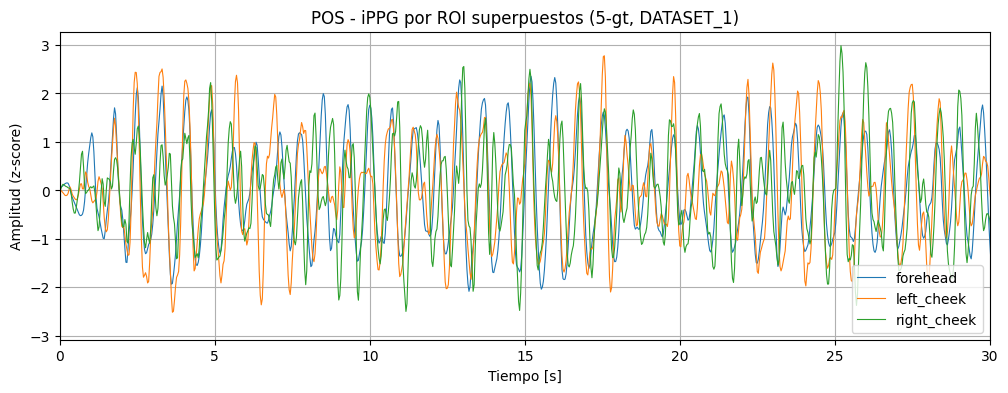

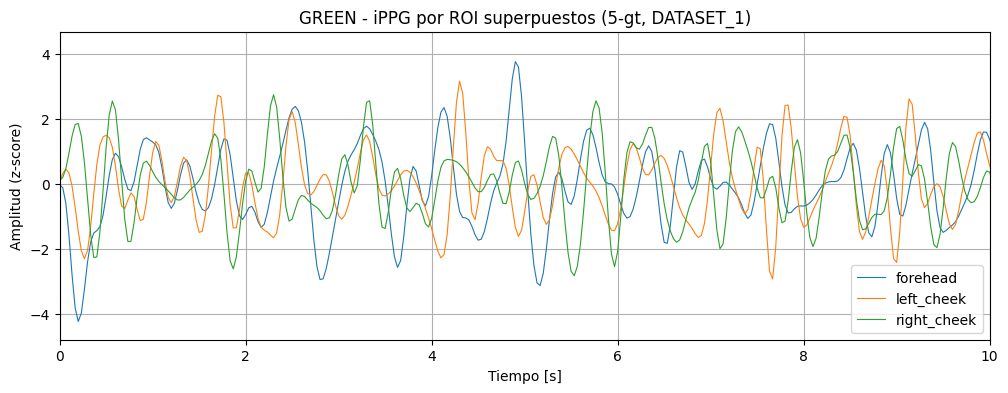

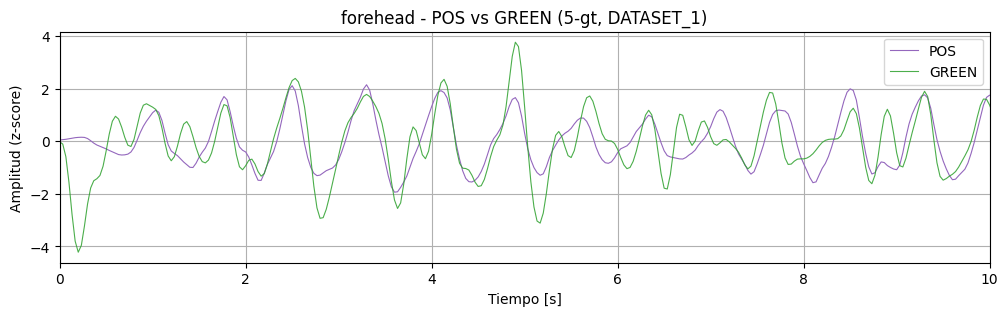

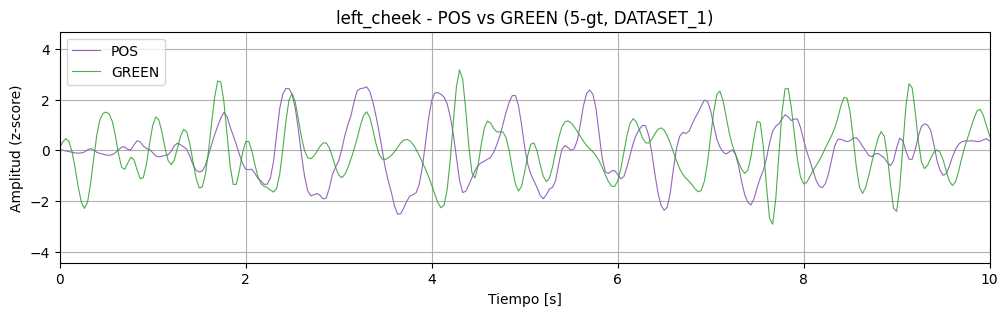

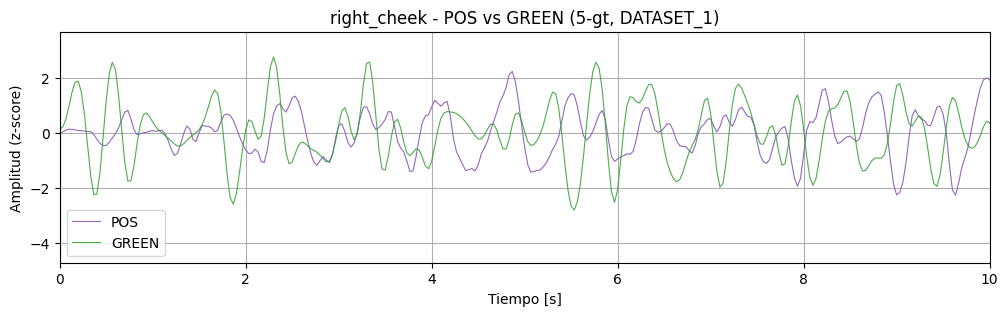

Filtrando al rededor de la frecuencia de la HR +- 0.5Hz


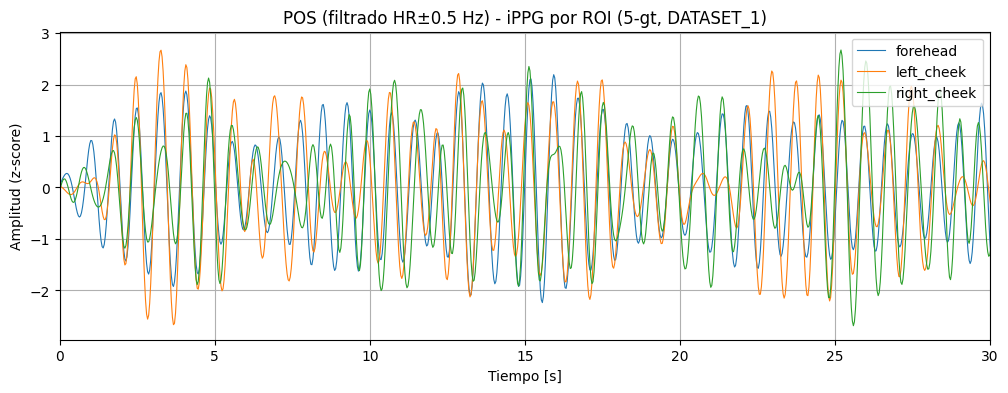

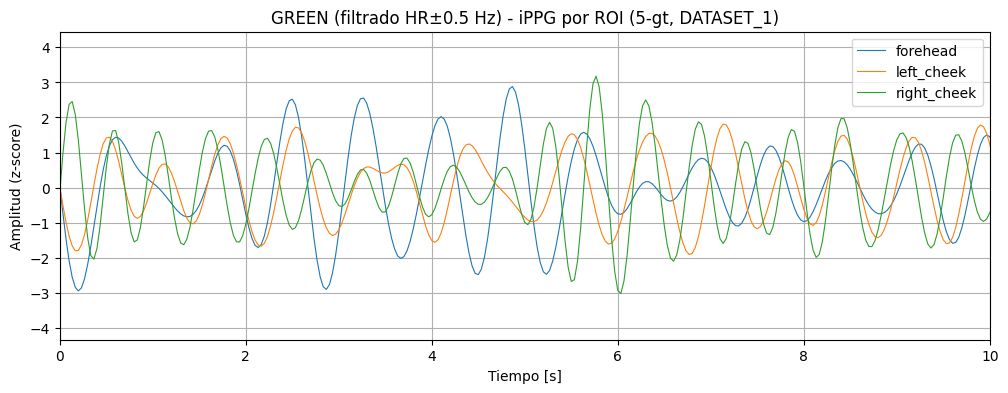

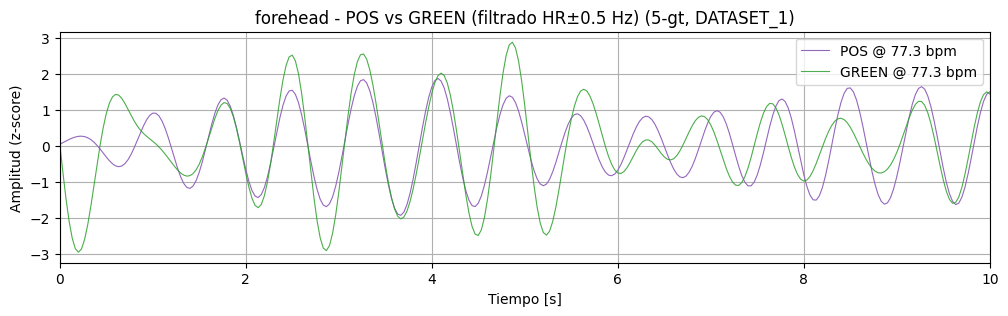

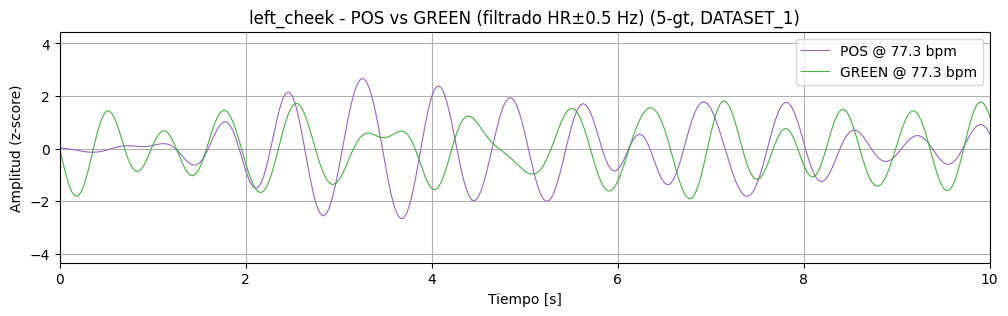

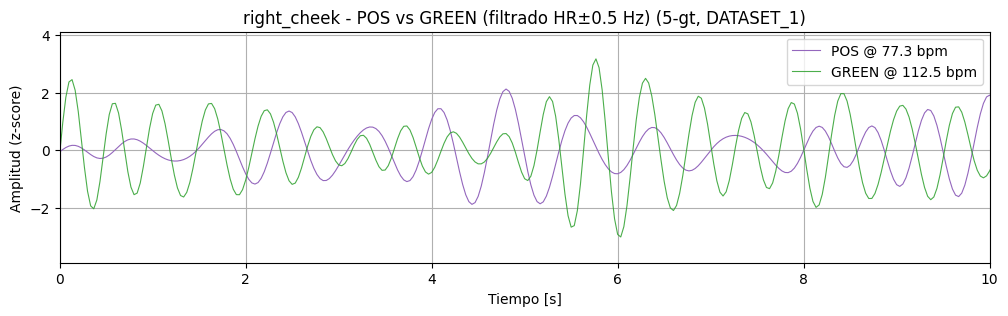

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from IppgSignalObtainer import IppgSignalObtainer
from Tools.signalprocesser import SignalProcessor
from Tools.ParametersCalculator import ParametersCalculator

# Configuración
fs = 30  # UBFC suele estar a 30 fps
window_length = 60  # segundos a analizar
start_time = 5  # segundos desde donde comenzar

base_folder = 'UBFC_DATASET_MERGED'
dataset_name = 'DATASET_1'
subject_dir = '5-gt'  # "gt5" solicitado
video_path = os.path.join(base_folder, dataset_name, subject_dir, 'vid.avi')

# Extrae series RGB por ROI del video
rois = IppgSignalObtainer.extractSeriesRoiRGBFromVideo(
    video_path, fs,
    window_length=window_length, start_time=start_time,
    forehead=True, cheeks=True, under_nose=False, full_face=False, play_video=False
)

# Obtiene iPPG por ROI con POS y GREEN
pos_signals = {}
green_signals = {}
for roi_name, channels in rois.items():
    red = channels.get('red', [])
    g = channels.get('green', [])
    blue = channels.get('blue', [])
    if len(red) == 0 or len(g) == 0 or len(blue) == 0:
        continue

    pos_sig = IppgSignalObtainer.GetRppGSeriesfromRGBSeries(
        red, g, blue, fs,
        normalize=False, derivative=False, bandpass=True, detrend=True, method='pos'
    )
    green_sig = IppgSignalObtainer.GetRppGSeriesfromRGBSeries(
        red, g, blue, fs,
        normalize=False, derivative=False, bandpass=True, detrend=True, method='green'
    )

    pos_signals[roi_name] = np.asarray(pos_sig)
    green_signals[roi_name] = np.asarray(green_sig)

# Helper: normaliza para comparar formas (z-score)
def zscore(x: np.ndarray) -> np.ndarray:
    x = np.asarray(x)
    if x.size == 0:
        return x
    x = x - np.mean(x)
    s = np.std(x)
    return x if s == 0 else x / s

# Calcula HR por ROI y método
calc = ParametersCalculator()
hr_pos = {}
hr_green = {}
for roi_name in rois.keys():
    ps = pos_signals.get(roi_name)
    gs = green_signals.get(roi_name)
    if ps is not None and len(ps) > 0:
        hr_pos[roi_name] = float(calc.ObtainHeartRate(np.array(ps), np.array([]), fs, method='two_peaks_periodogram'))
    if gs is not None and len(gs) > 0:
        hr_green[roi_name] = float(calc.ObtainHeartRate(np.array(gs), np.array([]), fs, method='two_peaks_periodogram'))

# Imprime HR estimado (bpm)
print('HR estimado (bpm) por ROI:')
for roi_name in sorted(set(list(pos_signals.keys()) + list(green_signals.keys()))):
    hp = hr_pos.get(roi_name)
    hg = hr_green.get(roi_name)
    print(f"  {roi_name:12s} | POS: {hp:.2f} bpm" + (f"  | GREEN: {hg:.2f} bpm" if hg is not None else ""))

# 1) POS: superposición de iPPG por ROI (sólo 0-10s y líneas finas)
plt.figure(figsize=(12, 4))
for roi_name, sig in pos_signals.items():
    t = np.arange(len(sig)) / fs
    plt.plot(t, zscore(sig), label=roi_name, linewidth=0.8)
plt.title('POS - iPPG por ROI superpuestos (5-gt, DATASET_1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud (z-score)')
plt.xlim(0, 30)
plt.legend()
plt.grid(True)
plt.show()

# 2) GREEN: superposición de iPPG por ROI (sólo 0-10s y líneas finas)
plt.figure(figsize=(12, 4))
for roi_name, sig in green_signals.items():
    t = np.arange(len(sig)) / fs
    plt.plot(t, zscore(sig), label=roi_name, linewidth=0.8)
plt.title('GREEN - iPPG por ROI superpuestos (5-gt, DATASET_1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud (z-score)')
plt.xlim(0, 10)
plt.legend()
plt.grid(True)
plt.show()

# 3) Para cada ROI: GREEN superpuesto con POS (sólo 0-10s y líneas finas)
for roi_name in rois.keys():
    pos_sig = pos_signals.get(roi_name)
    green_sig = green_signals.get(roi_name)
    if pos_sig is None or green_sig is None or len(pos_sig) == 0 or len(green_sig) == 0:
        continue
    n = min(len(pos_sig), len(green_sig))
    t = np.arange(n) / fs
    plt.figure(figsize=(12, 3))
    plt.plot(t, zscore(pos_sig[:n]), label='POS', color='tab:purple', linewidth=0.8)
    plt.plot(t, zscore(green_sig[:n]), label='GREEN', color='tab:green', alpha=0.85, linewidth=0.8)
    plt.title(f'{roi_name} - POS vs GREEN (5-gt, DATASET_1)')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (z-score)')
    plt.xlim(0, 10)
    plt.legend()
    plt.grid(True)
    plt.show()

# ---- FILTRADO ESTRECHO ALREDEDOR DE HR (±0.5 Hz) ----

print("="*80)
print("Filtrando al rededor de la frecuencia de la HR +- 0.5Hz")
print("="*80)

def bandpass_hr(x: np.ndarray, fs: float, hr_bpm: float, half_width_hz: float = 0.5) -> np.ndarray:
    if x is None or len(x) == 0 or hr_bpm is None or not np.isfinite(hr_bpm):
        return x
    f0 = hr_bpm / 60.0
    low = max(0.1, f0 - half_width_hz)
    high = min(fs / 2 - 0.1, f0 + half_width_hz)
    if low >= high:
        return x
    return SignalProcessor.bandpass(np.asarray(x), fs, order=3, lowcut=low, highcut=high)

pos_signals_narrow = {}
green_signals_narrow = {}
for roi_name in rois.keys():
    if roi_name in pos_signals and roi_name in hr_pos:
        pos_signals_narrow[roi_name] = bandpass_hr(pos_signals[roi_name], fs, hr_pos[roi_name], half_width_hz=0.5)
    if roi_name in green_signals and roi_name in hr_green:
        green_signals_narrow[roi_name] = bandpass_hr(green_signals[roi_name], fs, hr_green[roi_name], half_width_hz=0.5)

# 4) POS (filtrado HR±0.5 Hz): superposición por ROI
plt.figure(figsize=(12, 4))
for roi_name, sig in pos_signals_narrow.items():
    t = np.arange(len(sig)) / fs
    plt.plot(t, zscore(sig), label=f'{roi_name}', linewidth=0.8)
plt.title('POS (filtrado HR±0.5 Hz) - iPPG por ROI (5-gt, DATASET_1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud (z-score)')
plt.xlim(0, 30)
plt.legend()
plt.grid(True)
plt.show()

# 5) GREEN (filtrado HR±0.5 Hz): superposición por ROI
plt.figure(figsize=(12, 4))
for roi_name, sig in green_signals_narrow.items():
    t = np.arange(len(sig)) / fs
    plt.plot(t, zscore(sig), label=f'{roi_name}', linewidth=0.8)
plt.title('GREEN (filtrado HR±0.5 Hz) - iPPG por ROI (5-gt, DATASET_1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud (z-score)')
plt.xlim(0, 10)
plt.legend()
plt.grid(True)
plt.show()

# 6) Para cada ROI: POS vs GREEN (filtrados HR±0.5 Hz propios)
for roi_name in rois.keys():
    pos_sig_n = pos_signals_narrow.get(roi_name)
    green_sig_n = green_signals_narrow.get(roi_name)
    if pos_sig_n is None or green_sig_n is None or len(pos_sig_n) == 0 or len(green_sig_n) == 0:
        continue
    n = min(len(pos_sig_n), len(green_sig_n))
    t = np.arange(n) / fs
    plt.figure(figsize=(12, 3))
    plt.plot(t, zscore(pos_sig_n[:n]), label=f'POS @ {hr_pos.get(roi_name, np.nan):.1f} bpm', color='tab:purple', linewidth=0.8)
    plt.plot(t, zscore(green_sig_n[:n]), label=f'GREEN @ {hr_green.get(roi_name, np.nan):.1f} bpm', color='tab:green', alpha=0.85, linewidth=0.8)
    plt.title(f'{roi_name} - POS vs GREEN (filtrado HR±0.5 Hz) (5-gt, DATASET_1)')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (z-score)')
    plt.xlim(0, 10)
    plt.legend()
    plt.grid(True)
    plt.show()

#plt.show()


### Correlacion cruzada

Probamos con la misma señal (5-gt) y vemos los picos y corrimientos y comparamos los lags y correlacion

In [23]:
# Plot ALL ROIs together with peak detection (unfiltered and filtered) and full-length cross-correlations
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from typing import Dict
from Tools.ParametersCalculator import ParametersCalculator

def plot_all_rois_signals_and_xcorr(pos_signals: Dict[str, np.ndarray],
                                    pos_signals_narrow: Dict[str, np.ndarray],
                                    fs: float,
                                    show_filtered: bool = True,
                                    normalize: bool = True) -> None:
    """
    - Plots all ROI signals together (unfiltered) with detected peaks marked.
    - Optionally, plots all ROI signals together (filtered HR±0.5 Hz) with peaks.
    - Plots full-length cross-correlation curves for all ROI pairs (unfiltered and optionally filtered),
      marking the peak lag (maximum correlation) over the WHOLE lag range, with sub-sample peak refinement.
    """
    def _z(x):
        x = np.asarray(x)
        if not normalize:
            return x
        m = np.mean(x)
        s = np.std(x)
        return (x - m) / (s + 1e-12)

    def _compute_peaks(signal_1d: np.ndarray, fs: float, distance_s: float = 0.3) -> np.ndarray:
        calc = ParametersCalculator()
        return calc.GetPeaks(signal_1d, fs=fs, k_h_max_R=1, distance=distance_s)

    def _xcorr_full(x, y):
        n = min(len(x), len(y))
        if n == 0:
            return None, None
        x = _z(x[:n]); y = _z(y[:n])
        corr = np.correlate(x, y, mode='full') / n
        lags = np.arange(-n + 1, n) / fs
        return lags, corr

    def _parabolic_refine(y, i):
        # quadratic interpolation around index i -> (i_refined, peak_value)
        if i <= 0 or i >= len(y) - 1:
            return float(i), float(y[i])
        denom = (y[i-1] - 2.0*y[i] + y[i+1]) + 1e-12
        xv = 0.5 * (y[i-1] - y[i+1]) / denom
        pv = y[i] - 0.25 * (y[i-1] - y[i+1]) * xv
        return i + xv, pv

    rois = list(pos_signals.keys())

    # 1) Unfiltered signals with peaks, all ROIs together
    plt.figure(figsize=(14, 5))
    for roi in rois:
        x = np.asarray(pos_signals.get(roi, []))
        if x.size == 0:
            continue
        t = np.arange(x.size) / fs
        plt.plot(t, _z(x), label=roi, linewidth=0.9)
    # overlay peaks per ROI
    for roi in rois:
        x = np.asarray(pos_signals.get(roi, []))
        if x.size == 0:
            continue
        peaks = _compute_peaks(x, fs)
        if peaks is None or len(peaks) == 0:
            continue
        t_peaks = peaks / fs
        plt.scatter(t_peaks, _z(x)[peaks], s=12, marker='o', alpha=0.8)
    plt.title('All ROIs - POS (unfiltered) with peak markers')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude' + (' (z-score)' if normalize else ''))
    plt.grid(True)
    plt.legend(ncol=min(len(rois), 4))

    # 2) Filtered signals with peaks, all ROIs together
    if show_filtered:
        plt.figure(figsize=(14, 5))
        for roi in rois:
            xf = np.asarray(pos_signals_narrow.get(roi, []))
            if xf.size == 0:
                continue
            t = np.arange(xf.size) / fs
            plt.plot(t, _z(xf), label=roi, linewidth=0.9)
        for roi in rois:
            xf = np.asarray(pos_signals_narrow.get(roi, []))
            if xf.size == 0:
                continue
            peaks = _compute_peaks(xf, fs)
            if peaks is None or len(peaks) == 0:
                continue
            t_peaks = peaks / fs
            plt.scatter(t_peaks, _z(xf)[peaks], s=12, marker='o', alpha=0.8)
        plt.title('All ROIs - POS (filtered HR±0.5 Hz) with peak markers')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude' + (' (z-score)' if normalize else ''))
        plt.grid(True)
        plt.legend(ncol=min(len(rois), 4))

    # 3) Full-length cross-correlations for all ROI pairs (unfiltered) with refined peak lag
    pairs = list(combinations(rois, 2))
    if len(pairs) > 0:
        ncols = 2 if len(pairs) > 1 else 1
        nrows = int(np.ceil(len(pairs) / ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3 * nrows), squeeze=False)
        fig.suptitle('Cross-correlation (unfiltered) - full lag range (sub-sample peak)', y=1.02)
        for idx, (a, b) in enumerate(pairs):
            r = idx // ncols; c = idx % ncols
            ax = axes[r][c]
            xa = np.asarray(pos_signals.get(a, []))
            xb = np.asarray(pos_signals.get(b, []))
            lags, corr = _xcorr_full(xa, xb)
            if lags is None:
                ax.set_visible(False)
                continue
            i = int(np.argmax(corr))
            i_ref, peak_val = _parabolic_refine(corr, i)
            lag_step = (lags[1] - lags[0]) if len(lags) > 1 else (1.0 / fs)
            peak_lag = lags[0] + i_ref * lag_step
            ax.plot(lags, corr, color='tab:blue', linewidth=1.0)
            ax.axvline(peak_lag, color='tab:blue', linestyle='--', alpha=0.7)
            ax.set_title(f'{a} vs {b} | peak={peak_lag*1000:.1f} ms (r={peak_val:.3f})')
            ax.set_xlabel('Lag [s]'); ax.set_ylabel('Corr')
            ax.grid(True)
        # hide unused axes
        for j in range(len(pairs), nrows * ncols):
            r = j // ncols; c = j % ncols
            axes[r][c].set_visible(False)
        plt.tight_layout()

    # 4) Full-length cross-correlations for all ROI pairs (filtered) with refined peak lag
    if show_filtered and len(pairs) > 0:
        ncols = 2 if len(pairs) > 1 else 1
        nrows = int(np.ceil(len(pairs) / ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3 * nrows), squeeze=False)
        fig.suptitle('Cross-correlation (filtered HR±0.5 Hz) - full lag range (sub-sample peak)', y=1.02)
        for idx, (a, b) in enumerate(pairs):
            r = idx // ncols; c = idx % ncols
            ax = axes[r][c]
            xa = np.asarray(pos_signals_narrow.get(a, []))
            xb = np.asarray(pos_signals_narrow.get(b, []))
            lags, corr = _xcorr_full(xa, xb)
            if lags is None:
                ax.set_visible(False)
                continue
            i = int(np.argmax(corr))
            i_ref, peak_val = _parabolic_refine(corr, i)
            lag_step = (lags[1] - lags[0]) if len(lags) > 1 else (1.0 / fs)
            peak_lag = lags[0] + i_ref * lag_step
            ax.plot(lags, corr, color='tab:green', linewidth=1.0)
            ax.axvline(peak_lag, color='tab:green', linestyle='--', alpha=0.7)
            ax.set_title(f'{a} vs {b} | peak={peak_lag*1000:.1f} ms (r={peak_val:.3f})')
            ax.set_xlabel('Lag [s]'); ax.set_ylabel('Corr')
            ax.grid(True)
        for j in range(len(pairs), nrows * ncols):
            r = j // ncols; c = j % ncols
            axes[r][c].set_visible(False)
        plt.tight_layout()

    plt.show()

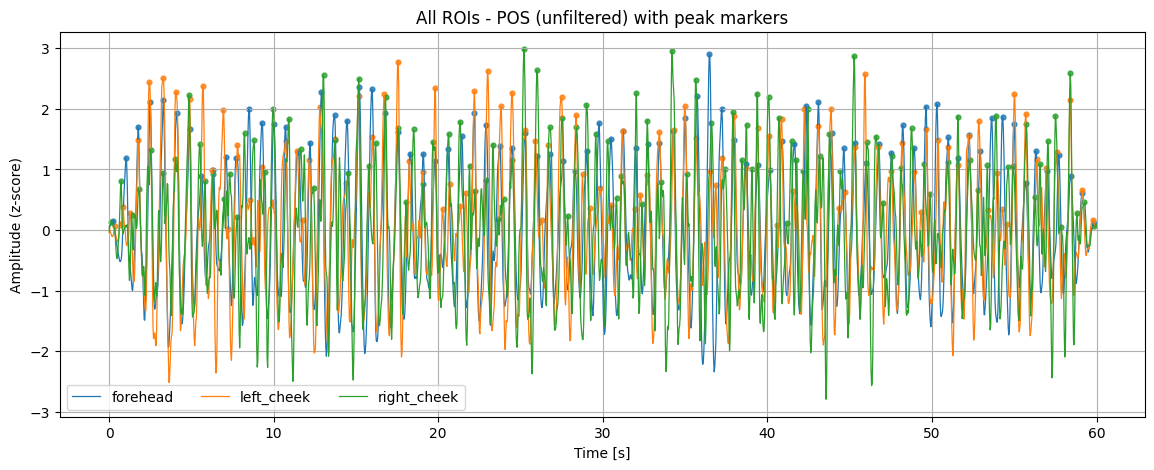

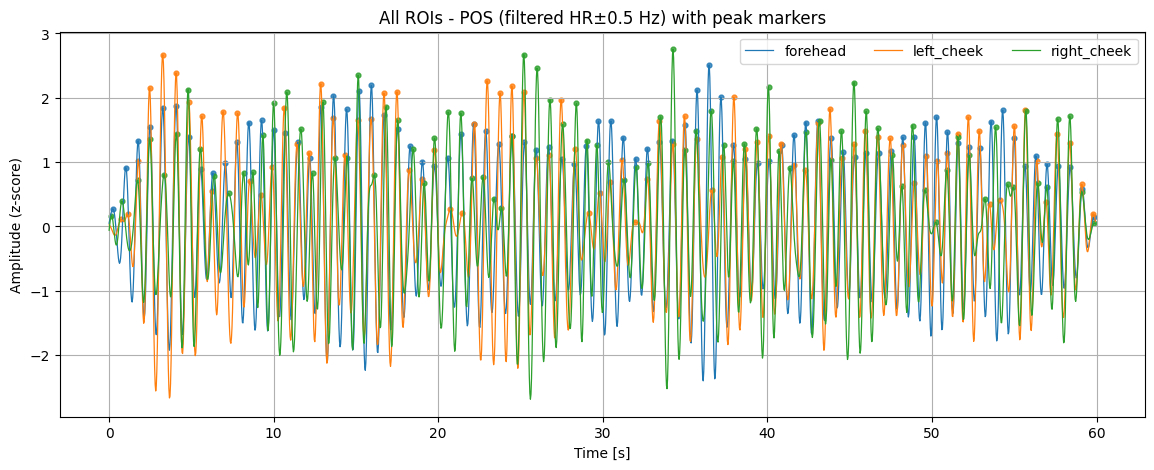

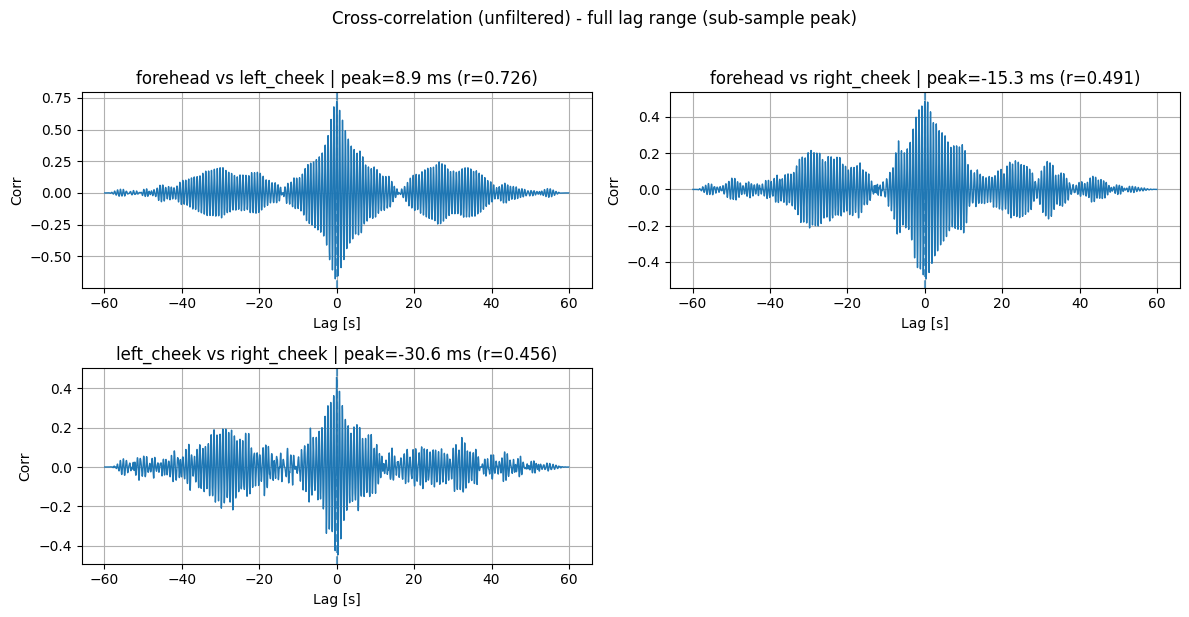

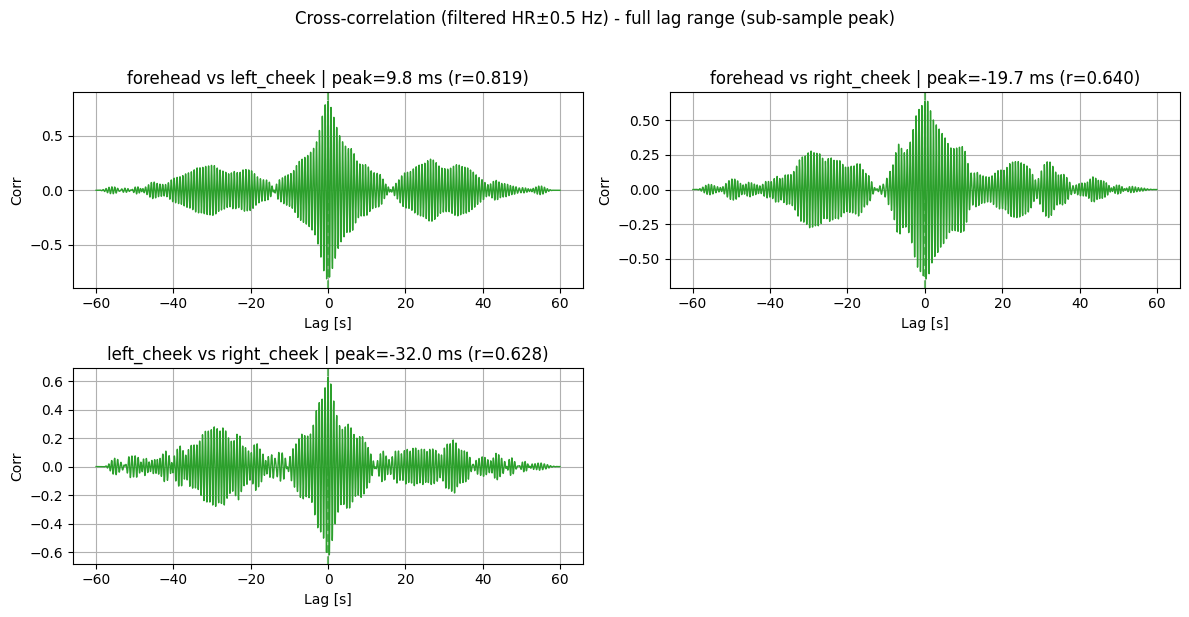

In [24]:
plot_all_rois_signals_and_xcorr(pos_signals, pos_signals_narrow, fs, show_filtered=True, normalize=True)

Para esta señal parece que las señales tienen un leve corrimiento, con un lag optimo de 8.9 ms entre frente y mejilla izquierda. En terminos de morfologia, aunque baja bastante cuando se compara con la mejilla derecha, puede verse que tambien visualmente se ve que esta es mucho mas ruidosa que las otras dos. Entre la frente y la mejilla derecha, se ven correlaciones relativamente altas, lo cual pareciera hablar de que morfologicamente las señales son similares en terminos globales, aunque seria necesario un analisis mas profundo.

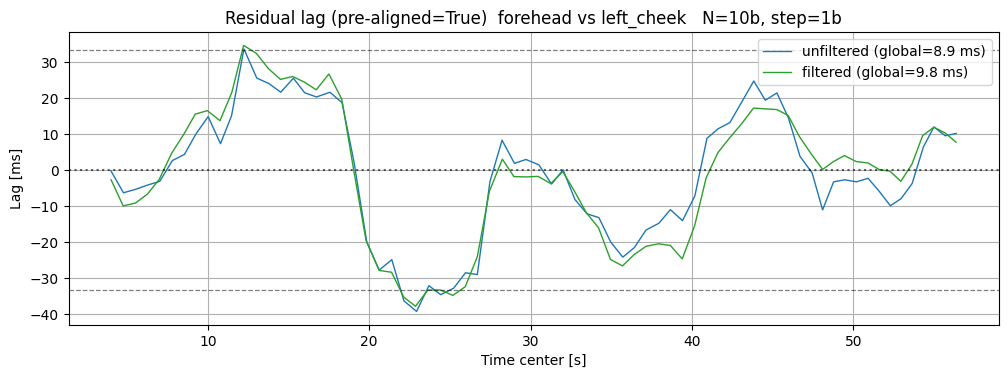

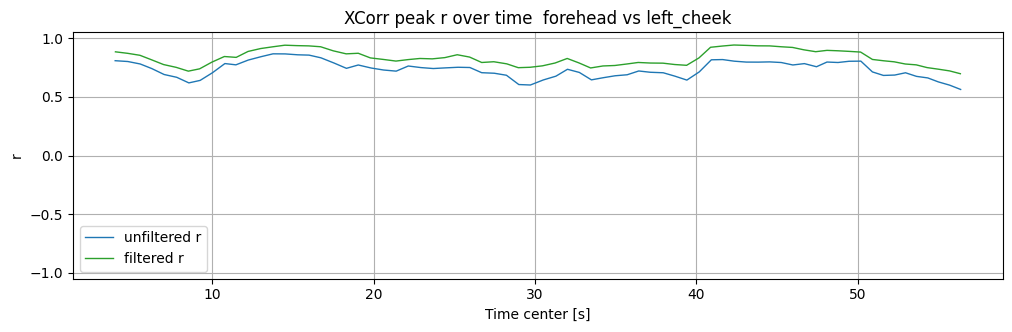

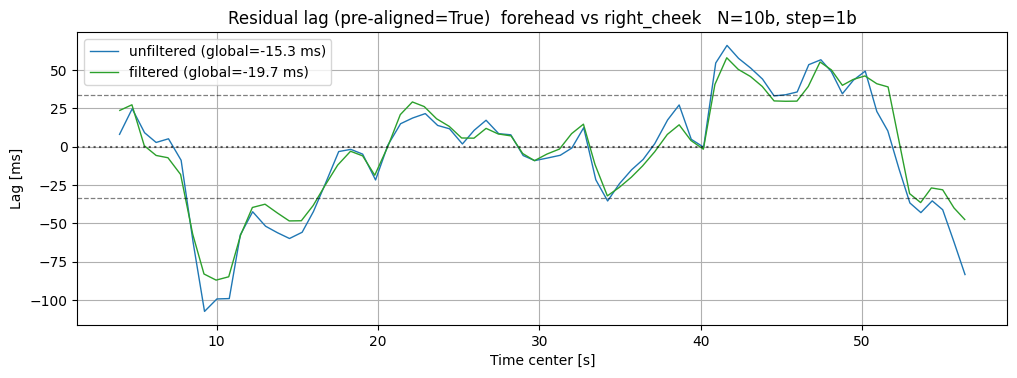

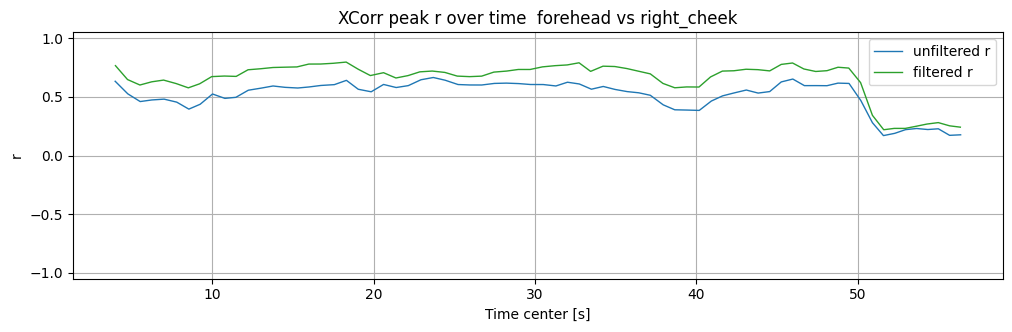

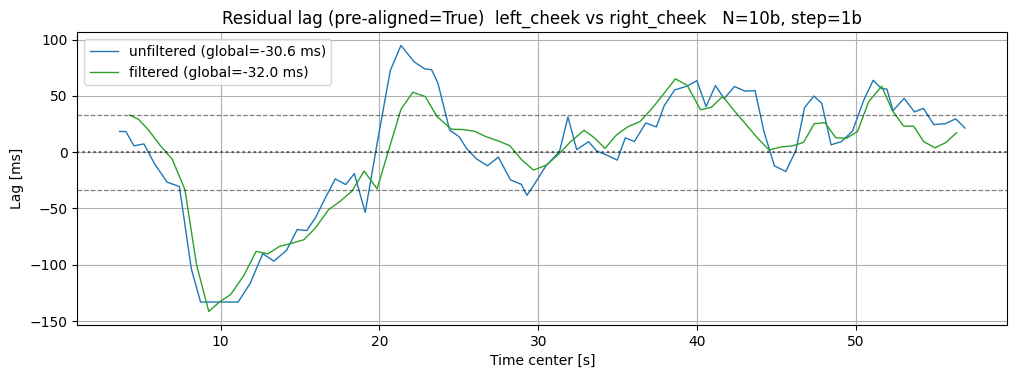

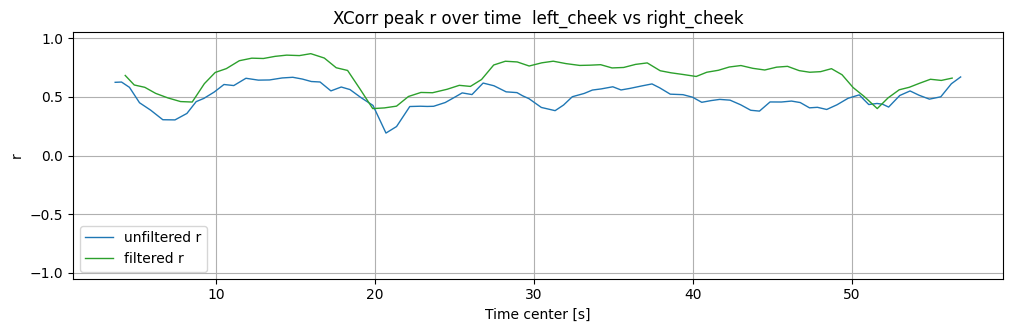

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from typing import Dict, Tuple, List
from Tools.ParametersCalculator import ParametersCalculator

def _parabolic_refine(y, i):
    if i <= 0 or i >= len(y)-1:
        return i, y[i]
    xv = 0.5 * (y[i-1] - y[i+1]) / (y[i-1] - 2*y[i] + y[i+1])
    pv = y[i] - 0.25 * (y[i-1] - y[i+1]) * xv
    return i + xv, pv

def _xcorr_peak_constrained(x, y, fs, max_lag_s=None):
    n = min(len(x), len(y))
    if n < 3:
        return np.nan, np.nan
    x = (x[:n] - np.mean(x[:n])) / (np.std(x[:n]) + 1e-12)
    y = (y[:n] - np.mean(y[:n])) / (np.std(y[:n]) + 1e-12)
    corr = np.correlate(x, y, mode='full') / n
    lags = np.arange(-n + 1, n)
    if max_lag_s is not None:
        k = int(max_lag_s * fs)
        keep = (lags >= -k) & (lags <= k)
        lags = lags[keep]; corr = corr[keep]
    i = int(np.argmax(corr))
    i_ref, c_ref = _parabolic_refine(corr, i)
    lag_samples = lags[0] + i_ref
    return 1000.0 * lag_samples / fs, float(c_ref)

def _shift_by_ms(x, fs, shift_ms):
    t = np.arange(len(x)) / fs
    t_new = t - (shift_ms / 1000.0)
    return np.interp(t, t_new, x, left=x[0], right=x[-1])

def sliding_xcorr_lag(pos_signals: Dict[str, np.ndarray],
                      pos_signals_narrow: Dict[str, np.ndarray],
                      fs: float,
                      n_beats: int = 10,
                      step_beats: int = 1,
                      roi_pairs: List[Tuple[str, str]] = None,
                      peak_dist_s: float = 0.3,
                      max_lag_frac: float = 0.25,
                      prealign: bool = True,
                      prealign_max_lag_s: float = 0.5,
                      plot: bool = False) -> Dict:
    """
    Beat-anchored sliding xcorr for BOTH unfiltered and filtered POS.
    - Pre-align each mode by its global lag (optional).
    - Windows: N beats (of reference, unfiltered for 'unfiltered' mode and filtered for 'filtered' mode), hop=1 beat.
    Returns per (roiA, roiB): {'unfiltered': {...}, 'filtered': {...}}.
    """
    calc = ParametersCalculator()
    rois = list(pos_signals.keys())
    if roi_pairs is None:
        roi_pairs = list(combinations(rois, 2))

    def analyze_one(A, B, label):
        if A is None or B is None or len(A) < 3 or len(B) < 3:
            return None
        n = min(len(A), len(B))
        A = np.asarray(A[:n]); B = np.asarray(B[:n])

        if prealign:
            g_lag_ms, g_r = _xcorr_peak_constrained(A, B, fs, max_lag_s=prealign_max_lag_s)
            B_align = _shift_by_ms(B, fs, -g_lag_ms)
        else:
            g_lag_ms, g_r = 0.0, np.nan
            B_align = B

        pA = calc.GetPeaks(A, fs=fs, k_h_max_R=1, distance=peak_dist_s)
        if len(pA) < n_beats + 1:
            return {'global_lag_ms': g_lag_ms, 'global_r': g_r,
                    'time_centers_s': np.array([]), 'lag_ms': np.array([]), 'r': np.array([])}

        tA = pA / fs
        periods = np.diff(tA)
        medT = np.median(periods) if periods.size else 1.0
        max_lag_s = max_lag_frac * medT

        centers, lags, rs = [], [], []
        i = 0
        while i + n_beats < len(pA):
            s = pA[i]; e = pA[i + n_beats]
            segA = A[s:e]
            segB = B_align[s:e]
            lag_ms, r = _xcorr_peak_constrained(segA, segB, fs, max_lag_s=max_lag_s)
            centers.append((s + e) / 2.0 / fs); lags.append(lag_ms); rs.append(r)
            i += step_beats

        return {'global_lag_ms': g_lag_ms, 'global_r': g_r,
                'time_centers_s': np.asarray(centers),
                'lag_ms': np.asarray(lags),
                'r': np.asarray(rs)}

    out = {}
    for a, b in roi_pairs:
        # Unfiltered
        A_unf = pos_signals.get(a); B_unf = pos_signals.get(b)
        res_unf = analyze_one(A_unf, B_unf, 'unfiltered')

        # Filtered
        A_f = pos_signals_narrow.get(a); B_f = pos_signals_narrow.get(b)
        res_f = analyze_one(A_f, B_f, 'filtered')

        out[(a, b)] = {'unfiltered': res_unf, 'filtered': res_f}

        if plot and res_unf is not None and res_f is not None:
            # Lag vs time
            plt.figure(figsize=(12, 3.8))
            if res_unf['time_centers_s'].size:
                plt.plot(res_unf['time_centers_s'], res_unf['lag_ms'], label=f'unfiltered (global={res_unf["global_lag_ms"]:.1f} ms)', color='tab:blue', linewidth=1.0)
            if res_f['time_centers_s'].size:
                plt.plot(res_f['time_centers_s'], res_f['lag_ms'], label=f'filtered (global={res_f["global_lag_ms"]:.1f} ms)', color='tab:green', linewidth=1.0)
            plt.axhline(0, color='k', linestyle=':', alpha=0.6)
            # ±1 frame reference
            res_ms = 1000.0 / fs
            plt.axhline(+res_ms, color='k', linestyle='--', alpha=0.5, linewidth=0.9)
            plt.axhline(-res_ms, color='k', linestyle='--', alpha=0.5, linewidth=0.9)
            plt.title(f'Residual lag (pre-aligned={prealign})  {a} vs {b}   N={n_beats}b, step=1b')
            plt.xlabel('Time center [s]'); plt.ylabel('Lag [ms]')
            plt.grid(True); plt.legend()

            # r vs time
            plt.figure(figsize=(12, 3.2))
            if res_unf['time_centers_s'].size:
                plt.plot(res_unf['time_centers_s'], res_unf['r'], label='unfiltered r', color='tab:blue', linewidth=1.0)
            if res_f['time_centers_s'].size:
                plt.plot(res_f['time_centers_s'], res_f['r'], label='filtered r', color='tab:green', linewidth=1.0)
            plt.ylim(-1.05, 1.05)
            plt.title(f'XCorr peak r over time  {a} vs {b}')
            plt.xlabel('Time center [s]'); plt.ylabel('r')
            plt.grid(True); plt.legend()
            plt.show()

    return out

res_plot = sliding_xcorr_lag(pos_signals, pos_signals_narrow, fs, n_beats=10, step_beats=1, plot=True)

Parece verse que la señal se desfaza en ciclos si miramos las ventanas de 10 latidos. La correlacion entre las ventanas igualmente se mantiene similar

### Analizamos para la UBFC entera

In [40]:
import os
import numpy as np
import pandas as pd
from itertools import combinations
from typing import Dict, List, Tuple, Union
from collections import defaultdict

from IppgSignalObtainer import IppgSignalObtainer
from Tools.signalprocesser import SignalProcessor
from Tools.ParametersCalculator import ParametersCalculator
from process_ubfc_dataset import load_ubfc_ground_truth

# REQUISITO: tener definida en el notebook la función sliding_xcorr_lag(...)
# (beat-anchored, compara unfiltered vs filtered, prealign opcional)

def _bandpass_hr(series: np.ndarray, fs: float, hr_bpm: float, half_width_hz: float = 0.5):
    f0 = float(hr_bpm) / 60.0
    low = max(0.1, f0 - half_width_hz)
    high = min(fs/2 - 0.1, f0 + half_width_hz)
    if low >= high:
        return np.asarray(series)
    return SignalProcessor.bandpass(np.asarray(series), fs, order=3, lowcut=low, highcut=high)

def _global_xcorr_subsample(x: np.ndarray, y: np.ndarray, fs: float, max_lag_s: float = None):
    # xcorr global + refinamiento parabólico para sub-muestra
    n = min(len(x), len(y))
    if n < 3:
        return np.nan, np.nan
    x = (x[:n] - np.mean(x[:n])) / (np.std(x[:n]) + 1e-12)
    y = (y[:n] - np.mean(y[:n])) / (np.std(y[:n]) + 1e-12)
    corr = np.correlate(x, y, mode='full') / n
    lags = np.arange(-n + 1, n)
    if max_lag_s is not None:
        k = int(max_lag_s * fs)
        keep = (lags >= -k) & (lags <= k)
        corr = corr[keep]; lags = lags[keep]
    i = int(np.argmax(corr))
    if 0 < i < len(corr) - 1:
        denom = (corr[i-1] - 2*corr[i] + corr[i+1]) + 1e-12
        xv = 0.5 * (corr[i-1] - corr[i+1]) / denom
        peak_val = corr[i] - 0.25 * (corr[i-1] - corr[i+1]) * xv
        i_ref = i + xv
    else:
        i_ref = float(i); peak_val = float(corr[i])
    lag_samples = lags[0] + i_ref
    return 1000.0 * lag_samples / fs, float(peak_val)

def _extract_pos_signals(video_path: str, fs: float, window_length: int, start_time: int,
                         forehead=True, cheeks=True, under_nose=False) -> Dict[str, np.ndarray]:
    rois_rgb = IppgSignalObtainer.extractSeriesRoiRGBFromVideo(
        video_path, fs, window_length=window_length, start_time=start_time,
        forehead=forehead, cheeks=cheeks, under_nose=under_nose, full_face=False, play_video=False
    )
    pos: Dict[str, np.ndarray] = {}
    for roi, ch in rois_rgb.items():
        r, g, b = ch.get('red', []), ch.get('green', []), ch.get('blue', [])
        if len(r) and len(g) and len(b):
            pos_sig = IppgSignalObtainer.GetRppGSeriesfromRGBSeries(
                r, g, b, fs, normalize=False, derivative=False, bandpass=True, detrend=True, method='pos'
            )
            pos[roi] = np.asarray(pos_sig)
    return pos

def analyze_ubfc_lag_metrics_with_hr_filter(
    base_folder: str = 'UBFC_DATASET_MERGED',
    datasets: Tuple[str, ...] = ('DATASET_1', 'DATASET_2'),
    fs: float = 30,
    window_length: int = 60,
    start_time: int = 5,
    n_beats: int = 10,
    step_beats: int = 1,
    hr_err_threshold_bpm: float = 10.0,
    prealign: bool = True,
    save_csv_path: str = None
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, Dict[str, list], Dict[str, list]]:
    """
    Recorre UBFC DATASET_1 y DATASET_2.
    - Extrae POS por ROI, estima HR por ROI.
    - Conserva SOLO pares de ROIs (A,B) si ambos errores HR < umbral.
    - Calcula métricas globales (xcorr lag/r con refinamiento) y locales (sliding beat-anchored),
      para unfiltered y filtered (HR±0.5 Hz).
    Devuelve:
      df_results, df_summary, df_failures, pair_err_included, pair_err_excluded
    """
    calc = ParametersCalculator()
    results_rows = []
    failures_rows = []
    pair_err_included = defaultdict(list)  # clave 'forehead|right_cheek' -> lista de dicts
    pair_err_excluded = defaultdict(list)

    for dataset_name in datasets:
        dataset_path = os.path.join(base_folder, dataset_name)
        if not os.path.isdir(dataset_path):
            print(f"[WARN] No existe {dataset_path}, salto.")
            continue
        subjects = sorted([d for d in os.listdir(dataset_path)
                           if os.path.isdir(os.path.join(dataset_path, d))])

        for subj in subjects:
            vid_folder = os.path.join(dataset_path, subj)
            video_path = os.path.join(vid_folder, 'vid.avi')
            if not os.path.exists(video_path):
                continue

            # Ground truth
            gt_trace, gt_time, gt_hr, fmt = load_ubfc_ground_truth(vid_folder)
            if gt_hr is None or len(gt_hr) == 0:
                gt_bpm = float(calc.ObtainHeartRate(np.asarray(gt_trace), np.array([]), fs, method='two_peaks_periodogram'))
            else:
                gt_bpm = float(np.nanmean(gt_hr[np.isfinite(gt_hr)])) if np.any(np.isfinite(gt_hr)) else float(np.nan)

            # POS por ROI
            try:
                pos_unf = _extract_pos_signals(video_path, fs, window_length, start_time,
                                               forehead=True, cheeks=True, under_nose=False)
            except Exception as e:
                failures_rows.append({'dataset': dataset_name, 'video_id': subj, 'reason': f'ROI extraction error: {e}'})
                continue
            if len(pos_unf) < 2:
                failures_rows.append({'dataset': dataset_name, 'video_id': subj, 'reason': 'Less than 2 ROIs'})
                continue

            # HR por ROI y errores
            hr_roi = {}
            err_roi = {}
            for roi, sig in pos_unf.items():
                if len(sig) == 0:
                    continue
                hr = float(calc.ObtainHeartRate(np.asarray(sig), np.array([]), fs, method='two_peaks_periodogram'))
                hr_roi[roi] = hr
                err_roi[roi] = abs(hr - gt_bpm)

            if len(err_roi) == 0:
                failures_rows.append({'dataset': dataset_name, 'video_id': subj, 'reason': 'No HR per ROI'})
                continue

            # registrar errores por PAR (incluidos/excluidos por umbral)
            for a, b in combinations(err_roi.keys(), 2):
                key = f'{a}|{b}'
                entry = {
                    'dataset': dataset_name, 'video_id': subj, 'gt_hr_bpm': gt_bpm,
                    'roi_a': a, 'hr_a': hr_roi.get(a, np.nan), 'err_a': err_roi.get(a, np.nan),
                    'roi_b': b, 'hr_b': hr_roi.get(b, np.nan), 'err_b': err_roi.get(b, np.nan),
                }
                if err_roi.get(a, np.inf) < hr_err_threshold_bpm and err_roi.get(b, np.inf) < hr_err_threshold_bpm:
                    pair_err_included[key].append(entry)
                else:
                    pair_err_excluded[key].append(entry)

            # ROIs válidos (error < umbral). Si no hay al menos 2, marcar fallo y seguir
            ok_rois = [roi for roi, e in err_roi.items() if e < hr_err_threshold_bpm]
            if len(ok_rois) < 2:
                row_fail = {'dataset': dataset_name, 'video_id': subj, 'gt_hr_bpm': gt_bpm,
                            'reason': f'Less than 2 ROIs with HR error < {hr_err_threshold_bpm} bpm'}
                for roi in pos_unf.keys():
                    row_fail[f'hr_{roi}'] = hr_roi.get(roi, np.nan)
                    row_fail[f'err_{roi}'] = err_roi.get(roi, np.nan)
                failures_rows.append(row_fail)
                continue

            # señales filtradas HR±0.5 Hz, SOLO para ROIs válidos
            pos_unf_ok = {roi: pos_unf[roi] for roi in ok_rois}
            pos_filt_ok = {roi: _bandpass_hr(pos_unf_ok[roi], fs, hr_roi.get(roi, gt_bpm), half_width_hz=0.5) for roi in ok_rois}

            # Pares SOLO entre ROIs válidos
            pairs = list(combinations(ok_rois, 2))

            # Sliding lag (beat-anchored) SOLO en ROIs válidos
            lag_res = sliding_xcorr_lag(
                pos_signals=pos_unf_ok,
                pos_signals_narrow=pos_filt_ok,
                fs=fs,
                n_beats=n_beats,
                step_beats=step_beats,
                roi_pairs=pairs,
                peak_dist_s=0.3,
                max_lag_frac=0.25,
                prealign=prealign,
                plot=False
            )

            one_frame_ms = 1000.0 / fs

            # Filas de resultados (por par y modo)
            for (a, b), bundle in lag_res.items():
                for mode in ['unfiltered', 'filtered']:
                    m = bundle.get(mode)
                    if m is None or m['time_centers_s'].size == 0:
                        continue

                    # global refinado en el modo correspondiente
                    ga = pos_unf_ok[a] if mode == 'unfiltered' else pos_filt_ok[a]
                    gb = pos_unf_ok[b] if mode == 'unfiltered' else pos_filt_ok[b]
                    g_lag_ms_refined, g_r_refined = _global_xcorr_subsample(ga, gb, fs, max_lag_s=0.5)

                    lags = np.asarray(m['lag_ms'])
                    r = np.asarray(m['r'])
                    lags = lags[np.isfinite(lags)]
                    n_win = int(np.sum(np.isfinite(lags)))
                    if n_win == 0:
                        continue

                    # signed (existing)
                    median_signed = float(np.nanmedian(lags))
                    iqr = float(np.nanpercentile(lags, 75) - np.nanpercentile(lags, 25))
                    # magnitude (new)
                    median_abs = float(np.nanmedian(np.abs(lags)))
                    rms = float(np.sqrt(np.nanmean(lags**2)))

                    results_rows.append({
                        'dataset': dataset_name,
                        'video_id': subj,
                        'roi_a': a, 'roi_b': b,
                        'mode': mode,
                        'gt_hr_bpm': gt_bpm,
                        'global_lag_ms_precalc': float(m['global_lag_ms']),
                        'global_r_precalc': float(m['global_r']),
                        'global_lag_ms_refined': float(g_lag_ms_refined),
                        'global_r_refined': float(g_r_refined),
                        'n_windows': n_win,
                        'median_residual_lag_ms': median_signed,
                        'iqr_residual_lag_ms': iqr,
                        'median_abs_residual_lag_ms': median_abs,  # NEW
                        'rms_residual_lag_ms': rms,                # NEW
                        'median_r': float(np.nanmedian(r)),
                        'pct_windows_|lag|<=1frame': float(np.mean(np.abs(lags) <= one_frame_ms) * 100.0),
                        'pct_windows_r>=0.8': float(np.mean(r >= 0.8) * 100.0),
                    })

    df_results = pd.DataFrame(results_rows).sort_values(['dataset', 'video_id', 'roi_a', 'roi_b', 'mode'])
    df_failures = pd.DataFrame(failures_rows).sort_values(['dataset', 'video_id']) if failures_rows else pd.DataFrame()

    # Resumen agregado por dataset, par y modo (incluye nuevas métricas)
    if not df_results.empty:
        df_summary = (
            df_results.groupby(['dataset', 'roi_a', 'roi_b', 'mode'])
            .agg(
                videos=('video_id', 'nunique'),
                n_windows=('n_windows', 'sum'),
                median_global_lag_ms=('global_lag_ms_refined', 'median'),
                median_global_r=('global_r_refined', 'median'),
                # signed (existing)
                median_residual_lag_ms=('median_residual_lag_ms', 'median'),
                median_iqr_lag_ms=('iqr_residual_lag_ms', 'median'),
                # magnitude (new)
                median_abs_residual_lag_ms=('median_abs_residual_lag_ms', 'median'),
                median_rms_residual_lag_ms=('rms_residual_lag_ms', 'median'),
                # quality
                mean_pct_within_1frame=('pct_windows_|lag|<=1frame', 'mean'),
                mean_pct_high_r=('pct_windows_r>=0.8', 'mean'),
            )
            .reset_index()
        )
    else:
        df_summary = pd.DataFrame()

    if save_csv_path:
        df_results.to_csv(save_csv_path, index=False)
        base, ext = os.path.splitext(save_csv_path)
        df_summary.to_csv(f"{base}_summary{ext or '.csv'}", index=False)
        # guardar dicts de errores por par como tablas
        if pair_err_included:
            inc_rows = [dict(pair=pair, **row) for pair, lst in pair_err_included.items() for row in lst]
            pd.DataFrame(inc_rows).to_csv(f"{base}_pair_err_included{ext or '.csv'}", index=False)
        if pair_err_excluded:
            exc_rows = [dict(pair=pair, **row) for pair, lst in pair_err_excluded.items() for row in lst]
            pd.DataFrame(exc_rows).to_csv(f"{base}_pair_err_excluded{ext or '.csv'}", index=False)
        if not df_failures.empty:
            df_failures.to_csv(f"{base}_failures{ext or '.csv'}", index=False)

    return df_results, df_summary, df_failures, pair_err_included, pair_err_excluded

In [41]:
df_results, df_summary, df_failures, pair_ok, pair_bad = analyze_ubfc_lag_metrics_with_hr_filter(
    base_folder='UBFC_DATASET_MERGED',
    datasets=('DATASET_1', 'DATASET_2'),   # or just ('DATASET_1',)
    fs=30,
    window_length=60,
    start_time=5,
    n_beats=10,
    step_beats=1,
    hr_err_threshold_bpm=10.0,             # keep only pairs with both ROIs < 10 bpm error
    prealign=True,
    save_csv_path='ubfc_lag_metrics.csv'   # optional; saves results + summary + failures + pair error tables
)

print('Results (per video / pair / mode):')
display(df_results.head(20))

print('Summary (aggregated per dataset / pair / mode):')
display(df_summary)

print('Failures (videos without >=2 valid ROIs or extraction issues):')
display(df_failures.head(20))

# Example: inspect one ROI pair’s errors kept/excluded by the <10 bpm rule
key = 'forehead|right_cheek'
print('Included (both ROIs <10 bpm):', len(pair_ok.get(key, [])))
print('Excluded (>=10 bpm in at least one ROI):', len(pair_bad.get(key, [])))
if key in pair_ok:
    display(pd.DataFrame(pair_ok[key]).head())

Results (per video / pair / mode):


dataset video_id       roi_a        roi_b        mode  gt_hr_bpm  \
1   DATASET_1    10-gt    forehead   left_cheek    filtered  72.408340   
0   DATASET_1    10-gt    forehead   left_cheek  unfiltered  72.408340   
3   DATASET_1    10-gt    forehead  right_cheek    filtered  72.408340   
2   DATASET_1    10-gt    forehead  right_cheek  unfiltered  72.408340   
5   DATASET_1    10-gt  left_cheek  right_cheek    filtered  72.408340   
4   DATASET_1    10-gt  left_cheek  right_cheek  unfiltered  72.408340   
7   DATASET_1    11-gt    forehead   left_cheek    filtered  77.704668   
6   DATASET_1    11-gt    forehead   left_cheek  unfiltered  77.704668   
9   DATASET_1    11-gt    forehead  right_cheek    filtered  77.704668   
8   DATASET_1    11-gt    forehead  right_cheek  unfiltered  77.704668   
11  DATASET_1    11-gt  left_cheek  right_cheek    filtered  77.704668   
10  DATASET_1    11-gt  left_cheek  right_cheek  unfiltered  77.704668   
13  DATASET_1    12-gt    forehead   left_cheek    filtered  94.571153   
12  DATASET_1    12-gt    forehead   left_cheek  unfiltered  94.571153   
15  DATASET_1    12-gt    forehead  right_cheek    filtered  94.571153   
14  DATASET_1    12-gt    forehead  right_cheek  unfiltered  94.571153   
17  DATASET_1    12-gt  left_cheek  right_cheek    filtered  94.571153   
16  DATASET_1    12-gt  left_cheek  right_cheek  unfiltered  94.571153   
19  DATASET_1     5-gt    forehead   left_cheek    filtered  77.317059   
18  DATASET_1     5-gt    forehead   left_cheek  unfiltered  77.317059   

    global_lag_ms_precalc  global_r_precalc  global_lag_ms_refined  \
1               44.440628          0.956233              44.440628   
0               42.056159          0.914992              42.056159   
3               54.657814          0.966583              54.657814   
2               52.615627          0.905755              52.615627   
5                8.038786          0.942007               8.038786   
4               10.204457          0.869257              10.204457   
7               18.155591          0.946689              18.155591   
6               15.586459          0.908284              15.586459   
9               23.703144          0.905882              23.703144   
8               22.320354          0.810837              22.320354   
11               5.041282          0.850790               5.041282   
10               5.251924          0.726773               5.251924   
13              33.178024          0.856571              33.178024   
12              29.895344          0.831523              29.895344   
15              22.996853          0.927333              22.996853   
14              23.417960          0.856863              23.417960   
17              -9.292695          0.774602              -9.292695   
16              -6.374330          0.650368              -6.374330   
19               9.848575          0.819065               9.848575   
18               8.857618          0.725889               8.857618   

    global_r_refined  n_windows  median_residual_lag_ms  iqr_residual_lag_ms  \
1           0.956233         35                0.002655            11.315618   
0           0.914992         35                0.353854             7.099982   
3           0.966583         35                0.777127             7.827400   
2           0.905755         35               -1.159000             7.405090   
5           0.942007         35                0.812901            15.310024   
4           0.869257         37               -1.047214            11.148040   
7           0.946689         71               -3.741742            13.325140   
6           0.908284         71               -2.430640            12.846532   
9           0.905882         71               -2.035210            21.424197   
8           0.810837         71               -2.476109            19.734478   
11          0.850790         71                3.380407            37.679109   
10          0.726773

Summary (aggregated per dataset / pair / mode):


dataset       roi_a        roi_b        mode  videos  n_windows  \
0   DATASET_1    forehead   left_cheek    filtered       8        598   
1   DATASET_1    forehead   left_cheek  unfiltered       8        603   
2   DATASET_1    forehead  right_cheek    filtered       8        598   
3   DATASET_1    forehead  right_cheek  unfiltered       8        603   
4   DATASET_1  left_cheek  right_cheek    filtered       8        599   
5   DATASET_1  left_cheek  right_cheek  unfiltered       8        636   
6   DATASET_2    forehead   left_cheek    filtered      33       2815   
7   DATASET_2    forehead   left_cheek  unfiltered      33       2837   
8   DATASET_2    forehead  right_cheek    filtered      33       2815   
9   DATASET_2    forehead  right_cheek  unfiltered      33       2837   
10  DATASET_2  left_cheek  right_cheek    filtered      33       2826   
11  DATASET_2  left_cheek  right_cheek  unfiltered      33       2974   

    median_global_lag_ms  median_global_r  median_residual_lag_ms  \
0              32.099119         0.891950               -0.474325   
1              30.219903         0.817631               -0.066913   
2              24.457763         0.911373               -0.553185   
3              24.057744         0.819890               -0.299581   
4              -3.612391         0.843946                0.436334   
5              -1.134369         0.730045               -1.109582   
6              19.972832         0.868373               -0.195677   
7              18.896159         0.794046                0.018383   
8              20.408772         0.860575                0.448262   
9              19.467040         0.759443                0.681066   
10              0.743803         0.805390                0.972361   
11             -1.082322         0.665713                1.127822   

    median_iqr_lag_ms  median_abs_residual_lag_ms  median_rms_residual_lag_ms  \
0           14.611510                    7.978540                   13.489149   
1           13.117083                    7.064675                   12.491312   
2           13.985066                    6.780956                   10.707070   
3           15.052215                    7.373203                   10.993654   
4           19.496504                    9.997868                   14.491265   
5           18.881143                    9.386603                   14.894754   
6           20.190642                   10.080264                   14.492381   
7           15.297665                    7.567405                   12.007025   
8           15.824615                    8.242339                   13.317550   
9           15.813590                    7.797174                   14.121781   
10          24.816426                   12.339320                   21.508230   
11          26.117617                   13.472424                   20.616244   

    mean_pct_within_1frame  mean_pct_high_r  
0                96.162428        90.309680  
1                96.622144        66.258504  
2                94.176136        84.462367  
3                93.467505        62.299874  
4                89.722011        77.329688  
5                88.181898        46.259467  
6                93.914624        78.502092  
7                94.711798        49.110930  
8                92.464522        79.796281  
9                92.804434        46.332239  
10               85.691305        61.678336  
11               87.783259        19.899517

Failures (videos without >=2 valid ROIs or extraction issues):


dataset   video_id   gt_hr_bpm  \
0  DATASET_2  subject11   96.210504   
1  DATASET_2  subject14   80.412426   
2  DATASET_2  subject18  103.762247   
3  DATASET_2  subject20   60.225089   
4  DATASET_2  subject24   84.591673   
5  DATASET_2  subject25   91.532873   
6  DATASET_2  subject26   73.534714   
7  DATASET_2  subject27   89.366702   
8  DATASET_2  subject35  102.357953   

                                      reason  hr_forehead  err_forehead  \
0  Less than 2 ROIs with HR error < 10.0 bpm    126.56250     30.351996   
1  Less than 2 ROIs with HR error < 10.0 bpm     70.31250     10.099926   
2  Less than 2 ROIs with HR error < 10.0 bpm    126.56250     22.800253   
3  Less than 2 ROIs with HR error < 10.0 bpm    133.59375     73.368661   
4  Less than 2 ROIs with HR error < 10.0 bpm     98.43750     13.845827   
5  Less than 2 ROIs with HR error < 10.0 bpm    112.50000     20.967127   
6  Less than 2 ROIs with HR error < 10.0 bpm     98.43750     24.902786   
7  Less than 2 ROIs with HR error < 10.0 bpm    112.50000     23.133298   
8  Less than 2 ROIs with HR error < 10.0 bpm    112.50000     10.142047   

   hr_left_cheek  err_left_cheek  hr_right_cheek  err_right_cheek  
0      126.56250       30.351996       126.56250        30.351996  
1       70.31250       10.099926        77.34375         3.068676  
2      126.56250       22.800253       126.56250        22.800253  
3      133.59375       73.368661       133.59375        73.368661  
4       98.43750       13.845827        98.43750        13.845827  
5      112.50000       20.967127       112.50000        20.967127  
6       98.43750       24.902786        98.43750        24.902786  
7      112.50000       23.133298       112.50000        23.133298  
8      112.50000       10.142047       112.50000        10.142047

Included (both ROIs <10 bpm): 41
Excluded (>=10 bpm in at least one ROI): 9


dataset video_id  gt_hr_bpm     roi_a      hr_a     err_a        roi_b  \
0  DATASET_1    10-gt  72.408340  forehead  77.34375  4.935410  right_cheek   
1  DATASET_1    11-gt  77.704668  forehead  84.37500  6.670332  right_cheek   
2  DATASET_1    12-gt  94.571153  forehead  98.43750  3.866347  right_cheek   
3  DATASET_1     5-gt  77.317059  forehead  77.34375  0.026691  right_cheek   
4  DATASET_1     6-gt  82.573382  forehead  91.40625  8.832868  right_cheek   

       hr_b     err_b  
0  77.34375  4.935410  
1  84.37500  6.670332  
2  98.43750  3.866347  
3  77.34375  0.026691  
4  91.40625  8.832868

### vieja version (resultados deprecados)

In [ ]:
df_results, df_summary, df_failures, pair_ok, pair_bad = analyze_ubfc_lag_metrics_with_hr_filter(
    base_folder='UBFC_DATASET_MERGED',
    datasets=('DATASET_1','DATASET_2'),
    fs=30, window_length=60, start_time=5,
    n_beats=10, step_beats=1,
    hr_err_threshold_bpm=10.0,
    prealign=True,
    save_csv_path='ubfc_lag_metrics.csv'  # opcional
)

print('Resultados por video/par/mode:')
display(df_results.head(20))

print('Resumen agregado:')
display(df_summary)

print('Videos con problemas (extracción/HR):')
display(df_failures.head(20))

# Acceso a errores por combinación de ROIs
key = 'forehead|right_cheek'
print('Pares incluidos (ambas ROIs <10 bpm):', len(pair_ok.get(key, [])))
print('Pares excluidos (≥10 bpm en alguna ROI):', len(pair_bad.get(key, [])))
if key in pair_ok:
    display(pd.DataFrame(pair_ok[key]).head())

Resultados por video/par/mode:


dataset video_id       roi_a        roi_b        mode  gt_hr_bpm  \
1   DATASET_1    10-gt    forehead   left_cheek    filtered  72.408340   
0   DATASET_1    10-gt    forehead   left_cheek  unfiltered  72.408340   
3   DATASET_1    10-gt    forehead  right_cheek    filtered  72.408340   
2   DATASET_1    10-gt    forehead  right_cheek  unfiltered  72.408340   
5   DATASET_1    10-gt  left_cheek  right_cheek    filtered  72.408340   
4   DATASET_1    10-gt  left_cheek  right_cheek  unfiltered  72.408340   
7   DATASET_1    11-gt    forehead   left_cheek    filtered  77.704668   
6   DATASET_1    11-gt    forehead   left_cheek  unfiltered  77.704668   
9   DATASET_1    11-gt    forehead  right_cheek    filtered  77.704668   
8   DATASET_1    11-gt    forehead  right_cheek  unfiltered  77.704668   
11  DATASET_1    11-gt  left_cheek  right_cheek    filtered  77.704668   
10  DATASET_1    11-gt  left_cheek  right_cheek  unfiltered  77.704668   
13  DATASET_1    12-gt    forehead   left_cheek    filtered  94.571153   
12  DATASET_1    12-gt    forehead   left_cheek  unfiltered  94.571153   
15  DATASET_1    12-gt    forehead  right_cheek    filtered  94.571153   
14  DATASET_1    12-gt    forehead  right_cheek  unfiltered  94.571153   
17  DATASET_1    12-gt  left_cheek  right_cheek    filtered  94.571153   
16  DATASET_1    12-gt  left_cheek  right_cheek  unfiltered  94.571153   
19  DATASET_1     5-gt    forehead   left_cheek    filtered  77.317059   
18  DATASET_1     5-gt    forehead   left_cheek  unfiltered  77.317059   

    global_lag_ms_precalc  global_r_precalc  global_lag_ms_refined  \
1               44.440628          0.956233              44.440628   
0               42.056159          0.914992              42.056159   
3               54.657814          0.966583              54.657814   
2               52.615627          0.905755              52.615627   
5                8.038786          0.942007               8.038786   
4               10.204457          0.869257              10.204457   
7               18.155591          0.946689              18.155591   
6               15.586459          0.908284              15.586459   
9               23.703144          0.905882              23.703144   
8               22.320354          0.810837              22.320354   
11               5.041282          0.850790               5.041282   
10               5.251924          0.726773               5.251924   
13              33.178024          0.856571              33.178024   
12              29.895344          0.831523              29.895344   
15              22.996853          0.927333              22.996853   
14              23.417960          0.856863              23.417960   
17              -9.292695          0.774602              -9.292695   
16              -6.374330          0.650368              -6.374330   
19               9.848575          0.819065               9.848575   
18               8.857618          0.725889               8.857618   

    global_r_refined  n_windows  median_residual_lag_ms  iqr_residual_lag_ms  \
1           0.956233         35                0.002655            11.315618   
0           0.914992         35                0.353854             7.099982   
3           0.966583         35                0.777127             7.827400   
2           0.905755         35               -1.159000             7.405090   
5           0.942007         35                0.812901            15.310024   
4           0.869257         37               -1.047214            11.148040   
7           0.946689         71               -3.741742            13.325140   
6           0.908284         71               -2.430640            12.846532   
9           0.905882         71               -2.035210            21.424197   
8           0.810837         71               -2.476109            19.734478   
11          0.850790         71                3.380407            37.679109   
10          0.726773

Resumen agregado:


dataset       roi_a        roi_b        mode  videos  n_windows  \
0   DATASET_1    forehead   left_cheek    filtered       8        598   
1   DATASET_1    forehead   left_cheek  unfiltered       8        603   
2   DATASET_1    forehead  right_cheek    filtered       8        598   
3   DATASET_1    forehead  right_cheek  unfiltered       8        603   
4   DATASET_1  left_cheek  right_cheek    filtered       8        599   
5   DATASET_1  left_cheek  right_cheek  unfiltered       8        636   
6   DATASET_2    forehead   left_cheek    filtered      33       2815   
7   DATASET_2    forehead   left_cheek  unfiltered      33       2837   
8   DATASET_2    forehead  right_cheek    filtered      33       2815   
9   DATASET_2    forehead  right_cheek  unfiltered      33       2837   
10  DATASET_2  left_cheek  right_cheek    filtered      33       2826   
11  DATASET_2  left_cheek  right_cheek  unfiltered      33       2974   

    median_global_lag_ms  median_global_r  median_residual_lag_ms  \
0              32.099119         0.891950               -0.474325   
1              30.219903         0.817631               -0.066913   
2              24.457763         0.911373               -0.553185   
3              24.057744         0.819890               -0.299581   
4              -3.612391         0.843946                0.436334   
5              -1.134369         0.730045               -1.109582   
6              19.972832         0.868373               -0.195677   
7              18.896159         0.794046                0.018383   
8              20.408772         0.860575                0.448262   
9              19.467040         0.759443                0.681066   
10              0.743803         0.805390                0.972361   
11             -1.082322         0.665713                1.127822   

    median_iqr_lag_ms  mean_pct_within_1frame  mean_pct_high_r  
0           14.611510               96.162428        90.309680  
1           13.117083               96.622144        66.258504  
2           13.985066               94.176136        84.462367  
3           15.052215               93.467505        62.299874  
4           19.496504               89.722011        77.329688  
5           18.881143               88.181898        46.259467  
6           20.190642               93.914624        78.502092  
7           15.297665               94.711798        49.110930  
8           15.824615               92.464522        79.796281  
9           15.813590               92.804434        46.332239  
10          24.816426               85.691305        61.678336  
11          26.117617               87.783259        19.899517

Videos con problemas (extracción/HR):


dataset   video_id   gt_hr_bpm  \
0  DATASET_2  subject11   96.210504   
1  DATASET_2  subject14   80.412426   
2  DATASET_2  subject18  103.762247   
3  DATASET_2  subject20   60.225089   
4  DATASET_2  subject24   84.591673   
5  DATASET_2  subject25   91.532873   
6  DATASET_2  subject26   73.534714   
7  DATASET_2  subject27   89.366702   
8  DATASET_2  subject35  102.357953   

                                      reason  hr_forehead  err_forehead  \
0  Less than 2 ROIs with HR error < 10.0 bpm    126.56250     30.351996   
1  Less than 2 ROIs with HR error < 10.0 bpm     70.31250     10.099926   
2  Less than 2 ROIs with HR error < 10.0 bpm    126.56250     22.800253   
3  Less than 2 ROIs with HR error < 10.0 bpm    133.59375     73.368661   
4  Less than 2 ROIs with HR error < 10.0 bpm     98.43750     13.845827   
5  Less than 2 ROIs with HR error < 10.0 bpm    112.50000     20.967127   
6  Less than 2 ROIs with HR error < 10.0 bpm     98.43750     24.902786   
7  Less than 2 ROIs with HR error < 10.0 bpm    112.50000     23.133298   
8  Less than 2 ROIs with HR error < 10.0 bpm    112.50000     10.142047   

   hr_left_cheek  err_left_cheek  hr_right_cheek  err_right_cheek  
0      126.56250       30.351996       126.56250        30.351996  
1       70.31250       10.099926        77.34375         3.068676  
2      126.56250       22.800253       126.56250        22.800253  
3      133.59375       73.368661       133.59375        73.368661  
4       98.43750       13.845827        98.43750        13.845827  
5      112.50000       20.967127       112.50000        20.967127  
6       98.43750       24.902786        98.43750        24.902786  
7      112.50000       23.133298       112.50000        23.133298  
8      112.50000       10.142047       112.50000        10.142047

Pares incluidos (ambas ROIs <10 bpm): 41
Pares excluidos (≥10 bpm en alguna ROI): 9


dataset video_id  gt_hr_bpm     roi_a      hr_a     err_a        roi_b  \
0  DATASET_1    10-gt  72.408340  forehead  77.34375  4.935410  right_cheek   
1  DATASET_1    11-gt  77.704668  forehead  84.37500  6.670332  right_cheek   
2  DATASET_1    12-gt  94.571153  forehead  98.43750  3.866347  right_cheek   
3  DATASET_1     5-gt  77.317059  forehead  77.34375  0.026691  right_cheek   
4  DATASET_1     6-gt  82.573382  forehead  91.40625  8.832868  right_cheek   

       hr_b     err_b  
0  77.34375  4.935410  
1  84.37500  6.670332  
2  98.43750  3.866347  
3  77.34375  0.026691  
4  91.40625  8.832868

### Revisamos manualmente algunas de las señales con alto desface (10-gt 44.440628 ms)

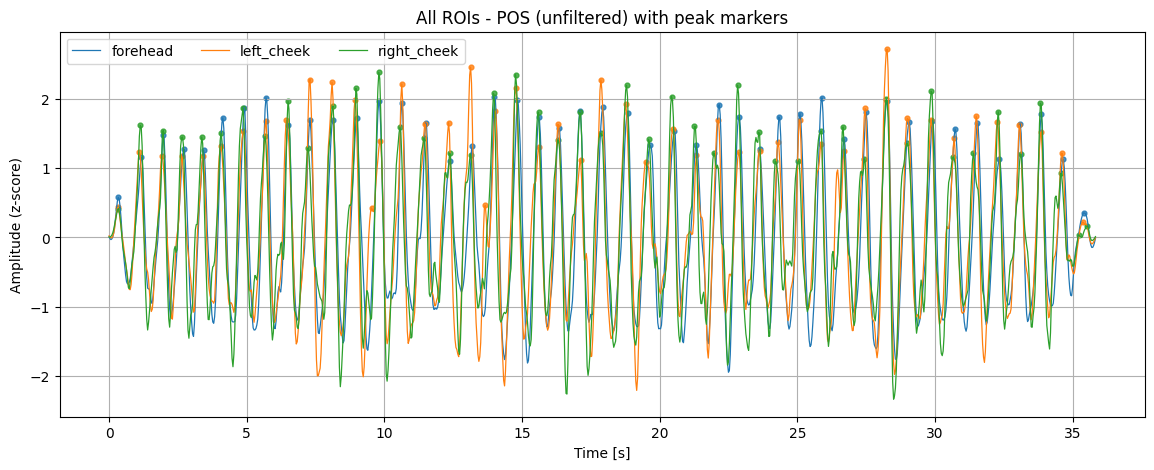

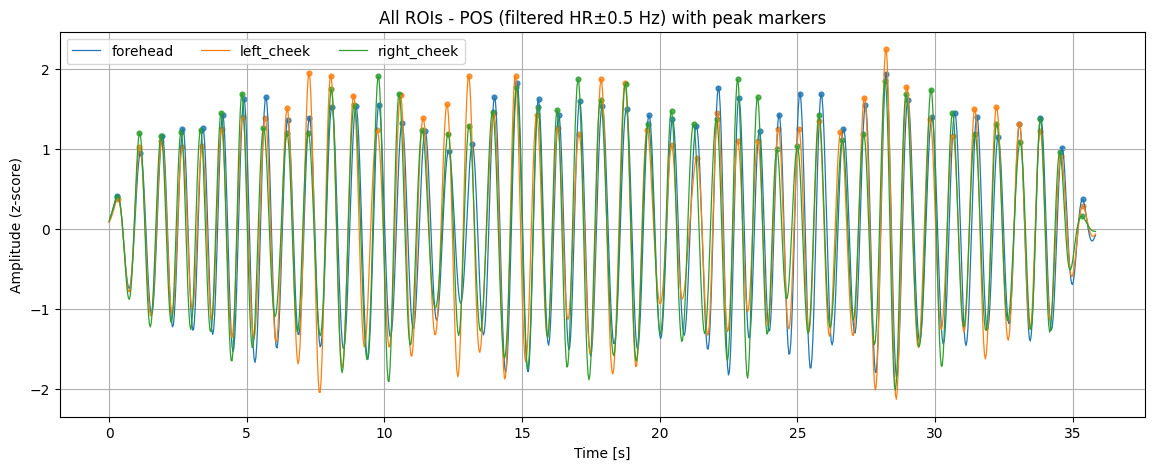

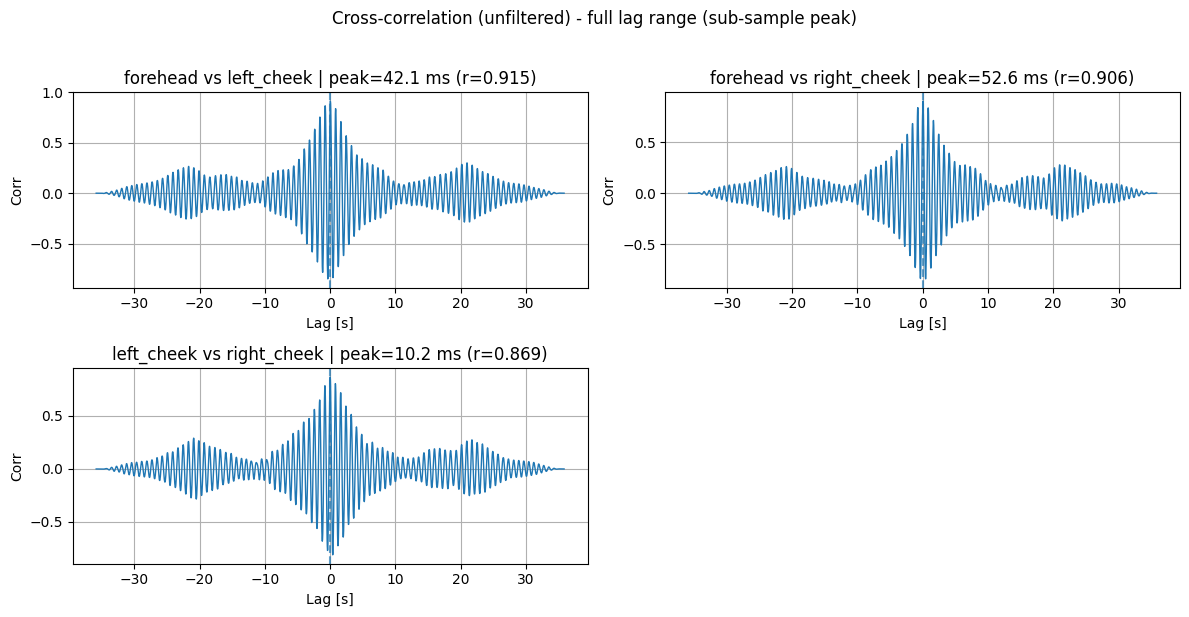

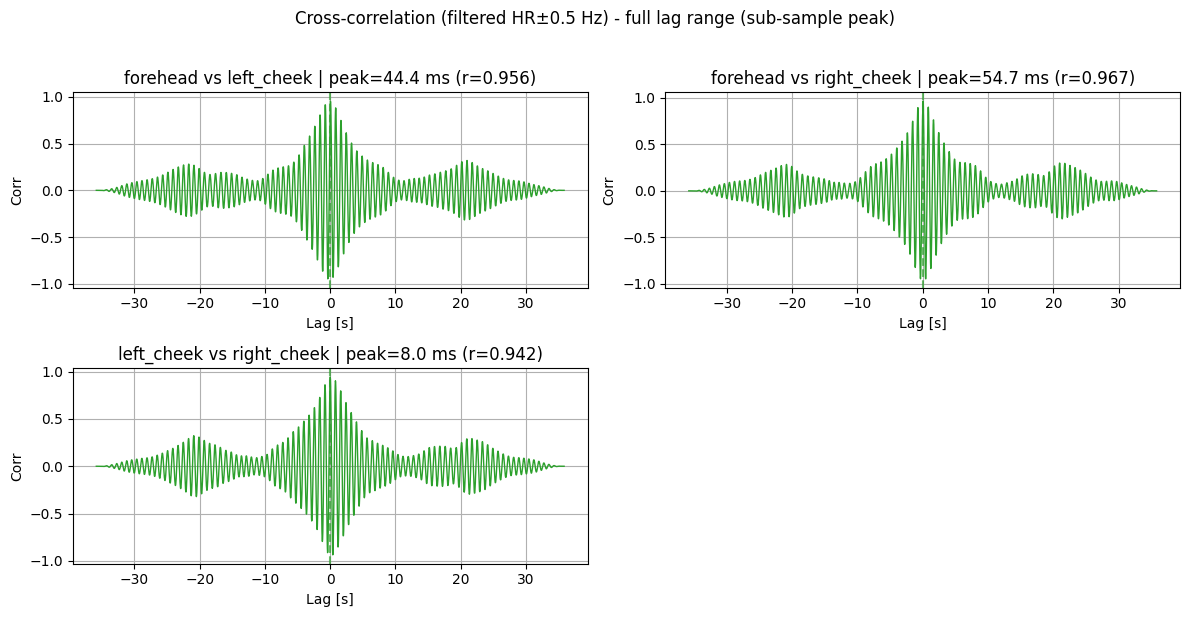

In [26]:
import numpy as np
from IppgSignalObtainer import IppgSignalObtainer
from Tools.ParametersCalculator import ParametersCalculator
from Tools.signalprocesser import SignalProcessor

def _bandpass_hr(series: np.ndarray, fs: float, hr_bpm: float, half_width_hz: float = 0.5):
    f0 = float(hr_bpm) / 60.0
    low = max(0.1, f0 - half_width_hz)
    high = min(fs/2 - 0.1, f0 + half_width_hz)
    if low >= high:
        return np.asarray(series)
    return SignalProcessor.bandpass(np.asarray(series), fs, order=3, lowcut=low, highcut=high)

def plot_rois_xcorr_from_video(video_path: str,
                               fs: float = 30,
                               window_length: int = 60,
                               start_time: int = 5,
                               forehead: bool = True,
                               cheeks: bool = True,
                               under_nose: bool = False,
                               full_face: bool = False,
                               show_filtered: bool = True,
                               normalize: bool = True):
    # 1) Extraer RGB por ROI
    rois_rgb = IppgSignalObtainer.extractSeriesRoiRGBFromVideo(
        video_path, fs,
        window_length=window_length, start_time=start_time,
        forehead=forehead, cheeks=cheeks, under_nose=under_nose, full_face=full_face, play_video=False
    )
    if not isinstance(rois_rgb, dict) or len(rois_rgb) == 0:
        raise ValueError("No se extrajeron ROIs del video.")

    # 2) Calcular POS por ROI
    pos_signals = {}
    for roi, ch in rois_rgb.items():
        r, g, b = ch.get('red', []), ch.get('green', []), ch.get('blue', [])
        if len(r) and len(g) and len(b):
            pos = IppgSignalObtainer.GetRppGSeriesfromRGBSeries(
                r, g, b, fs, normalize=False, derivative=False, bandpass=True, detrend=True, method='pos'
            )
            pos_signals[roi] = np.asarray(pos)

    if len(pos_signals) < 1:
        raise ValueError("No hay señales POS válidas por ROI.")

    # 3) HR por ROI y versión filtrada HR±0.5 Hz
    calc = ParametersCalculator()
    pos_signals_narrow = {}
    for roi, sig in pos_signals.items():
        hr_bpm = float(calc.ObtainHeartRate(np.asarray(sig), np.array([]), fs, method='two_peaks_periodogram'))
        pos_signals_narrow[roi] = _bandpass_hr(sig, fs, hr_bpm, half_width_hz=0.5)

    # 4) Plot (usa tu función existente)
    plot_all_rois_signals_and_xcorr(
        pos_signals=pos_signals,
        pos_signals_narrow=pos_signals_narrow,
        fs=fs,
        show_filtered=show_filtered,
        normalize=normalize
    )
    return pos_signals, pos_signals_narrow

pos_signals, pos_signals_narrow = plot_rois_xcorr_from_video(
    video_path='UBFC_DATASET_MERGED/DATASET_1/10-gt/vid.avi',
    fs=30, window_length=60, start_time=5,
    forehead=True, cheeks=True, under_nose=False, full_face=False,
    show_filtered=True, normalize=True
)

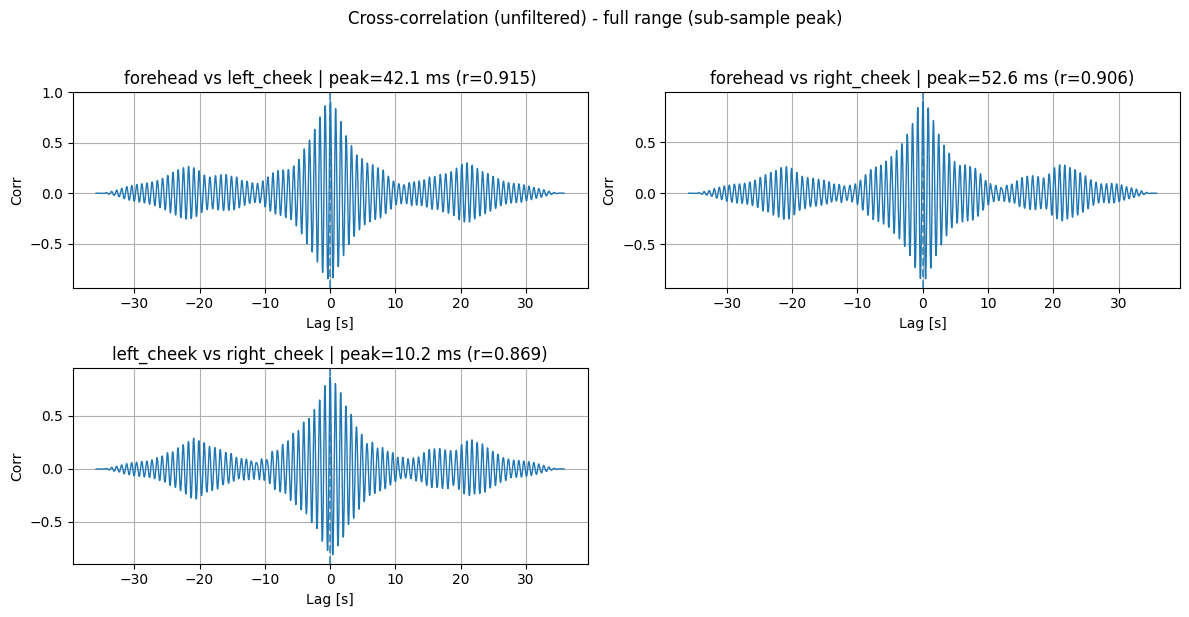

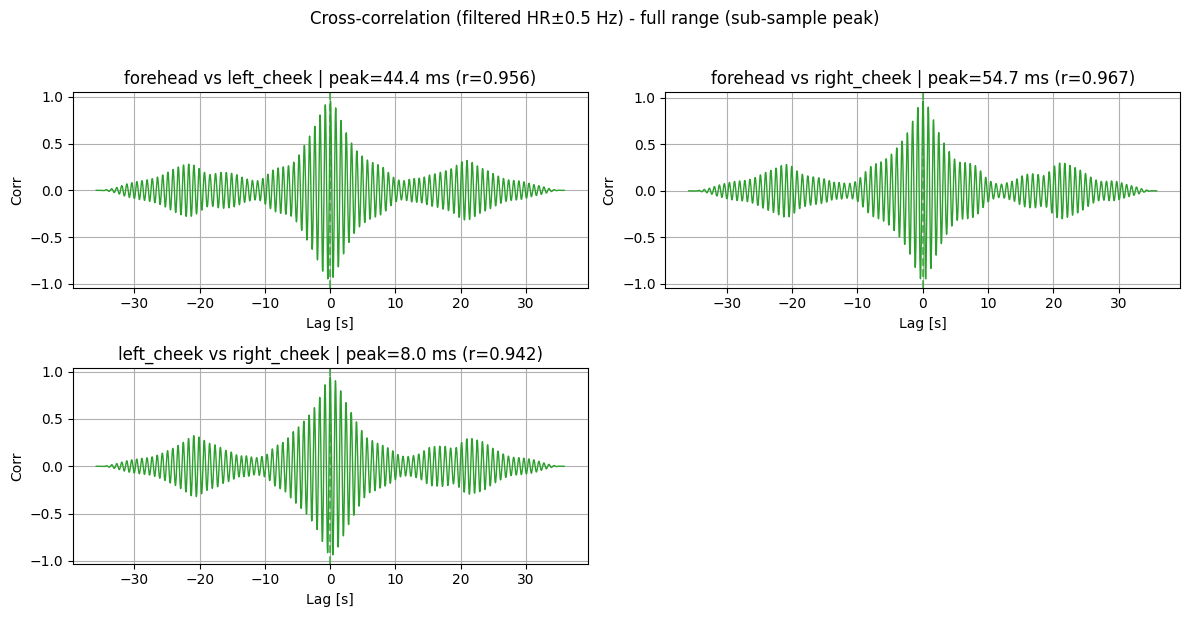

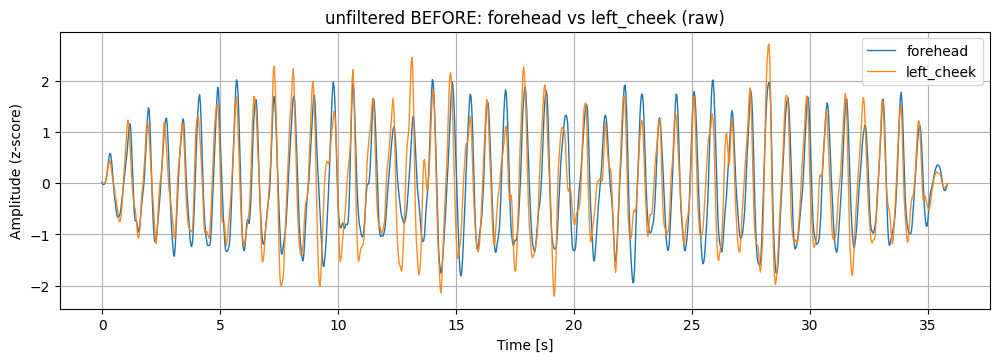

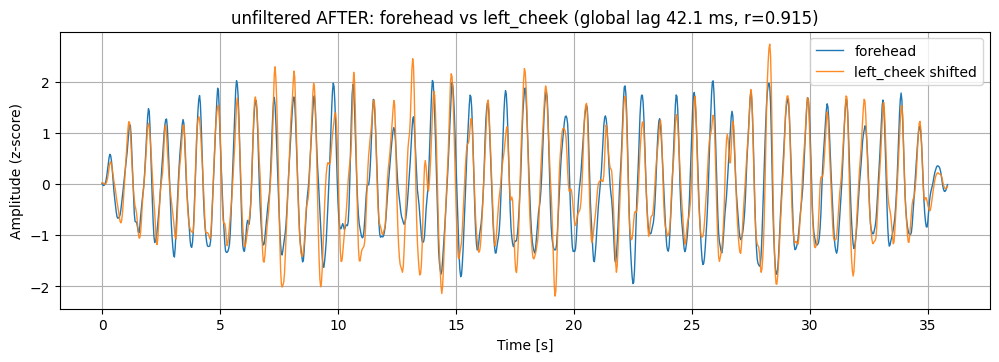

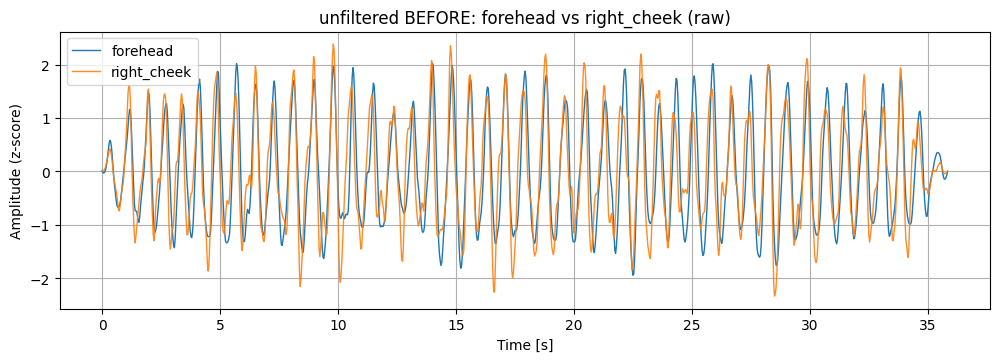

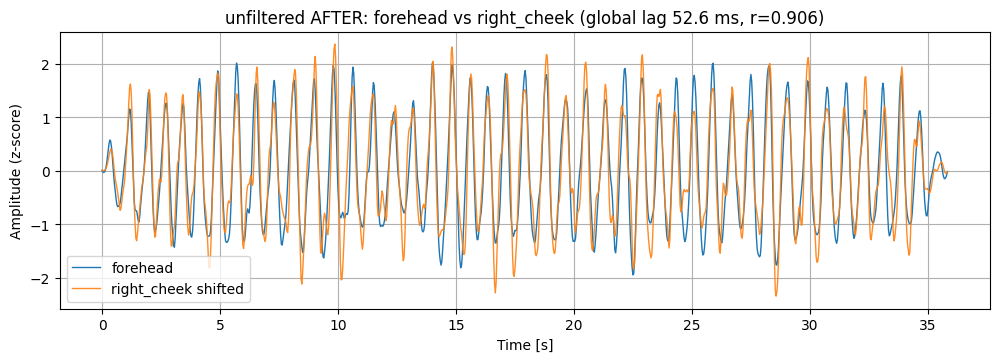

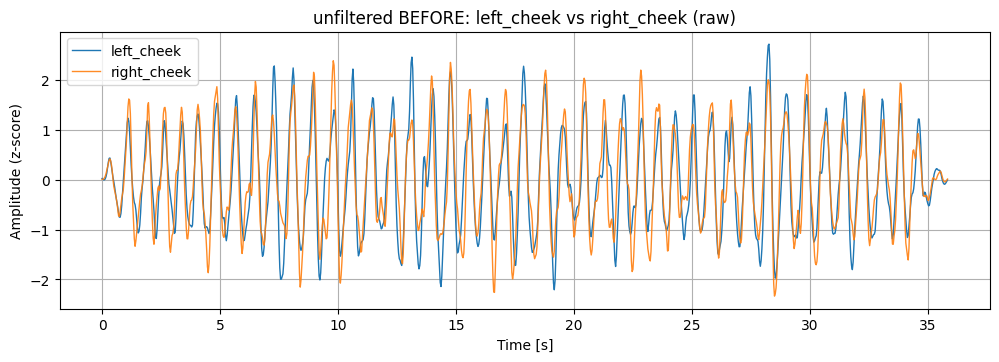

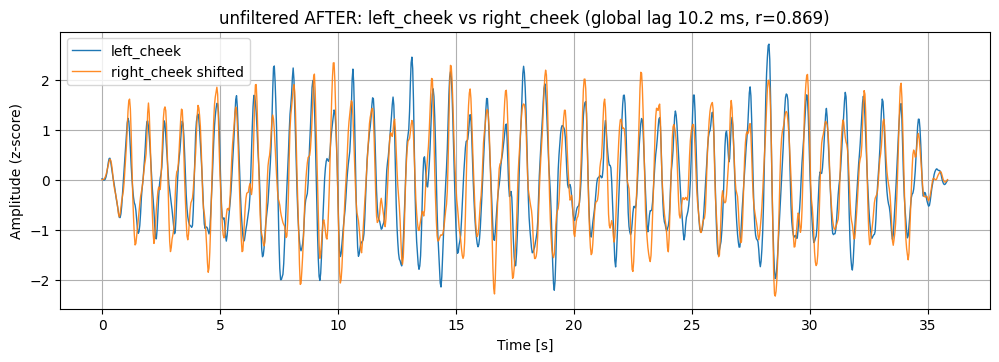

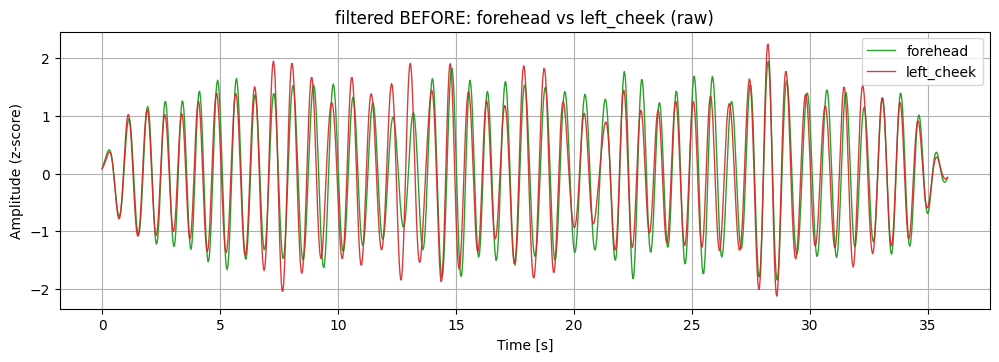

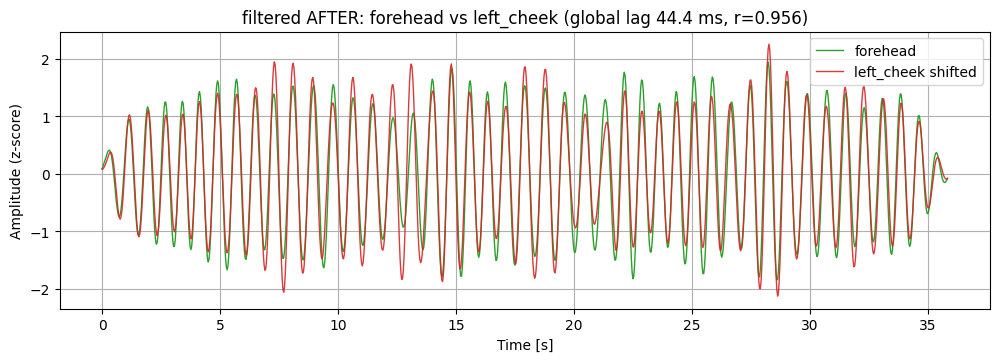

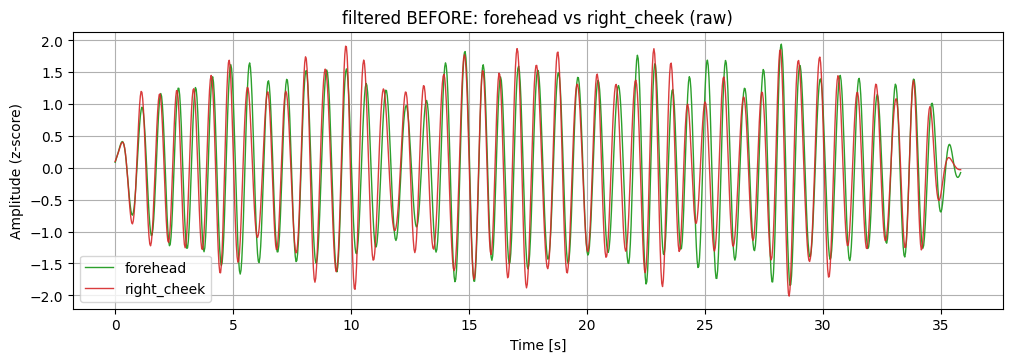

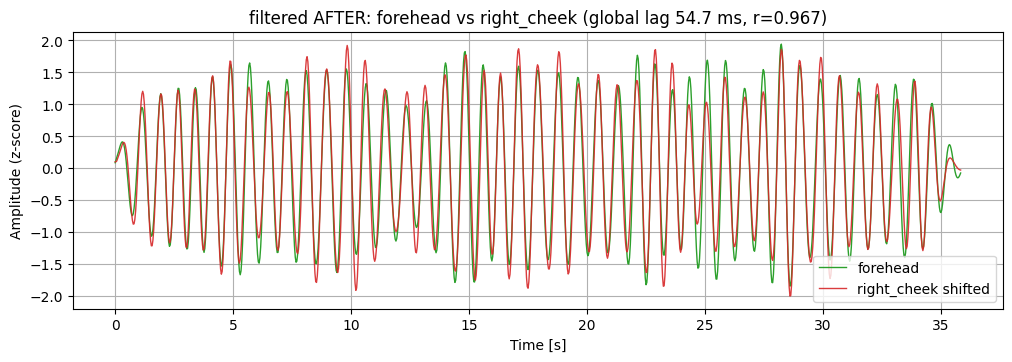

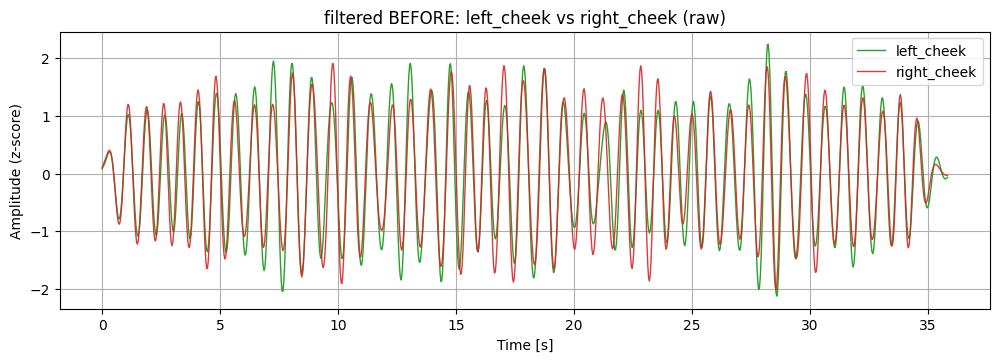

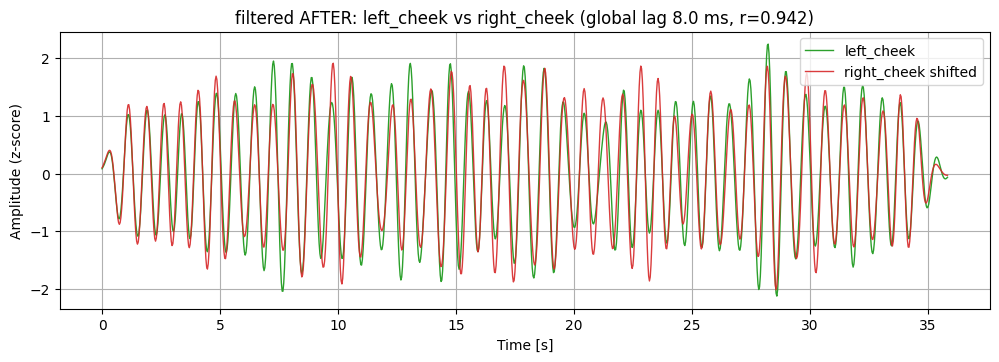

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from typing import Dict, Tuple
from IppgSignalObtainer import IppgSignalObtainer
from Tools.ParametersCalculator import ParametersCalculator
from Tools.signalprocesser import SignalProcessor

def plot_rois_xcorr_from_video_with_shift(
    video_path: str,
    fs: float = 30,
    window_length: int = 60,
    start_time: int = 5,
    forehead: bool = True,
    cheeks: bool = True,
    under_nose: bool = False,
    full_face: bool = False,
    show_filtered: bool = True,
    normalize: bool = True,
    phys_lag_ms: float = None,   # None = no cap
    r_min: float = None,         # None = no gating
    max_seconds: float = None    # crop overlays (None = full)
) -> Tuple[Dict[str, np.ndarray], Dict[str, np.ndarray], Dict[Tuple[str,str], dict]]:
    """
    Extract POS per ROI, build filtered POS (HR±0.5 Hz), plot full-range xcorr (sub-sample peak),
    and for each ROI pair plot: (1) before-shift overlay, (2) after-shift overlay using the
    unconstrained global lag estimate (unless phys_lag_ms/r_min are set).
    Returns (pos_signals, pos_signals_narrow, globals_dict).
    """
    PHYS_LAG_S = None if phys_lag_ms is None else phys_lag_ms / 1000.0

    def _z(x):
        if not normalize:
            return x
        x = np.asarray(x)
        return (x - np.mean(x)) / (np.std(x) + 1e-12)

    def _bandpass_hr(series: np.ndarray, fs: float, hr_bpm: float, half_width_hz: float = 0.5):
        f0 = float(hr_bpm) / 60.0
        low = max(0.1, f0 - half_width_hz)
        high = min(fs/2 - 0.1, f0 + half_width_hz)
        if low >= high:
            return np.asarray(series)
        return SignalProcessor.bandpass(np.asarray(series), fs, order=3, lowcut=low, highcut=high)

    def _parabolic_refine(y, i):
        if i <= 0 or i >= len(y)-1:
            return float(i), float(y[i])
        denom = (y[i-1] - 2.0*y[i] + y[i+1]) + 1e-12
        xv = 0.5 * (y[i-1] - y[i+1]) / denom
        pv = y[i] - 0.25 * (y[i-1] - y[i+1]) * xv
        return i + xv, pv

    def _global_xcorr_subsample(x, y, fs, max_lag_s=None):
        n = min(len(x), len(y))
        if n < 3:
            return np.nan, np.nan
        xn = (x[:n] - np.mean(x[:n])) / (np.std(x[:n]) + 1e-12)
        yn = (y[:n] - np.mean(y[:n])) / (np.std(y[:n]) + 1e-12)
        corr = np.correlate(xn, yn, mode='full') / n
        lags = np.arange(-n + 1, n)
        if max_lag_s is not None:
            k = int(max_lag_s * fs)
            keep = (lags >= -k) & (lags <= k)
            corr = corr[keep]; lags = lags[keep]
        i = int(np.argmax(corr))
        i_ref, peak_val = _parabolic_refine(corr, i)
        lag_samples = lags[0] + i_ref
        return 1000.0 * lag_samples / fs, float(peak_val)

    def _shift_by_ms(x, fs, shift_ms):
        t = np.arange(len(x)) / fs
        t_new = t - (shift_ms / 1000.0)
        return np.interp(t, t_new, x, left=x[0], right=x[-1])

    # 1) Extract ROI RGB and compute POS per ROI
    rois_rgb = IppgSignalObtainer.extractSeriesRoiRGBFromVideo(
        video_path, fs,
        window_length=window_length, start_time=start_time,
        forehead=forehead, cheeks=cheeks, under_nose=under_nose, full_face=full_face, play_video=False
    )
    if not rois_rgb:
        raise ValueError("No ROIs extracted.")

    pos_signals = {}
    for roi, ch in rois_rgb.items():
        r, g, b = ch.get('red', []), ch.get('green', []), ch.get('blue', [])
        if len(r) and len(g) and len(b):
            pos = IppgSignalObtainer.GetRppGSeriesfromRGBSeries(
                r, g, b, fs, normalize=False, derivative=False, bandpass=True, detrend=True, method='pos'
            )
            pos_signals[roi] = np.asarray(pos)

    if len(pos_signals) < 2:
        raise ValueError("Need at least 2 ROI POS signals.")

    # 2) Build filtered POS per ROI (HR±0.5 Hz)
    calc = ParametersCalculator()
    pos_signals_narrow = {}
    for roi, sig in pos_signals.items():
        hr_bpm = float(calc.ObtainHeartRate(np.asarray(sig), np.array([]), fs, method='two_peaks_periodogram'))
        pos_signals_narrow[roi] = _bandpass_hr(sig, fs, hr_bpm, half_width_hz=0.5)

    rois = list(pos_signals.keys())
    pairs = list(combinations(rois, 2))
    globals_dict = {}

    # 3) Full-range xcorr plots (unfiltered + filtered), optional cap/gate if provided
    def _xcorr_full_plot(pairs, Amap, title, color):
        if not pairs:
            return
        ncols = 2 if len(pairs) > 1 else 1
        nrows = int(np.ceil(len(pairs) / ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3 * nrows), squeeze=False)
        fig.suptitle(title, y=1.02)
        for idx, (a, b) in enumerate(pairs):
            r = idx // ncols; c = idx % ncols
            ax = axes[r][c]
            xa = np.asarray(Amap.get(a, [])); xb = np.asarray(Amap.get(b, []))
            n = min(len(xa), len(xb))
            if n == 0:
                ax.set_visible(False); continue
            xn = (xa[:n] - np.mean(xa[:n])) / (np.std(xa[:n]) + 1e-12)
            yn = (xb[:n] - np.mean(xb[:n])) / (np.std(xb[:n]) + 1e-12)
            corr = np.correlate(xn, yn, mode='full') / n
            lags = np.arange(-n + 1, n) / fs
            if PHYS_LAG_S is not None:
                keep = (lags >= -PHYS_LAG_S) & (lags <= PHYS_LAG_S)
                corr = corr[keep]; lags = lags[keep]
            i = int(np.argmax(corr))
            i_ref, peak_val = _parabolic_refine(corr, i)
            lag_step = (lags[1] - lags[0]) if len(lags) > 1 else (1.0 / fs)
            peak_lag = lags[0] + i_ref * lag_step
            if (r_min is not None) and (peak_val < r_min):
                title_extra = f' | peak=NaN (r={peak_val:.3f})'
            else:
                title_extra = f' | peak={peak_lag*1000:.1f} ms (r={peak_val:.3f})'
                ax.axvline(peak_lag, color=color, linestyle='--', alpha=0.7)
            ax.plot(lags, corr, color=color, linewidth=1.0)
            ax.set_title(f'{a} vs {b}{title_extra}')
            ax.set_xlabel('Lag [s]'); ax.set_ylabel('Corr'); ax.grid(True)
        for j in range(len(pairs), nrows * ncols):
            r = j // ncols; c = j % ncols
            axes[r][c].set_visible(False)
        plt.tight_layout()

    _xcorr_full_plot(pairs, pos_signals, 'Cross-correlation (unfiltered) - full range (sub-sample peak)', 'tab:blue')
    if show_filtered:
        _xcorr_full_plot(pairs, pos_signals_narrow, 'Cross-correlation (filtered HR±0.5 Hz) - full range (sub-sample peak)', 'tab:green')

    # 4) For each pair: compute global lag (cap/gate only if provided) and plot before/after overlays
    def _pairwise_shift_plots(Amap, mode_name, line_color_a='tab:blue', line_color_b='tab:orange'):
        for a, b in pairs:
            A = np.asarray(Amap.get(a, [])); B = np.asarray(Amap.get(b, []))
            if len(A) == 0 or len(B) == 0:
                continue
            g_lag_ms, g_r = _global_xcorr_subsample(A, B, fs, max_lag_s=PHYS_LAG_S)
            globals_dict.setdefault((a, b), {})[mode_name] = {'lag_ms': float(g_lag_ms), 'r': float(g_r)}

            # BEFORE shift
            n0 = min(len(A), len(B))
            t0 = np.arange(n0) / fs
            mask0 = (t0 <= max_seconds) if max_seconds is not None else slice(None)
            plt.figure(figsize=(12, 3.6))
            plt.plot(t0[mask0], _z(A[:n0])[mask0], label=f'{a}', color=line_color_a, linewidth=1.0)
            plt.plot(t0[mask0], _z(B[:n0])[mask0], label=f'{b}', color=line_color_b, linewidth=1.0, alpha=0.9)
            plt.title(f'{mode_name} BEFORE: {a} vs {b} (raw)')
            plt.xlabel('Time [s]'); plt.ylabel('Amplitude (z-score)')
            plt.grid(True); plt.legend()

            # AFTER shift (apply only if passes optional gate/cap; else plot copy)
            bad = (r_min is not None and g_r < r_min) or (phys_lag_ms is not None and abs(g_lag_ms) > phys_lag_ms)
            B_shift = B.copy() if bad or not np.isfinite(g_lag_ms) else _shift_by_ms(B, fs, -g_lag_ms)
            note = ' (unreliable lag)' if (bad or not np.isfinite(g_lag_ms)) else f' (global lag {g_lag_ms:.1f} ms, r={g_r:.3f})'

            n = min(len(A), len(B_shift))
            t = np.arange(n) / fs
            mask = (t <= max_seconds) if max_seconds is not None else slice(None)
            plt.figure(figsize=(12, 3.6))
            plt.plot(t[mask], _z(A[:n])[mask], label=f'{a}', color=line_color_a, linewidth=1.0)
            plt.plot(t[mask], _z(B_shift[:n])[mask], label=f'{b} shifted', color=line_color_b, linewidth=1.0, alpha=0.9)
            plt.title(f'{mode_name} AFTER: {a} vs {b}{note}')
            plt.xlabel('Time [s]'); plt.ylabel('Amplitude (z-score)')
            plt.grid(True); plt.legend()

    _pairwise_shift_plots(pos_signals, 'unfiltered', 'tab:blue', 'tab:orange')
    if show_filtered:
        _pairwise_shift_plots(pos_signals_narrow, 'filtered', 'tab:green', 'tab:red')

    plt.show()
    return pos_signals, pos_signals_narrow, globals_dict

pos_unf, pos_filt, globals_dict = plot_rois_xcorr_from_video_with_shift(
    video_path='UBFC_DATASET_MERGED/DATASET_1/10-gt/vid.avi',
    fs=30, window_length=60, start_time=5,
    forehead=True, cheeks=True, under_nose=False, full_face=False,
    show_filtered=True, normalize=True,
    phys_lag_ms=None, r_min=None, max_seconds=None
)

## Conclusiones, limitaciones y siguientes pasos 

El parámetro que determina la llegada del pulso es la velocidad de propagación de la onda de presión (Pulse Wave Velocity, PWV), la cual es del orden de 4 a 10 m/s en individuos sanos. Si consideramos distancias faciales típicas entre regiones arteriales superficiales  (del orden de 3 a 6 cm) el tiempo fisiológico de PTT entre dos ROIs sería faciales seria aproximadamente:


$\text{PTT} = \frac{\text{distancia}}{\text{PWV}} \approx \frac{0.03\ \text{a}\ 0.06\ \text{m}}{5\ \text{m/s}} = 6\ \text{a}\ 12\ \text{ms}.$

El problema es que la resolucion que tenemos es de 30 FPS en todos los videos de nuestra base de datos (y es tambien el frame rate mas usual de las camaras comercilaes y smartphones) por lo cual la resolución temporal mínima disponible es de aproximadamente 33.3 ms, un intervalo significativamente mayor que el retraso fisiológico que se desea medir.
Sumado a esto, la señal sufre de un cierto error o corrimiento (jitter) inevitable y dependiente de los metodos de procesamiento y dispositivos de captura. Por ejemplo, las camaras en realidad no tienen una frecuencia de muestreo fija (aunque podria buscarse el timestamp exacto de cada frame para mitigar esto).

Esto implica que, con 30 fps y tomando en cuenta el jitter, es dificil detectar y caracterizar de manera fiable los PTT entre ROIs faciales. Es mas, factores dependientes de HRV tambien podrian sufrir fuertemente debido a esto dado que es sensible a errores de decenas de milisegundos (pensemos que menos de 50ms de corrimiento entre latidos ya ensucian muchas de las metricas de HRV, como por ej PNN50.). Tendriamos que analizar el efecto de esto analizando una señal de ECG y de rPPG para ver que los verdaderos valores de HRV contra los obtenidos en la señal de rppg y ademas que tipo de parametros de HRV son mas robustos a este tipo de señales (talvez algunos que tengan menos resolucion o tomen en cuenta variabilidades mas grandes, por ejemplo usar PNN100 en vez de PNN50).

Ademas, hay otras fuentes de cambios en la posicion de los picos entre señales, como ruido que mueve el pico levemente por ejemplo por factores opticos nada mas (movimiento, luz cambiante, etc etc).

Sin embargo, aunque debido a diversos posibles factores, se nota un corrimiento de las señales, lo cual indica que probablemente usar ROIs alejadas entre si pero combinadas O la cara entera podria agregar errores en la posicion de los picos y cambios en la morfologia, lo cual seria aun mas problematico para calculo de variables como HRV, y PTT, entre otros, donde las variaciones leves ya introducen un error grande.
Puede verse ademas que el corrimiento es mucho menor entre la mejilla izquierda y derecha, mientras que es mayor consistentemente comparando mejillas con frente. Esto podria tener que ver con que las mejillas pueden reflejar, ante una luz que no venga de los costados, los mismo patrones de reflejo de la luz por la simetria, usual simetria tambien en movimientos (muchos movimientos son en conjunto) a diferencia de con la frente, donde ademas el PTT tendria que ser mayor (la diostancia al corazon de las mejillas son iguales, practicamente, mientras que la frente esta mas alejada.)

Otro factor que se pudo notar es que el error varia en diferentes regiones de la señal, mostrando que existen desfaces dentro de ventanas de las señales, lo cual podria hablar de un problema aun mayor en indices de variabilidad de ritmo por ejemplo, igualmente los lags absolutos tienen una mediana de maximo de 13. Algo curioso, es que este error es mayor comparando mejilla a mejilla que mejilla y frente. Puede verse sin embargo que la mediana de los lags es cercana a cero para todas las comparaciones, mostrando ese comportamiento ciclico que se habia observado en el plot de 5-gt.

Se requieren mas validaciones sobre los cambios de la morfologia de la señal entre los ROIs. Ademas, se propone analizar als distintas metricas de HRV para las distintas ROIs y cuales son mas robustas al cambio de ROI, ademas dde analizar un umbral de calidad necesario para poder realizar estas mediciones de manera confiable. Lo mismo va respecto a parametros de la camara como FPS, entre otros.


# consideraciones seleccion region de interes ippg ---> cuando no es HR sino otra cosa

## Experimento rolling shutter

# PRUEBA 60 FPS CAMARA PAULA

Videos_camara_paula\2025-12-02 02-26-34.mp4
Video: Videos_camara_paula\2025-12-02 02-26-34.mp4
FPS: 60.0
Frame count: 3479.0
Duration (s): 57.98


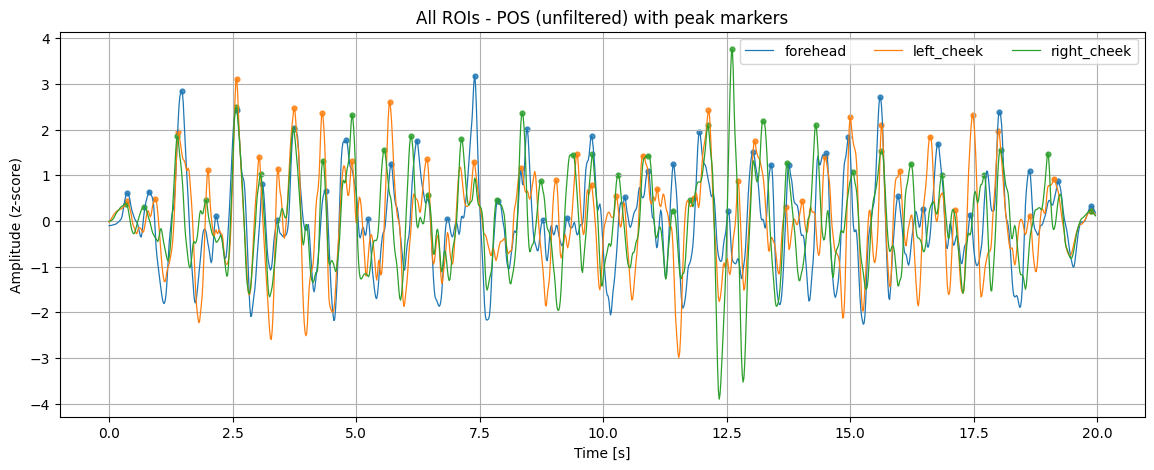

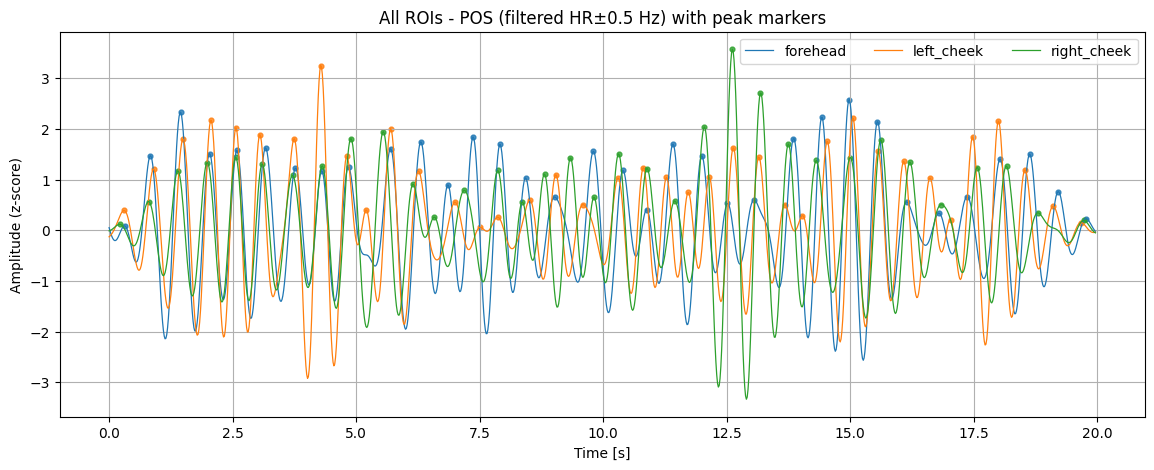

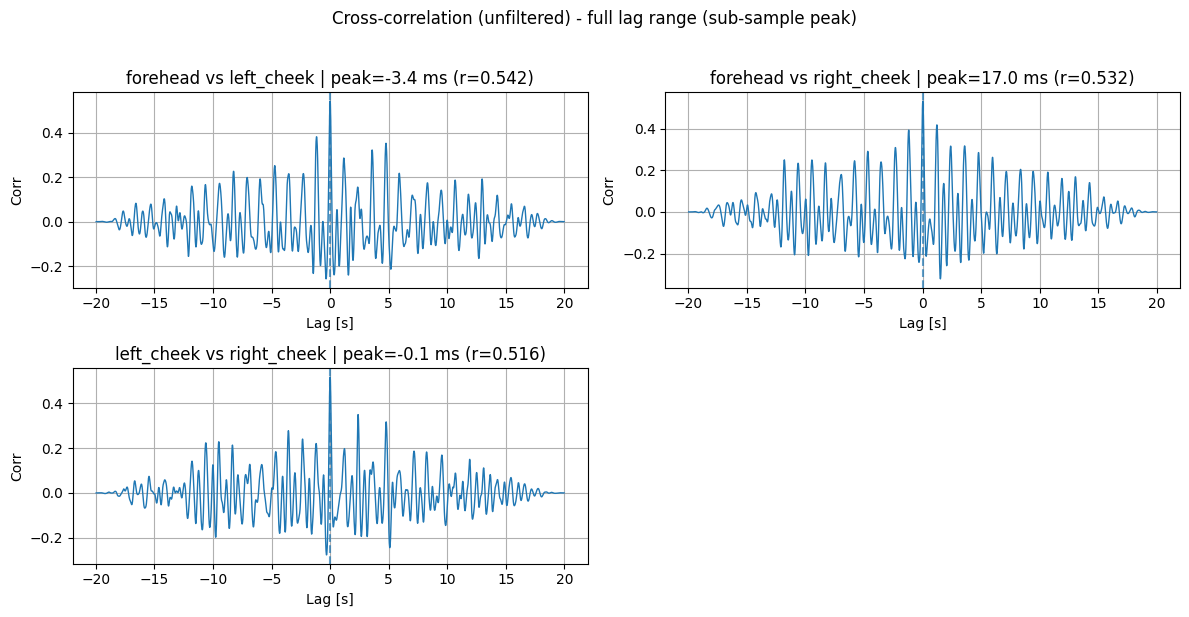

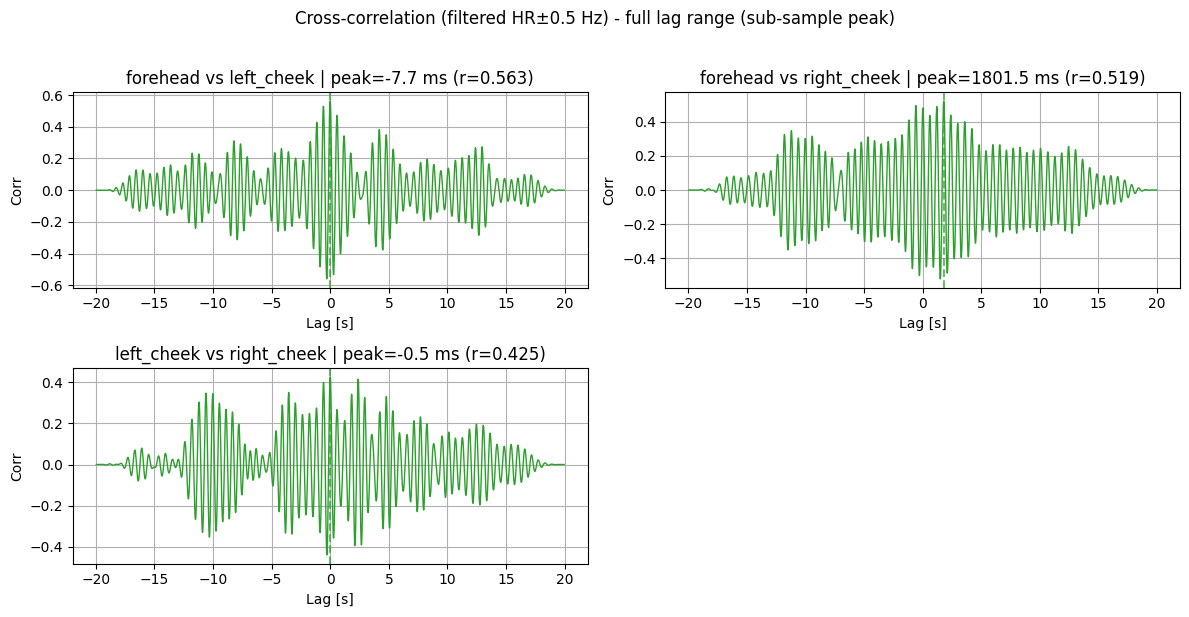

Videos_camara_paula\2025-12-02 21-30-27.mp4
Video: Videos_camara_paula\2025-12-02 21-30-27.mp4
FPS: 60.0
Frame count: 3800.0
Duration (s): 63.33


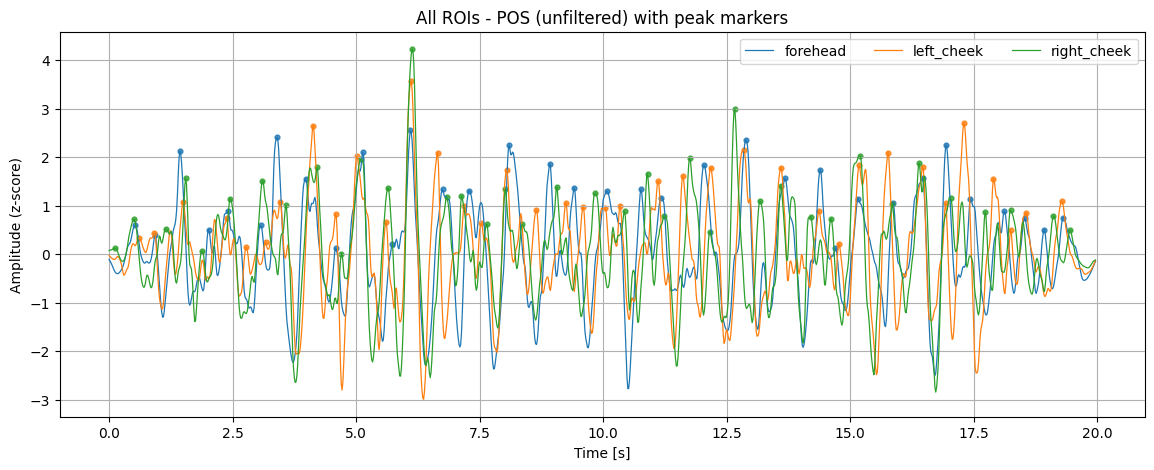

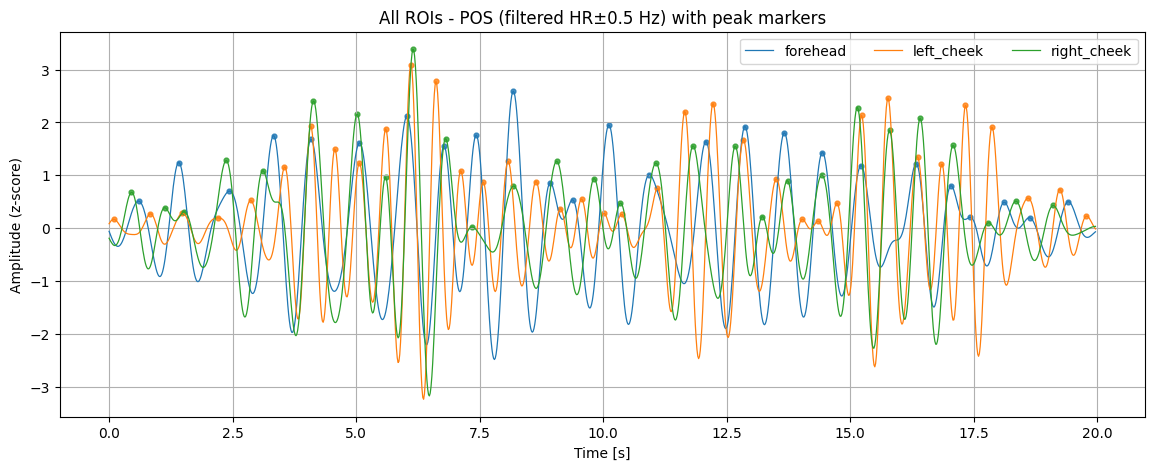

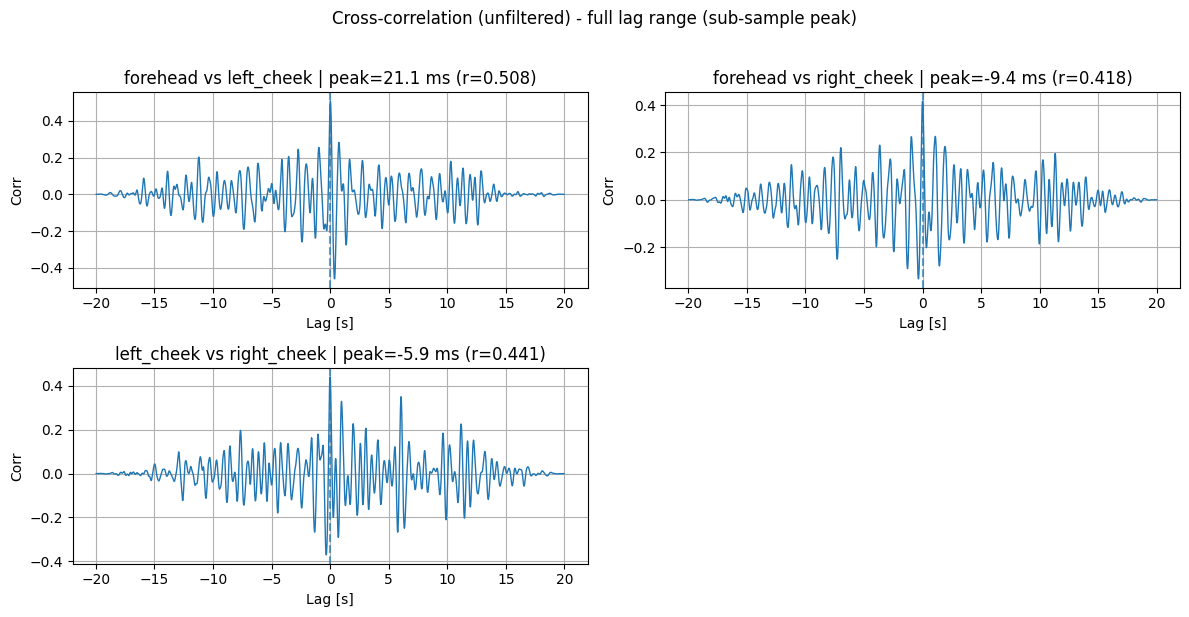

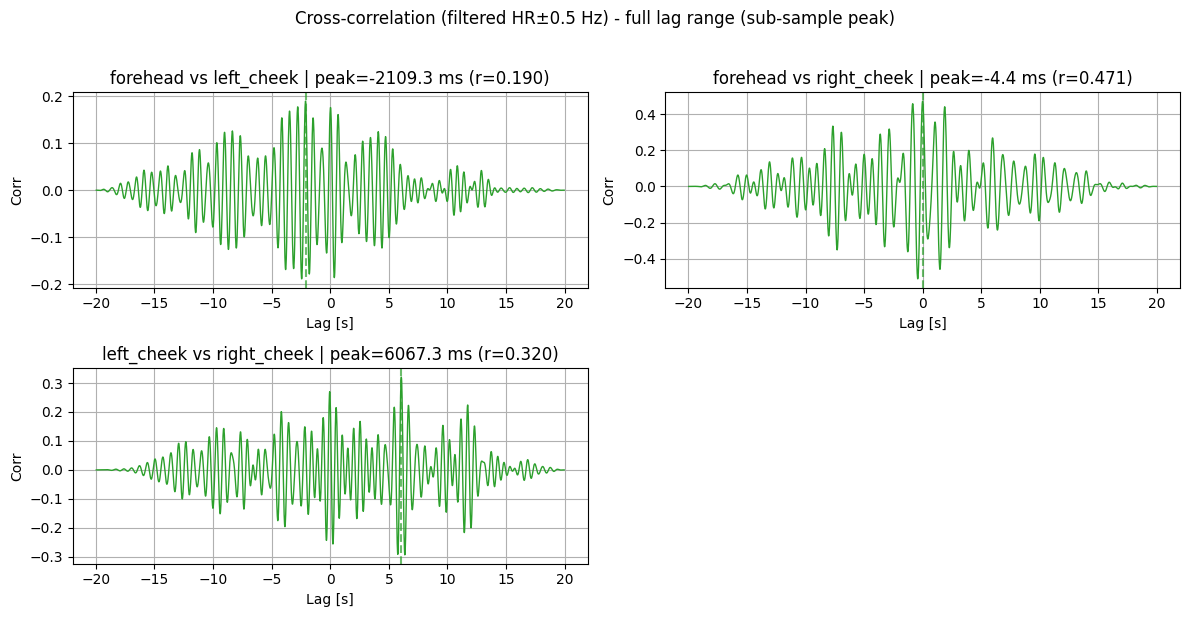

Videos_camara_paula\WIN_20251202_21_26_42_Pro.mp4
Video: Videos_camara_paula\WIN_20251202_21_26_42_Pro.mp4
FPS: 29.991757889208216
Frame count: 2267.0
Duration (s): 75.59


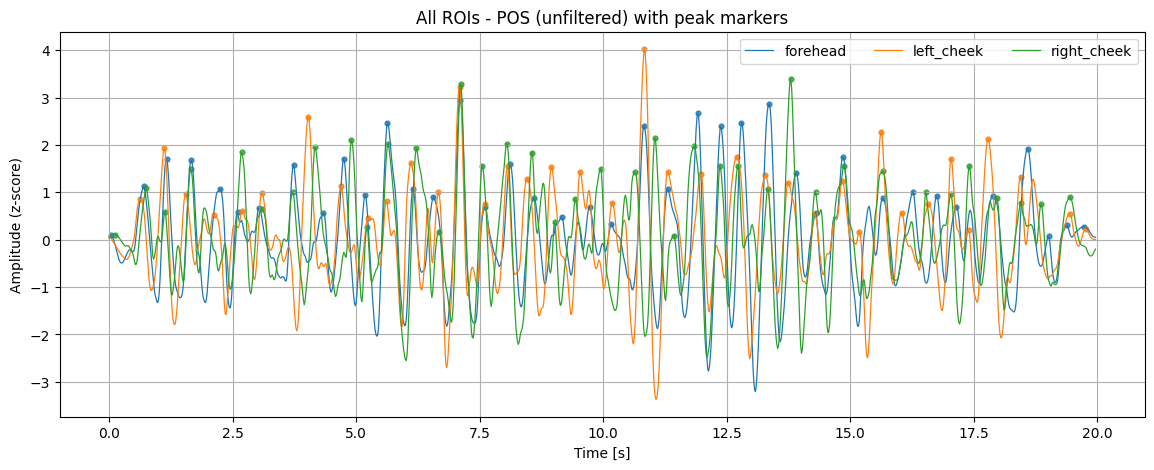

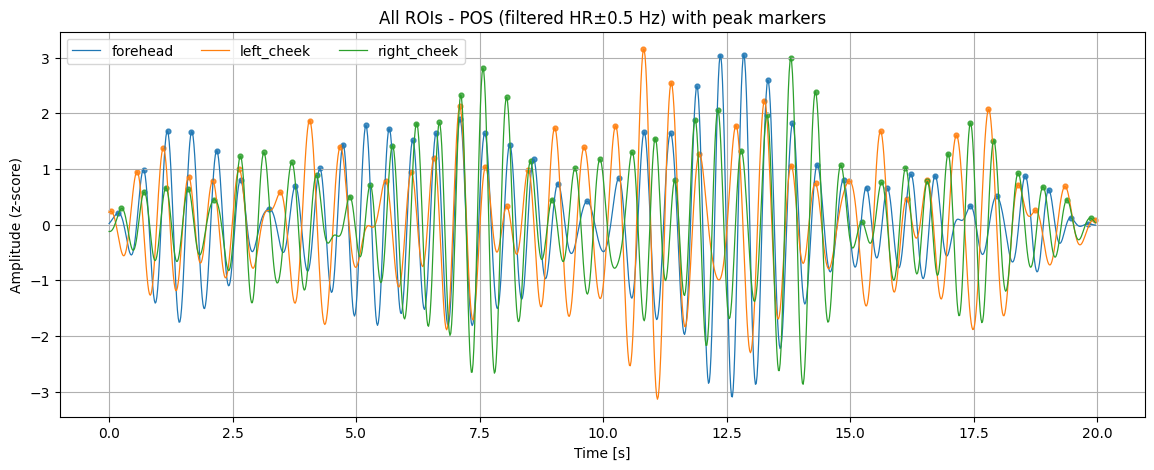

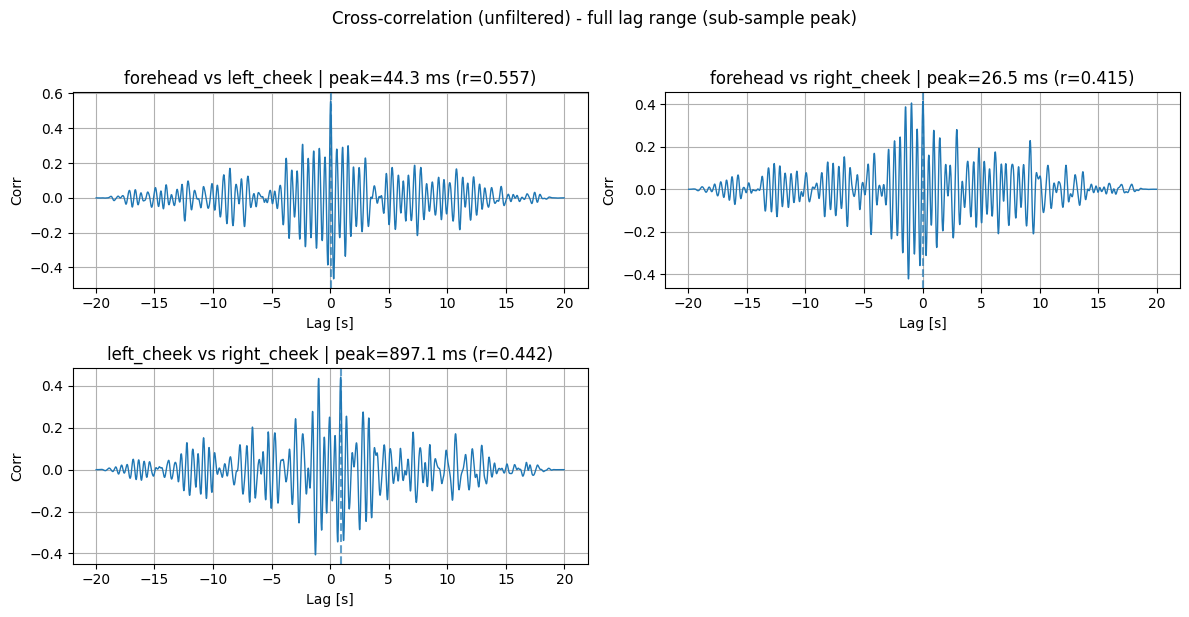

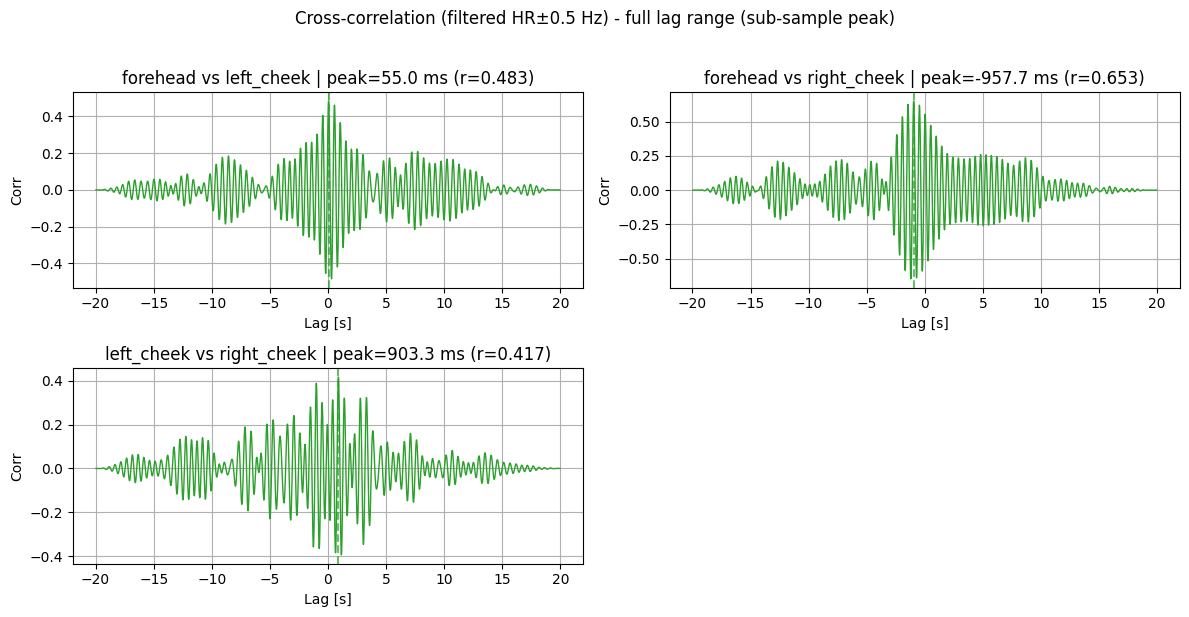

In [32]:
import cv2
import glob
files = sorted(glob.glob("Videos_camara_paula/*.mp4"))
for file in files:
    print("="*100)
    print(file)
    video_path = file
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    duration = frame_count / fps if fps > 0 else None
    print(f"Video: {video_path}")
    print(f"FPS: {fps}")
    print(f"Frame count: {frame_count}")
    if duration is not None:
        print(f"Duration (s): {duration:.2f}")
    cap.release()
    pos_signals, pos_signals_narrow = plot_rois_xcorr_from_video(
        video_path=file,
        fs=60, window_length=20, start_time=5,
        forehead=True, cheeks=True, under_nose=False, full_face=False,
        show_filtered=True, normalize=True
    )